# Project Notes 1

In [1]:
!pip install shap

     |████████████████████████████████| 358kB 19.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491638 sha256=5667e4881c31936c0f8ad3cb9781e69aceffe1f4c09e35524b7508295824fa8f
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


## Importing the Libraries

In [552]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
pd.set_option('display.max_rows',None)
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

## Loading the dataset

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
tl = pd.read_csv('/content/drive/MyDrive/Telecom_Sampled.csv')

In [5]:
tl.head()

mou_Mean  totmrc_Mean  rev_Range  ...  Customer_ID  comp_dat_Mean  plcd_dat_Mean
0    190.25      63.9400      26.00  ...      1064525       0.000000       0.000000
1    443.00      39.9900       5.10  ...      1048538       0.333333       0.333333
2    400.50      44.9900      13.88  ...      1010139       0.000000       0.333333
3     53.50      34.6675      18.56  ...      1014496       0.000000       0.000000
4     37.00      21.0425      35.79  ...      1012053       0.000000       0.000000

[5 rows x 81 columns]

In [6]:
tl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26518 entries, 0 to 26517
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mou_Mean          26460 non-null  float64
 1   totmrc_Mean       26460 non-null  float64
 2   rev_Range         26460 non-null  float64
 3   mou_Range         26460 non-null  float64
 4   change_mou        26357 non-null  float64
 5   drop_blk_Mean     26518 non-null  float64
 6   drop_vce_Range    26518 non-null  int64  
 7   owylis_vce_Range  26518 non-null  int64  
 8   mou_opkv_Range    26518 non-null  float64
 9   months            26518 non-null  int64  
 10  totcalls          26518 non-null  int64  
 11  income            19821 non-null  float64
 12  eqpdays           26518 non-null  int64  
 13  custcare_Mean     26518 non-null  float64
 14  callwait_Mean     26518 non-null  float64
 15  iwylis_vce_Mean   26518 non-null  float64
 16  callwait_Range    26518 non-null  int64 

In [7]:
print("The shape of the dataset:",tl.shape)

The shape of the dataset: (26518, 81)


## Data Proportion - Imbalance Data

In [8]:
tl.churn.value_counts()

0    20154
1     6364
Name: churn, dtype: int64

In [9]:
tl.churn.value_counts(normalize=True)

0    0.760012
1    0.239988
Name: churn, dtype: float64

## Duplicate Records

In [10]:
#Duplicate records
dups = tl.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
tl[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [mou_Mean, totmrc_Mean, rev_Range, mou_Range, change_mou, drop_blk_Mean, drop_vce_Range, owylis_vce_Range, mou_opkv_Range, months, totcalls, income, eqpdays, custcare_Mean, callwait_Mean, iwylis_vce_Mean, callwait_Range, ccrndmou_Range, adjqty, ovrrev_Mean, rev_Mean, ovrmou_Mean, comp_vce_Mean, plcd_vce_Mean, avg3mou, avgmou, avg3qty, avgqty, avg6mou, avg6qty, crclscod, asl_flag, prizm_social_one, area, refurb_new, hnd_webcap, marital, ethnic, age1, age2, models, hnd_price, actvsubs, uniqsubs, forgntvl, dwlltype, dwllsize, mailordr, occu1, opk_dat_Mean, mtrcycle, numbcars, retdays, truck, wrkwoman, roam_Mean, recv_sms_Mean, blck_dat_Mean, mou_pead_Mean, churn, solflag, proptype, mailresp, cartype, car_buy, children, csa, da_Mean, da_Range, datovr_Mean, datovr_Range, div_type, drop_dat_Mean, drop_vce_Mean, adjmou, totrev, adjrev, avgrev, Customer_ID, comp_dat_Mean, plcd_dat_Mean]
Index: []

[0 rows x 81 columns]

## Null values

In [11]:
print("The total null values present in the dataset:",tl.isnull().sum().sum())

The total null values present in the dataset: 252909


In [12]:
tl.isnull().sum()

mou_Mean               58
totmrc_Mean            58
rev_Range              58
mou_Range              58
change_mou            161
drop_blk_Mean           0
drop_vce_Range          0
owylis_vce_Range        0
mou_opkv_Range          0
months                  0
totcalls                0
income               6697
eqpdays                 0
custcare_Mean           0
callwait_Mean           0
iwylis_vce_Mean         0
callwait_Range          0
ccrndmou_Range          0
adjqty                  0
ovrrev_Mean            58
rev_Mean               58
ovrmou_Mean            58
comp_vce_Mean           0
plcd_vce_Mean           0
avg3mou                 0
avgmou                  0
avg3qty                 0
avgqty                  0
avg6mou               814
avg6qty               814
crclscod                0
asl_flag                0
prizm_social_one     1881
area                    5
refurb_new              0
hnd_webcap           2382
marital               468
ethnic                468
age1        

## Proportion of Null values

In [13]:
tl.isnull().mean().sort_values(ascending=False)

solflag             0.980579
retdays             0.967343
wrkwoman            0.876612
div_type            0.810808
occu1               0.734897
proptype            0.716004
cartype             0.677087
children            0.662267
mailordr            0.641451
mailresp            0.626820
numbcars            0.488687
dwllsize            0.380496
dwlltype            0.316049
income              0.252545
hnd_webcap          0.089826
prizm_social_one    0.070933
avg6mou             0.030696
avg6qty             0.030696
forgntvl            0.017648
truck               0.017648
mtrcycle            0.017648
car_buy             0.017648
age2                0.017648
age1                0.017648
ethnic              0.017648
marital             0.017648
hnd_price           0.009578
change_mou          0.006071
rev_Mean            0.002187
ovrmou_Mean         0.002187
ovrrev_Mean         0.002187
mou_Mean            0.002187
datovr_Mean         0.002187
roam_Mean           0.002187
totmrc_Mean   

#### Dropping Customer ID

In [14]:
tl.drop(['Customer_ID'],axis=1,inplace=True)

#### Dropping columns having more than 50% null values

In [15]:
tl.drop(['solflag','retdays','wrkwoman','div_type','occu1','proptype','cartype','children','mailordr','mailresp','numbcars'],axis=1,inplace=True)

In [16]:
tl_cnt=tl[['mou_Mean','totmrc_Mean','rev_Range','mou_Range','change_mou','drop_blk_Mean','drop_vce_Range','owylis_vce_Range','mou_opkv_Range','months','totcalls','eqpdays','custcare_Mean','callwait_Mean','iwylis_vce_Mean','callwait_Range','ccrndmou_Range','adjqty','ovrrev_Mean','rev_Mean','ovrmou_Mean','comp_vce_Mean','plcd_vce_Mean','avg3mou','avgmou','avg3qty','avgqty','avg6mou','avg6qty','opk_dat_Mean','roam_Mean','recv_sms_Mean','blck_dat_Mean','mou_pead_Mean','da_Mean','da_Range','datovr_Mean','datovr_Range','drop_dat_Mean','drop_vce_Mean','adjmou','totrev','adjrev','avgrev','comp_dat_Mean','plcd_dat_Mean','churn']]

In [17]:
tl_cnt.describe().T

count         mean  ...          75%            max
mou_Mean          26460.0   533.578283  ...   733.250000    7667.750000
totmrc_Mean       26460.0    47.189057  ...    59.990000     399.990000
rev_Range         26460.0    44.132108  ...    57.442500    1524.390000
mou_Range         26460.0   378.747600  ...   485.000000    6233.000000
change_mou        26357.0   -10.210774  ...    65.250000    3046.750000
drop_blk_Mean     26518.0    10.220366  ...    12.666667     411.666667
drop_vce_Range    26518.0     5.519534  ...     7.000000     313.000000
owylis_vce_Range  26518.0    15.904895  ...    20.000000     542.000000
mou_opkv_Range    26518.0   117.415913  ...   142.035000    4783.670000
months            26518.0    18.693114  ...    24.000000      60.000000
totcalls          26518.0  2936.164228  ...  3533.750000   92076.000000
eqpdays           26518.0   376.450072  ...   510.000000    1812.000000
custcare_Mean     26518.0     1.903424  ...     1.666667     365.666667
callwait_Mean     26518.0     1.892689  ...     1.666667     212.666667
iwylis_vce_Mean   26518.0     8.306936  ...     9.333333     519.333333
callwait_Range    26518.0     1.923938  ...     2.000000     143.000000
ccrndmou_Range    26518.0     7.453315  ...     7.000000     600.000000
adjqty            26518.0  2895.653971  ...  3485.750000   92076.000000
ovrrev_Mean       26460.0    13.317581  ...    14.175000     896.087500
rev_Mean          26460.0    59.357292  ...    71.950625     926.077500
ovrmou_Mean       26460.0    40.480223  ...    41.250000    3472.250000
comp_vce_Mean     26518.0   112.586935  ...   155.000000    1812.666667
plcd_vce_Mean     26518.0   149.803781  ...   204.333333    2180.333333
avg3mou           26518.0   538.477977  ...   737.000000    7270.000000
avgmou            26518.0   493.945391  ...   670.325000    6329.400000
avg3qty           26518.0   185.868580  ...   247.000000    3261.000000
avgqty            26518.0   177.225857  ...   233.617500    2475.750000
avg6mou           25704.0   527.020347  ...   721.000000    5589.000000
avg6qty           25704.0   183.764278  ...   244.000000    2759.000000
opk_dat_Mean      26518.0     0.431669  ...     0.000000     247.333333
roam_Mean         26460.0     1.181131  ...     0.257500     488.780000
recv_sms_Mean     26518.0     0.037333  ...     0.000000      98.333333
blck_dat_Mean     26518.0     0.021042  ...     0.000000     122.333333
mou_pead_Mean     26518.0     0.739179  ...     0.000000     310.093333
da_Mean           26460.0     0.903431  ...     0.990000      72.765000
da_Range          26460.0     1.638027  ...     1.980000      57.420000
datovr_Mean       26460.0     0.254370  ...     0.000000     242.872500
datovr_Range      26460.0     0.707346  ...     0.000000     475.020000
drop_dat_Mean     26518.0     0.039395  ...     0.000000      48.333333
drop_vce_Mean     26518.0     6.083666  ...     7.666667     195.333333
adjmou            26518.0  7707.226798  ...  9739.000000  174383.380000
totrev            26518.0  1037.702327  ...  1268.385000   13358.370000
adjrev            26518.0   965.302763  ...  1191.075000   12982.620000
avgrev            26518.0    58.374883  ...    70.270000     588.270000
comp_dat_Mean     26518.0     0.828393  ...     0.000000     463.333333
plcd_dat_Mean     26518.0     0.916975  ...     0.000000     465.000000
churn             26518.0     0.239988  ...     0.000000       1.000000

[47 rows x 8 columns]

In [18]:
tl_cnt.skew().sort_values(ascending=False)

blck_dat_Mean       116.951566
recv_sms_Mean        56.500399
drop_dat_Mean        46.241053
datovr_Mean          45.970998
datovr_Range         31.826306
roam_Mean            30.002907
opk_dat_Mean         24.648018
comp_dat_Mean        23.582896
plcd_dat_Mean        22.527228
custcare_Mean        22.335842
mou_pead_Mean        20.757932
callwait_Mean        11.631157
ovrmou_Mean           8.326590
callwait_Range        8.267329
da_Mean               7.947363
ccrndmou_Range        6.886561
drop_vce_Range        6.812416
ovrrev_Mean           6.505875
adjqty                6.157462
totcalls              6.119682
iwylis_vce_Mean       6.033160
drop_blk_Mean         5.545271
owylis_vce_Range      4.484929
adjmou                4.427409
mou_opkv_Range        4.309263
rev_Range             4.239727
drop_vce_Mean         4.236556
da_Range              4.126148
rev_Mean              3.810388
adjrev                3.653599
totrev                3.652090
mou_Range             3.104644
avg3qty 

### Univariate Analysis

### Distribution Plot

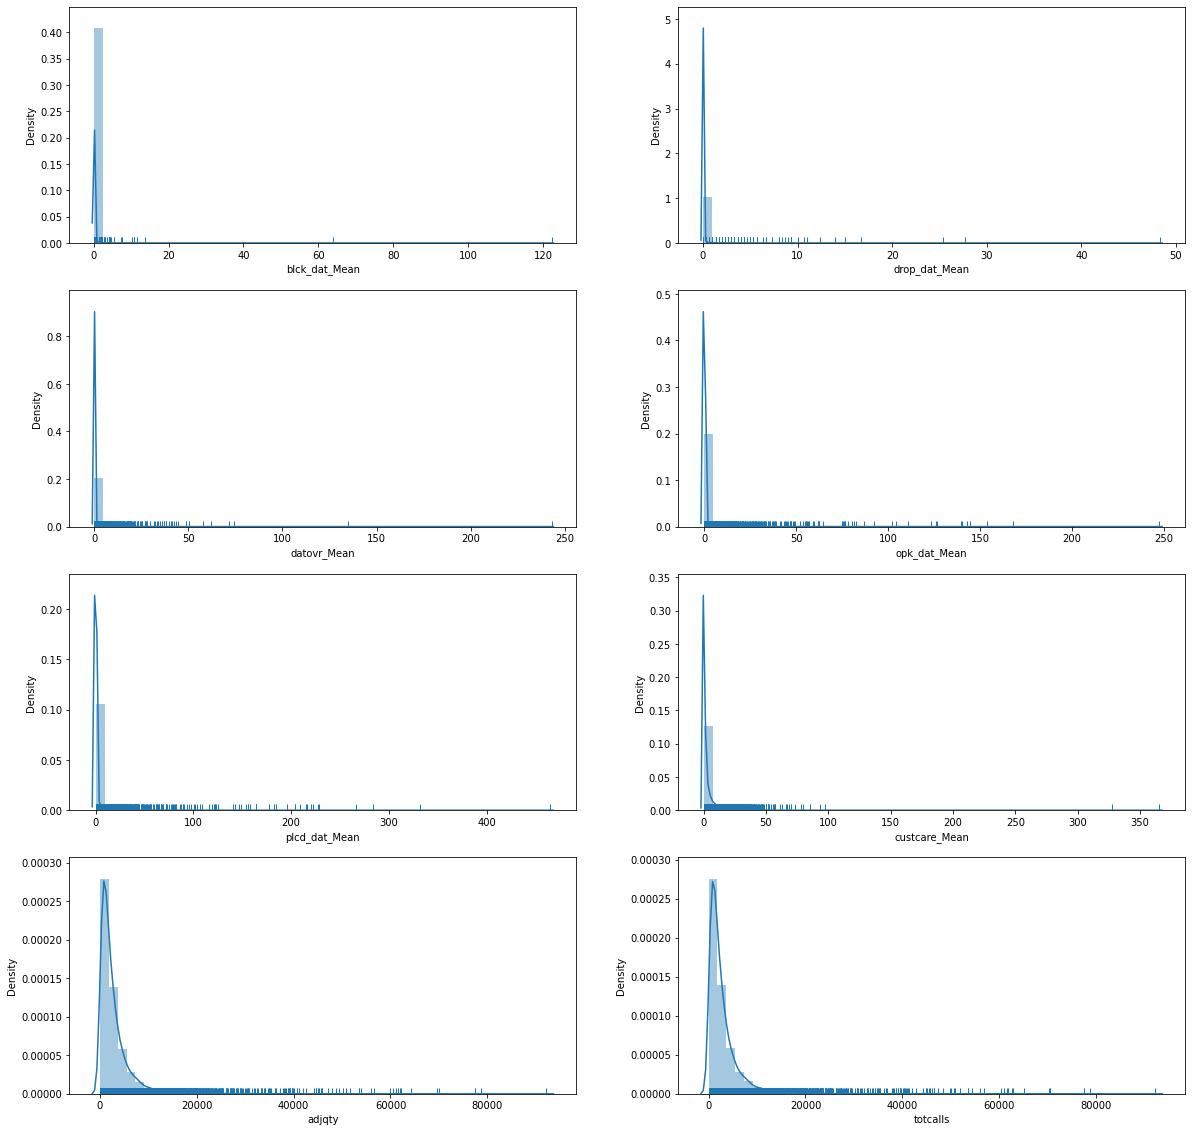

In [19]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,20)

a = sns.distplot(tl['blck_dat_Mean'],rug=True, ax=axes[0][0])

a = sns.distplot(tl['drop_dat_Mean'],rug=True, ax=axes[0][1])

a = sns.distplot(tl['datovr_Mean'],rug=True, ax=axes[1][0])

a = sns.distplot(tl['opk_dat_Mean'],rug=True, ax=axes[1][1])

a = sns.distplot(tl['plcd_dat_Mean'],rug=True, ax=axes[2][0])

a = sns.distplot(tl['custcare_Mean'],rug=True, ax=axes[2][1])

a = sns.distplot(tl['adjqty'],rug=True, ax=axes[3][0])

a = sns.distplot(tl['totcalls'],rug=True, ax=axes[3][1])




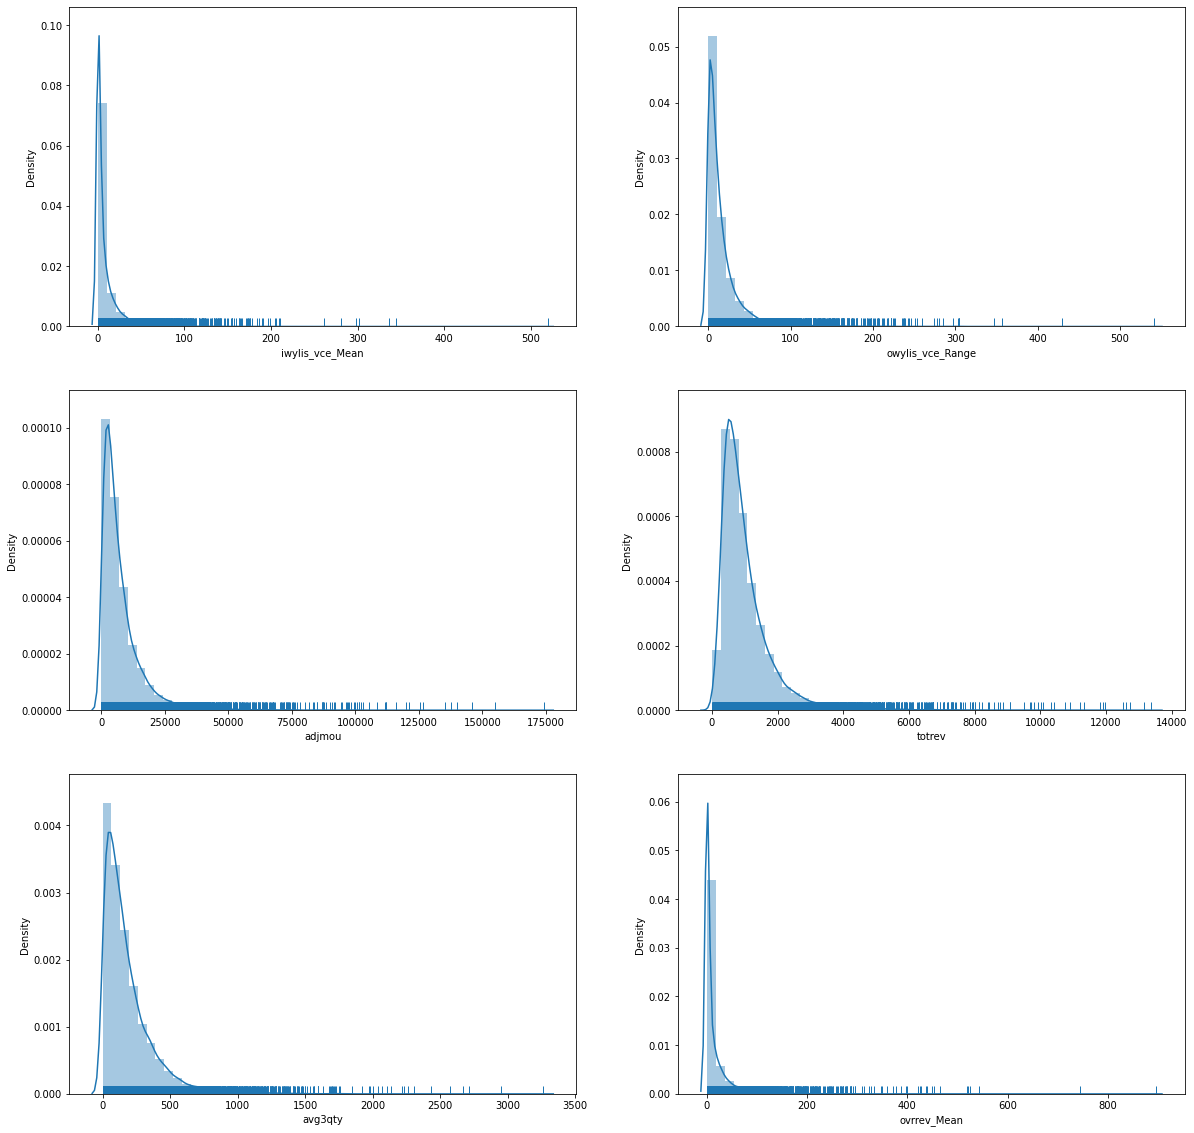

In [20]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,20)

a = sns.distplot(tl['iwylis_vce_Mean'],rug=True, ax=axes[0][0])

a = sns.distplot(tl['owylis_vce_Range'],rug=True, ax=axes[0][1])

a = sns.distplot(tl['adjmou'],rug=True, ax=axes[1][0])

a = sns.distplot(tl['totrev'],rug=True, ax=axes[1][1])

a = sns.distplot(tl['avg3qty'],rug=True, ax=axes[2][0])

a = sns.distplot(tl['ovrrev_Mean'],rug=True, ax=axes[2][1])

## Bivariate Analysis

### Continuous vs Categorical

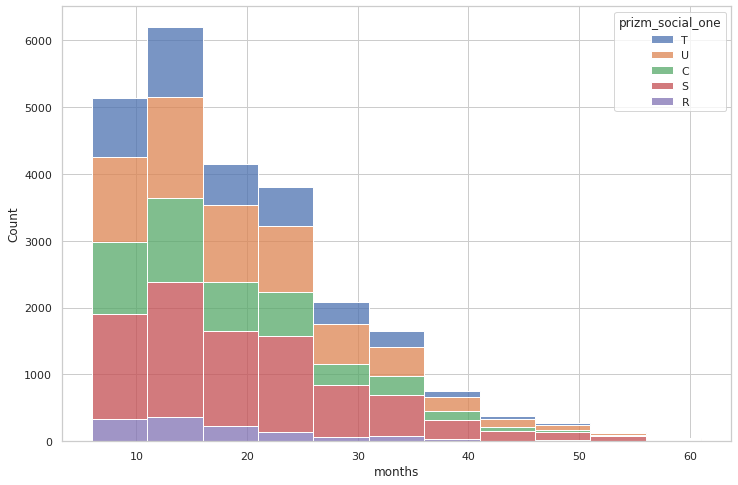

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.histplot(data=tl, x="months",binwidth=5, hue="prizm_social_one", multiple='stack')

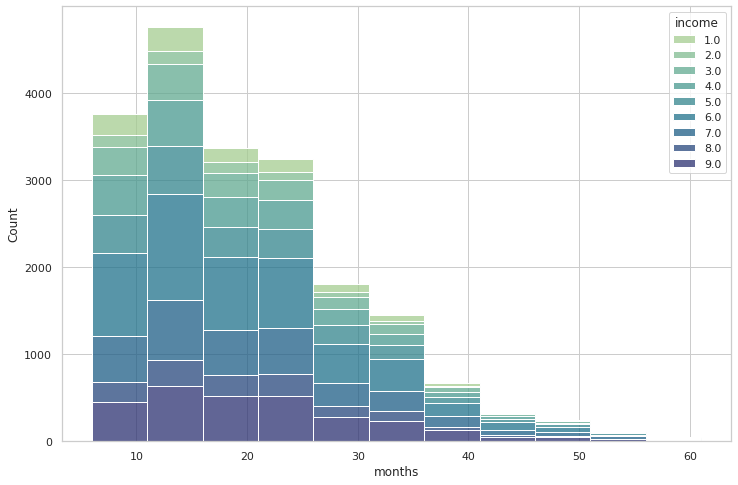

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.histplot(data=tl, x="months",binwidth=5, hue="income", multiple='stack',palette='crest')

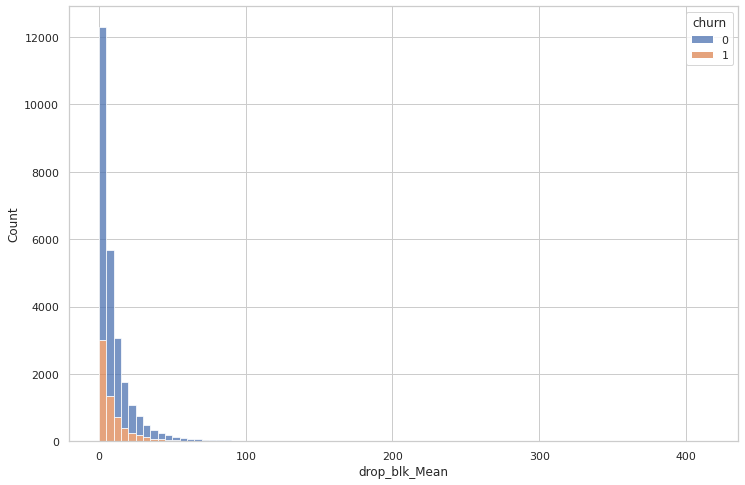

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.histplot(data=tl, x="drop_blk_Mean",binwidth=5, hue="churn", multiple='stack')

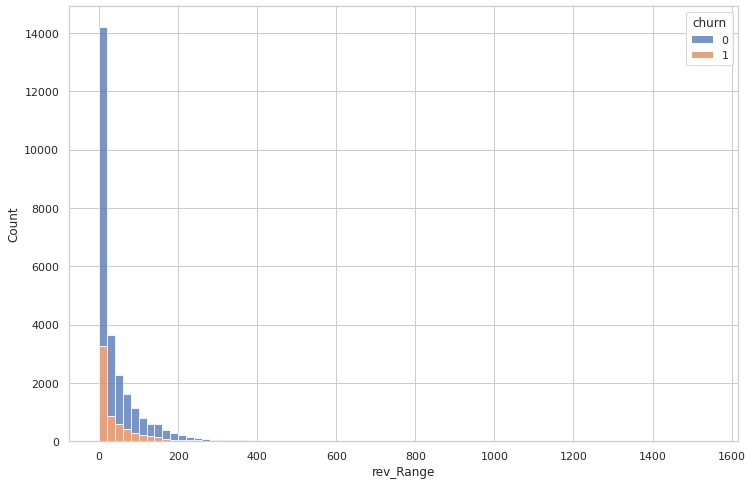

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.histplot(data=tl, x="rev_Range",binwidth=20, hue="churn", multiple='stack')

In [25]:
#Pivot table for Channel,Region vs Total amount spent for each variety
pv_1 =tl.pivot_table(index=['income','churn'], 
                      values=['totrev',],
                   margins=True,margins_name='Total',aggfunc=np.mean)

print (pv_1)

                   totrev
income churn             
1.0    0      1092.704440
       1      1145.236979
2.0    0      1064.811936
       1      1052.214245
3.0    0      1059.046726
       1      1067.152753
4.0    0      1003.569470
       1      1020.461435
5.0    0      1024.207703
       1      1070.782136
6.0    0       979.295204
       1      1003.229345
7.0    0      1055.620801
       1      1024.059578
8.0    0      1028.656026
       1      1133.623277
9.0    0      1090.142331
       1      1129.256586
Total         1038.790489


In [26]:
tl[tl['models']==1]['churn']

0        0
1        0
3        0
4        0
7        0
8        0
9        0
10       0
12       1
15       0
16       0
18       0
19       0
21       0
24       0
25       0
26       1
27       0
28       1
30       0
31       0
32       0
33       0
35       0
38       0
40       0
41       0
42       1
43       0
45       0
46       1
49       0
51       0
53       1
56       0
57       0
59       0
60       1
64       0
65       0
66       0
68       0
69       0
70       0
71       0
73       1
76       0
78       1
79       0
81       0
83       0
86       0
87       1
88       1
90       0
91       0
92       0
93       0
94       0
95       0
96       0
97       0
98       0
99       0
100      0
103      1
104      0
105      1
107      0
109      0
111      0
113      0
115      0
116      0
117      0
118      0
119      0
121      0
122      0
123      0
127      0
129      0
130      0
131      0
132      0
137      0
138      1
140      0
141      1
143      0
147      0

In [27]:
# tl[tl['churn']==1]['refurb_new'].mode()
tl.refurb_new.mode()

0    N
dtype: object

In [28]:
#Pivot table for Channel,Region vs Total amount spent for each variety
pv_2 =tl.pivot_table(index=['churn'], 
                      values=['mou_Mean','totmrc_Mean','rev_Range','mou_Range','change_mou','drop_blk_Mean','drop_vce_Range',
'owylis_vce_Range','mou_opkv_Range','months','totcalls','eqpdays'],
                   margins=True,margins_name='Total',aggfunc=np.mean)

print (pv_2)

       change_mou  drop_blk_Mean  ...     totcalls  totmrc_Mean
churn                             ...                          
0       -6.048303      10.231600  ...  2948.356356    47.846960
1      -23.504190      10.184789  ...  2897.553268    45.102496
Total  -10.210774      10.246045  ...  2936.794400    47.266248

[3 rows x 12 columns]


In [29]:
#Pivot table for Channel,Region vs Total amount spent for each variety
pv_3 =tl.pivot_table(index=['churn'], 
                      values=['custcare_Mean',
'callwait_Mean',
'iwylis_vce_Mean',
'callwait_Range',
'ccrndmou_Range',
'adjqty',
'ovrrev_Mean',
'rev_Mean',
'ovrmou_Mean',
'comp_vce_Mean',
'plcd_vce_Mean'],
                   margins=True,margins_name='Total',aggfunc=np.mean)

print (pv_3)

            adjqty  callwait_Mean  ...  plcd_vce_Mean   rev_Mean
churn                              ...                          
0      2908.584301       1.943965  ...     152.851196  59.461198
1      2854.705217       1.730306  ...     140.152996  59.027750
Total  2896.398035       1.895276  ...     149.909801  59.357292

[3 rows x 11 columns]


In [30]:
#Pivot table for Channel,Region vs Total amount spent for each variety
pv_4 =tl.pivot_table(index=['churn'], 
                      values=[
'avg3mou',
'avgmou',
'avg3qty',
'avgqty',
'avg6mou',
'avg6qty',
'opk_dat_Mean',
'roam_Mean',
'recv_sms_Mean',
'blck_dat_Mean',
'mou_pead_Mean'],
                   margins=True,margins_name='Total',aggfunc=np.mean)

print (pv_4)

          avg3mou     avg3qty  ...  recv_sms_Mean  roam_Mean
churn                          ...                          
0      549.484916  189.142255  ...       0.038454   1.149282
1      503.620365  175.501257  ...       0.033784   1.282143
Total  536.081514  185.483900  ...       0.037788   1.177805

[3 rows x 11 columns]


In [31]:
#Pivot table for Channel,Region vs Total amount spent for each variety
pv_5 =tl.pivot_table(index=['churn'], 
                      values=[
'da_Mean',
'da_Range',
'datovr_Mean',
'datovr_Range',
'drop_dat_Mean',
'drop_vce_Mean',
'adjmou',
'totrev',
'adjrev',
'avgrev',
'comp_dat_Mean',
'plcd_dat_Mean'],
                   margins=True,margins_name='Total',aggfunc=np.mean)

print (pv_5)

            adjmou      adjrev  ...  plcd_dat_Mean       totrev
churn                           ...                            
0      7746.982998  963.725196  ...       0.954021  1036.362991
1      7581.323836  970.298723  ...       0.799654  1041.943840
Total  7710.897204  965.453350  ...       0.918871  1037.887561

[3 rows x 12 columns]


### Churn v Categorical variables

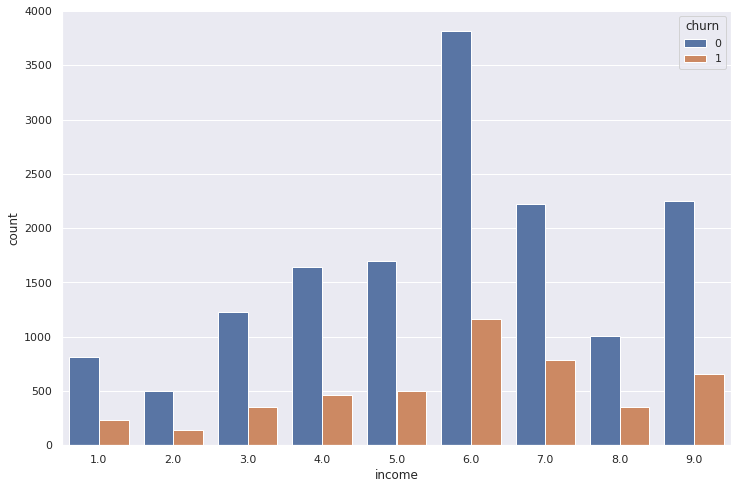

In [32]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(x='income', hue= 'churn', data=tl)

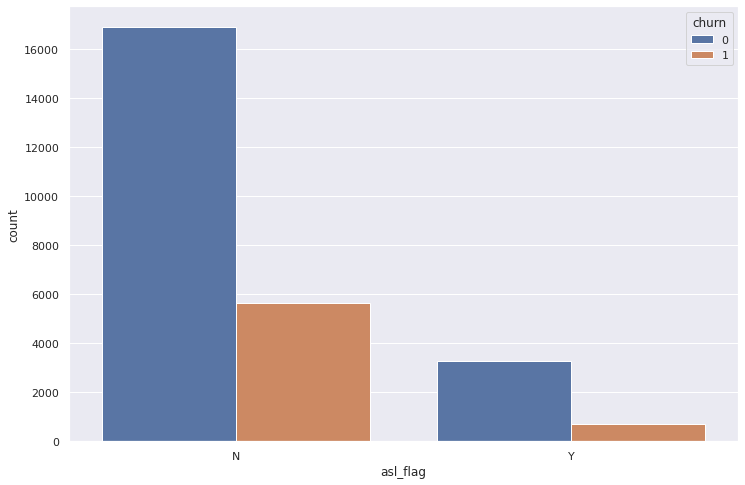

In [33]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(x='asl_flag', hue= 'churn', data=tl)

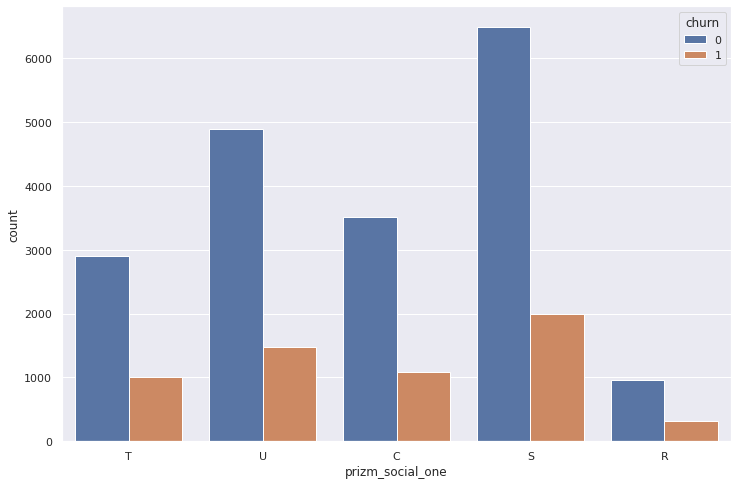

In [34]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(x='prizm_social_one', hue= 'churn', data=tl)

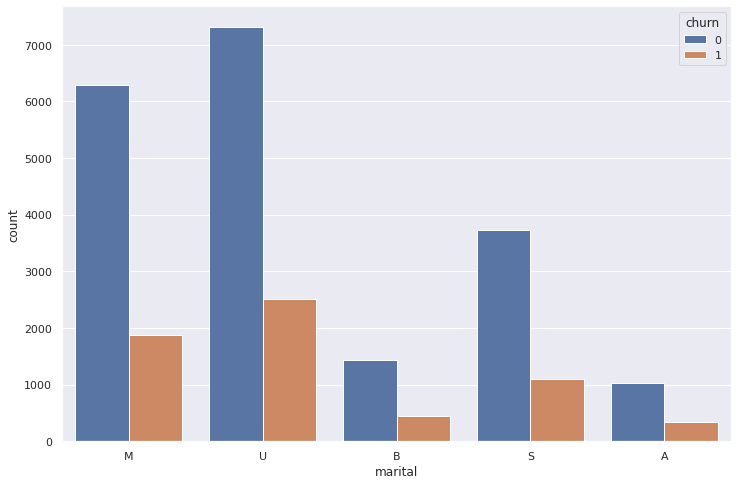

In [35]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(x='marital', hue= 'churn', data=tl)

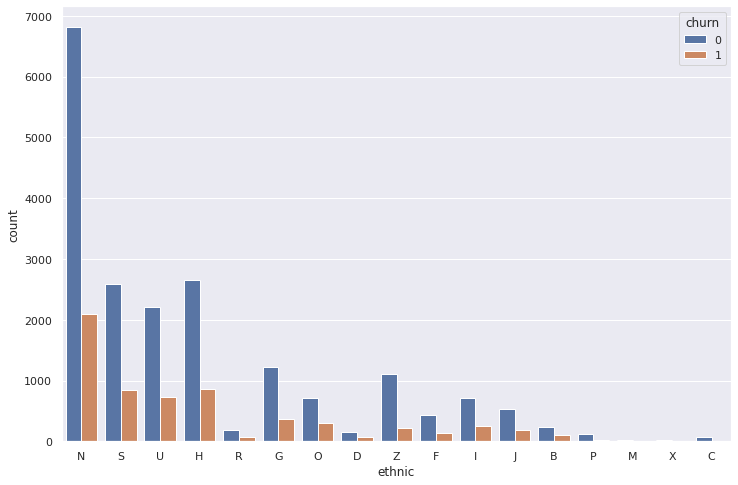

In [36]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(x='ethnic', hue= 'churn', data=tl)

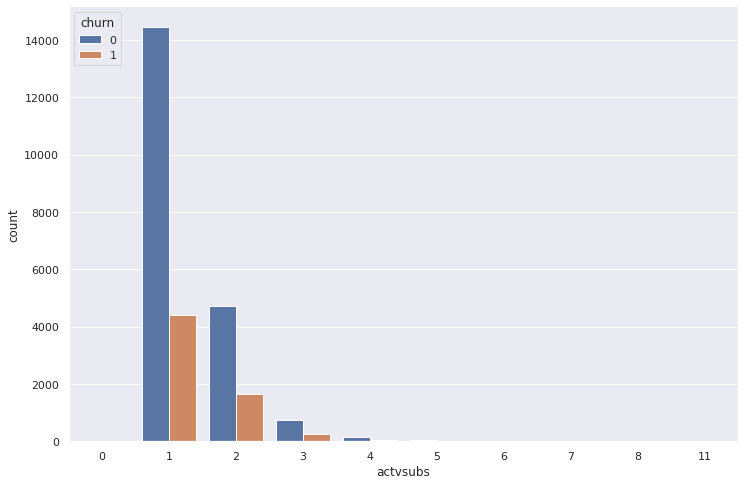

In [37]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(x='actvsubs', hue= 'churn', data=tl)

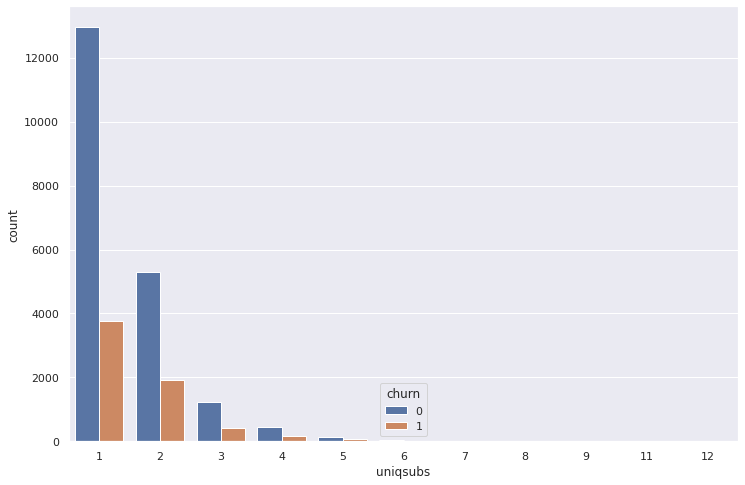

In [38]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(x='uniqsubs', hue= 'churn', data=tl)

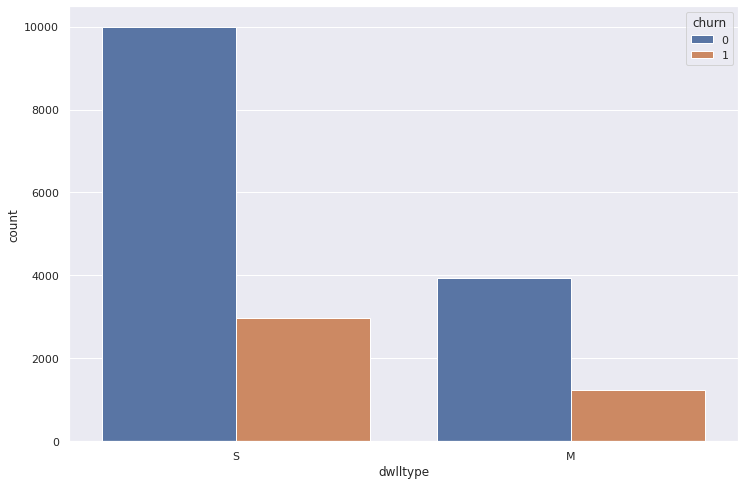

In [39]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(x='dwlltype', hue= 'churn', data=tl)

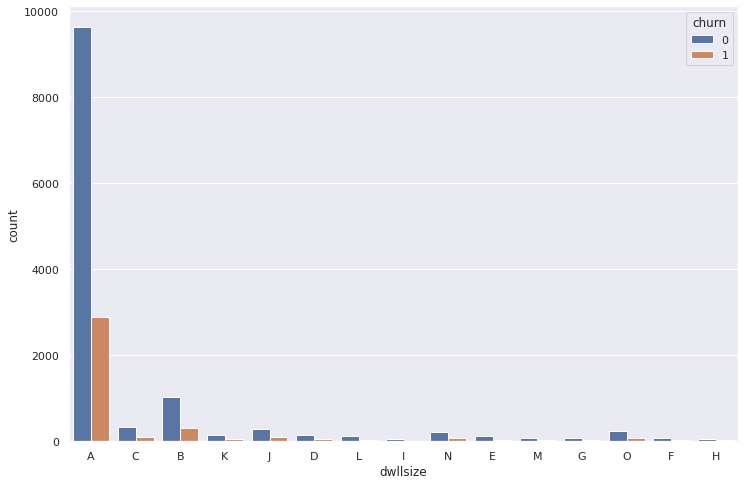

In [40]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(x='dwllsize', hue= 'churn', data=tl)

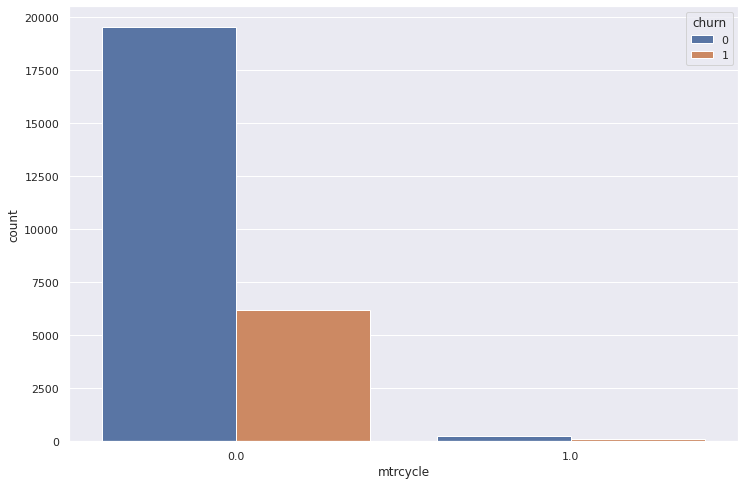

In [41]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(x='mtrcycle', hue= 'churn', data=tl)

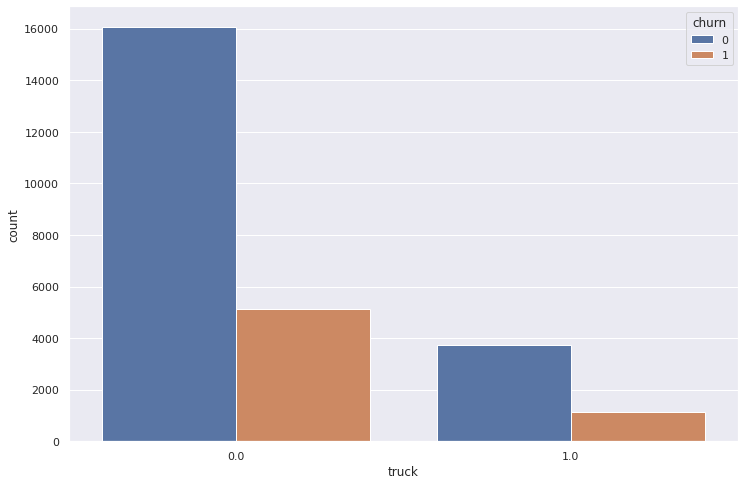

In [42]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(x='truck', hue= 'churn', data=tl)

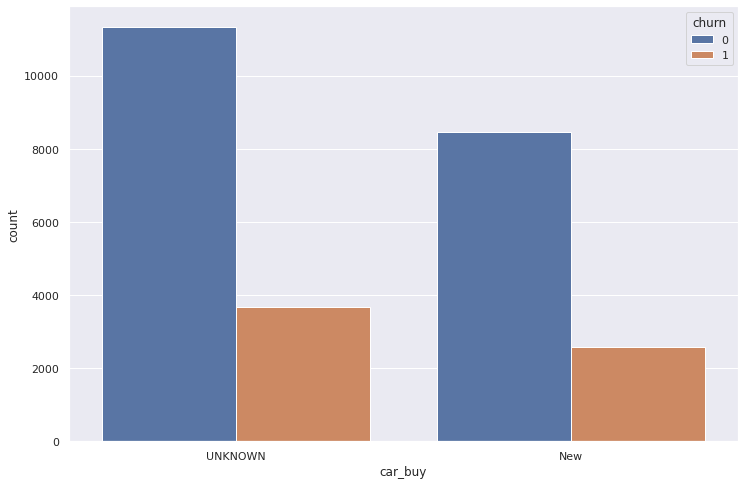

In [43]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(x='car_buy', hue= 'churn', data=tl)

### Continuous vs Continuous with "churn" as hue

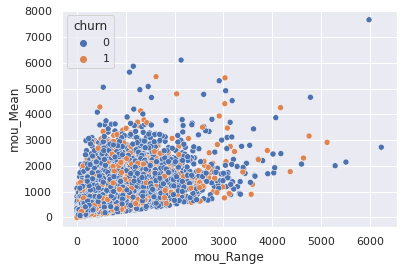

In [44]:
sns.scatterplot(data=tl, x="mou_Range", y="mou_Mean", hue = "churn")

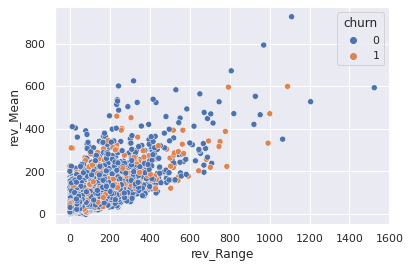

In [45]:
sns.scatterplot(data=tl, x="rev_Range", y="rev_Mean", hue = "churn")

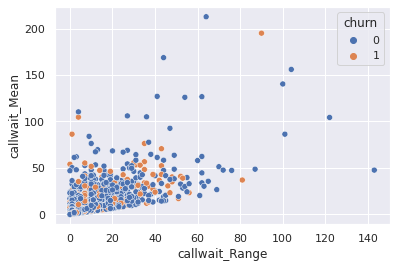

In [46]:
sns.scatterplot(data=tl, x="callwait_Range", y="callwait_Mean", hue = "churn")

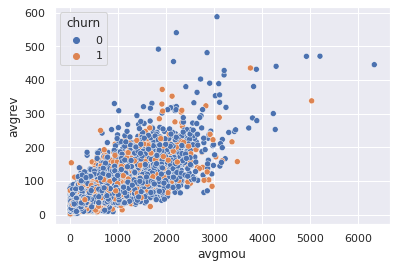

In [47]:
sns.scatterplot(data=tl, x="avgmou", y="avgrev", hue = "churn")

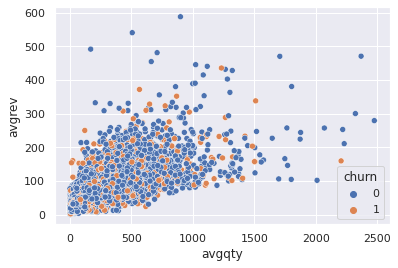

In [48]:
sns.scatterplot(data=tl, x="avgqty", y="avgrev", hue = "churn")

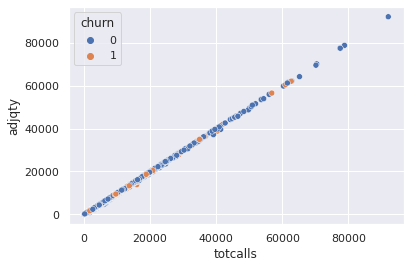

In [49]:
sns.scatterplot(data=tl, x="totcalls", y="adjqty", hue = "churn")

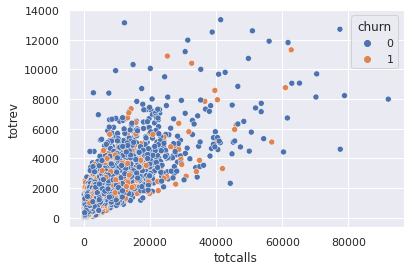

In [50]:
sns.scatterplot(data=tl, x="totcalls", y="totrev", hue = "churn")

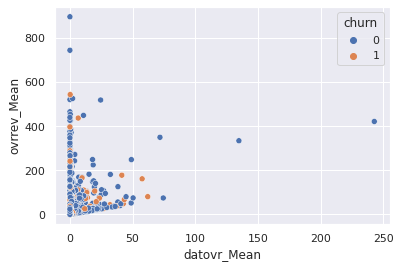

In [51]:
sns.scatterplot(data=tl, x="datovr_Mean", y="ovrrev_Mean", hue = "churn")

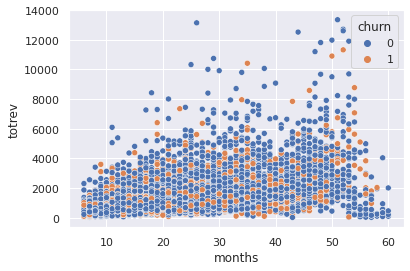

In [52]:
sns.scatterplot(data=tl, x="months", y="totrev", hue = "churn")

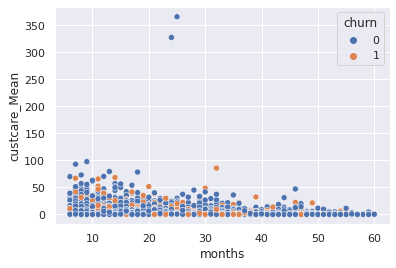

In [53]:
sns.scatterplot(data=tl, x="months", y="custcare_Mean", hue = "churn")

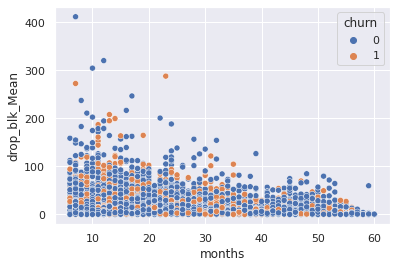

In [54]:
sns.scatterplot(data=tl, x="months", y="drop_blk_Mean", hue = "churn")

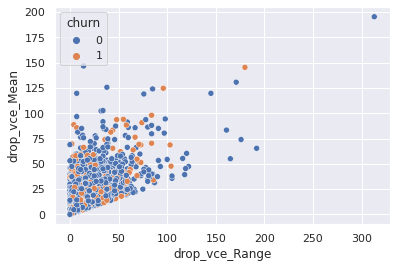

In [55]:
sns.scatterplot(data=tl, x="drop_vce_Range", y="drop_vce_Mean", hue = "churn")

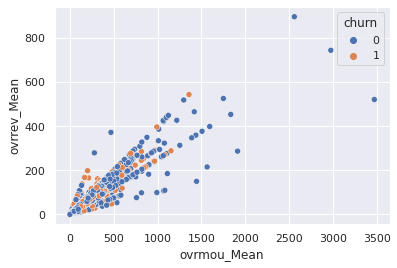

In [56]:
sns.scatterplot(data=tl, x="ovrmou_Mean", y="ovrrev_Mean", hue = "churn")

### IQR Values for continuous variables

In [57]:
#IQR after scaling
tl_cnt.quantile(q=0.75,axis=0) - tl_cnt.quantile(q=0.25,axis=0)

mou_Mean             572.750000
totmrc_Mean           29.990000
rev_Range             55.462500
mou_Range            371.000000
change_mou           148.250000
drop_blk_Mean         10.666667
drop_vce_Range         6.000000
owylis_vce_Range      17.000000
mou_opkv_Range       125.835000
months                13.000000
totcalls            2665.750000
eqpdays              308.000000
custcare_Mean          1.666667
callwait_Mean          1.666667
iwylis_vce_Mean        9.333333
callwait_Range         2.000000
ccrndmou_Range         7.000000
adjqty              2635.750000
ovrrev_Mean           14.175000
rev_Mean              38.189375
ovrmou_Mean           41.250000
comp_vce_Mean        124.333333
plcd_vce_Mean        163.333333
avg3mou              578.000000
avgmou               492.457500
avg3qty              190.000000
avgqty               169.927500
avg6mou              552.000000
avg6qty              184.000000
opk_dat_Mean           0.000000
roam_Mean              0.257500
recv_sms

#### Before Outlier Removal

(array([1, 2]), <a list of 2 Text major ticklabel objects>)

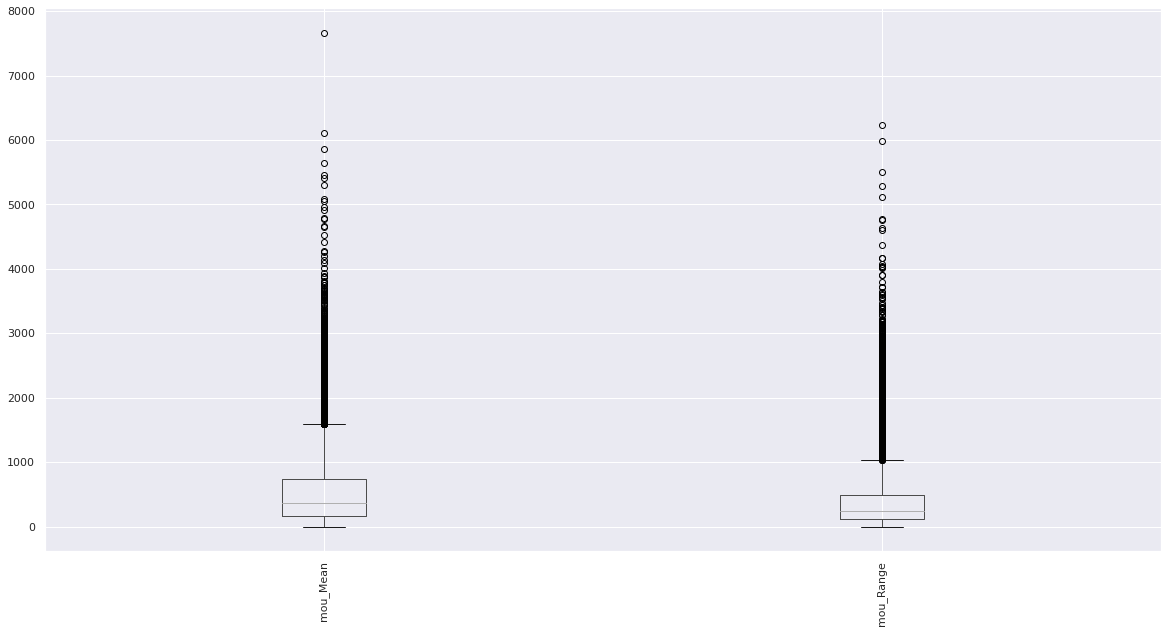

In [58]:
cols_1=['mou_Mean','mou_Range']

tl[cols_1].boxplot(figsize=(20,10))
plt.xticks(rotation = 90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22]), <a list of 22 Text major ticklabel objects>)

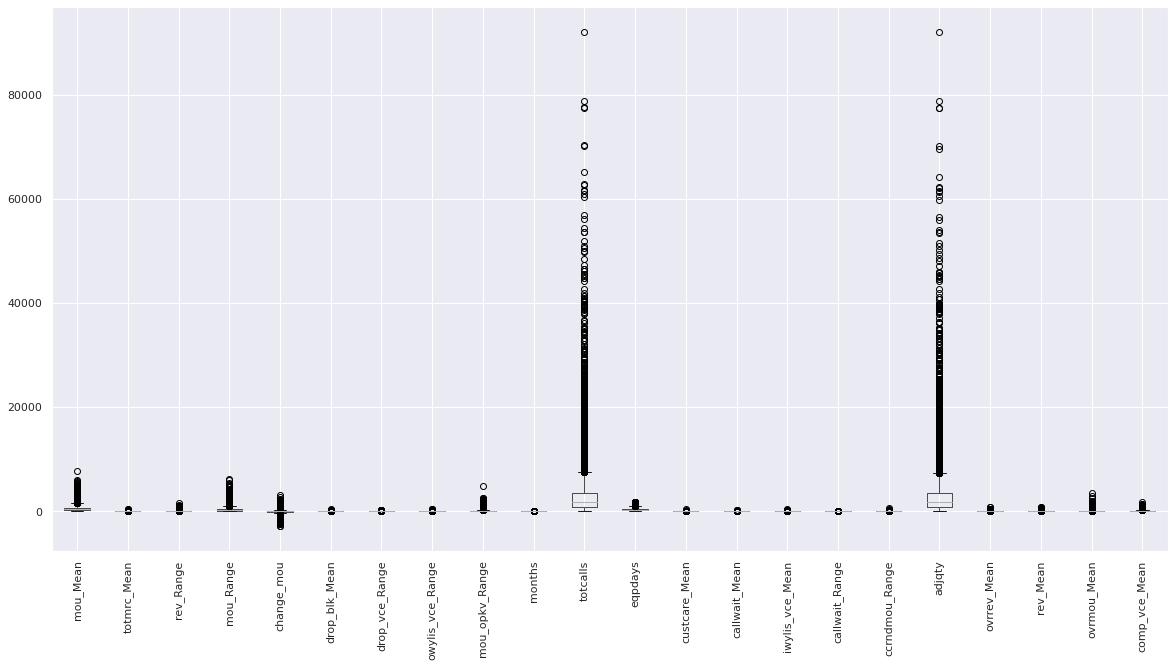

In [59]:
cols_1=['mou_Mean','totmrc_Mean','rev_Range','mou_Range','change_mou','drop_blk_Mean','drop_vce_Range','owylis_vce_Range','mou_opkv_Range','months','totcalls','eqpdays','custcare_Mean','callwait_Mean','iwylis_vce_Mean','callwait_Range','ccrndmou_Range','adjqty','ovrrev_Mean','rev_Mean','ovrmou_Mean','comp_vce_Mean']

tl[cols_1].boxplot(figsize=(20,10))
plt.xticks(rotation = 90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Text major ticklabel objects>)

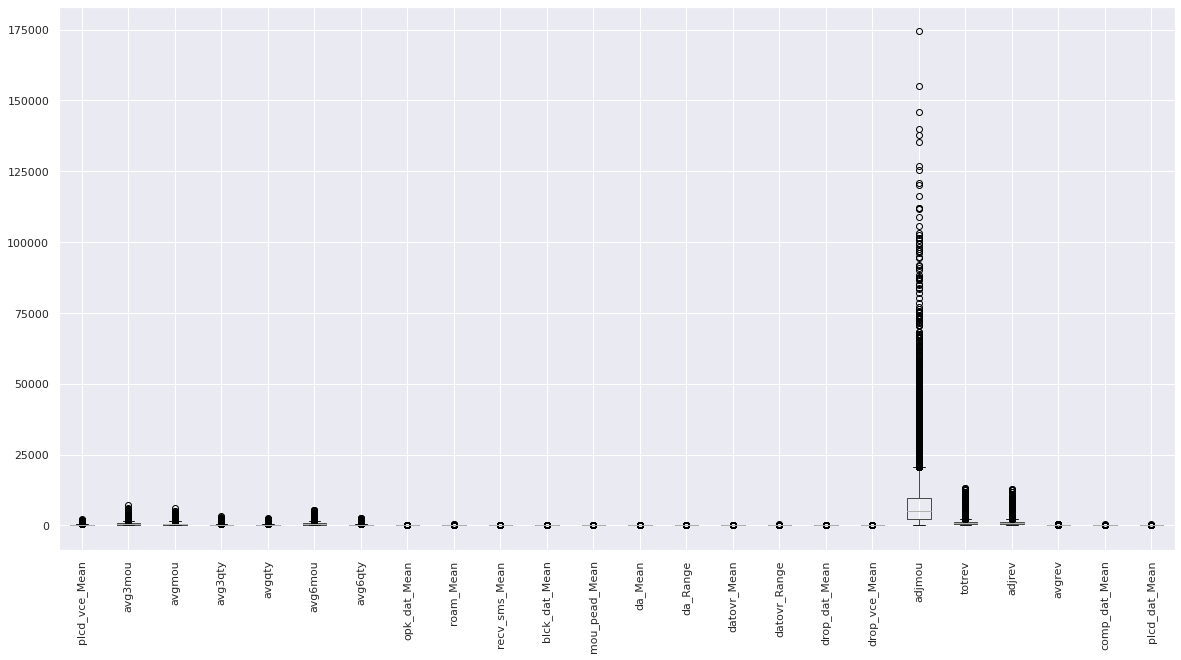

In [60]:
cols_2=['plcd_vce_Mean','avg3mou','avgmou','avg3qty',
        'avgqty','avg6mou','avg6qty','opk_dat_Mean','roam_Mean','recv_sms_Mean','blck_dat_Mean','mou_pead_Mean',
        'da_Mean','da_Range','datovr_Mean','datovr_Range','drop_dat_Mean','drop_vce_Mean','adjmou','totrev','adjrev',
        'avgrev','comp_dat_Mean','plcd_dat_Mean']

tl[cols_2].boxplot(figsize=(20,10))
plt.xticks(rotation = 90)

### Imputation of Missing value 

#### Imputation of missing values in Continuous variables using median

In [61]:
cols = ["mou_Mean","totmrc_Mean","rev_Range","mou_Range","change_mou","ovrrev_Mean","rev_Mean","ovrmou_Mean","avg6mou","avg6qty","roam_Mean","da_Mean","da_Range","datovr_Mean","datovr_Range"]
tl[cols]=tl[cols].fillna(tl[cols].median().iloc[0])

In [62]:
tl.isnull().mean().sort_values(ascending=False)

dwllsize            0.380496
dwlltype            0.316049
income              0.252545
hnd_webcap          0.089826
prizm_social_one    0.070933
forgntvl            0.017648
mtrcycle            0.017648
truck               0.017648
age2                0.017648
marital             0.017648
ethnic              0.017648
age1                0.017648
car_buy             0.017648
hnd_price           0.009578
csa                 0.000189
area                0.000189
ccrndmou_Range      0.000000
rev_Mean            0.000000
ovrrev_Mean         0.000000
ovrmou_Mean         0.000000
comp_vce_Mean       0.000000
adjqty              0.000000
plcd_vce_Mean       0.000000
avg3mou             0.000000
plcd_dat_Mean       0.000000
callwait_Range      0.000000
avg3qty             0.000000
iwylis_vce_Mean     0.000000
callwait_Mean       0.000000
custcare_Mean       0.000000
eqpdays             0.000000
totcalls            0.000000
months              0.000000
mou_opkv_Range      0.000000
owylis_vce_Ran

#### Imputation of missing values in Categorical variables using Mode

In [63]:
cols1 = ["income","prizm_social_one","area","hnd_webcap","marital","ethnic","age1","age2","hnd_price","forgntvl","dwlltype","dwllsize","mtrcycle","truck","car_buy","csa"]
tl[cols1]=tl[cols1].fillna(tl[cols1].mode().iloc[0])

In [64]:
tl.isnull().mean().sort_values(ascending=False)

plcd_dat_Mean       0.0
avg3mou             0.0
adjqty              0.0
ovrrev_Mean         0.0
rev_Mean            0.0
ovrmou_Mean         0.0
comp_vce_Mean       0.0
plcd_vce_Mean       0.0
avgmou              0.0
area                0.0
avg3qty             0.0
avgqty              0.0
avg6mou             0.0
avg6qty             0.0
crclscod            0.0
asl_flag            0.0
ccrndmou_Range      0.0
callwait_Range      0.0
iwylis_vce_Mean     0.0
callwait_Mean       0.0
custcare_Mean       0.0
eqpdays             0.0
income              0.0
totcalls            0.0
months              0.0
mou_opkv_Range      0.0
owylis_vce_Range    0.0
drop_vce_Range      0.0
drop_blk_Mean       0.0
change_mou          0.0
mou_Range           0.0
rev_Range           0.0
totmrc_Mean         0.0
prizm_social_one    0.0
refurb_new          0.0
comp_dat_Mean       0.0
datovr_Mean         0.0
mou_pead_Mean       0.0
churn               0.0
car_buy             0.0
csa                 0.0
da_Mean         

In [65]:
tl.shape

(26518, 69)

#### Total missing values

In [66]:
print("The total null values present in the dataset post imputation:",tl.isnull().sum().sum())

The total null values present in the dataset post imputation: 0


## Scaling continuous variables

In [67]:
from scipy.stats import zscore
scale=tl[['mou_Mean','totmrc_Mean','rev_Range','mou_Range','change_mou','drop_blk_Mean','drop_vce_Range','owylis_vce_Range','mou_opkv_Range','months','totcalls','eqpdays','custcare_Mean','callwait_Mean','iwylis_vce_Mean','callwait_Range','ccrndmou_Range','adjqty','ovrrev_Mean','rev_Mean','ovrmou_Mean','comp_vce_Mean','plcd_vce_Mean','avg3mou','avgmou','avg3qty','avgqty','avg6mou','avg6qty','opk_dat_Mean','roam_Mean','recv_sms_Mean','blck_dat_Mean','mou_pead_Mean','da_Mean','da_Range','datovr_Mean','datovr_Range','drop_dat_Mean','drop_vce_Mean','adjmou','totrev','adjrev','avgrev','comp_dat_Mean','plcd_dat_Mean']].apply(zscore)


#### Outlier Removal

In [68]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [69]:
cols=['mou_Mean','totmrc_Mean','rev_Range','mou_Range','change_mou','drop_blk_Mean','drop_vce_Range','owylis_vce_Range','mou_opkv_Range','months','totcalls','eqpdays','custcare_Mean','callwait_Mean','iwylis_vce_Mean','callwait_Range','ccrndmou_Range','adjqty','ovrrev_Mean','rev_Mean','ovrmou_Mean','comp_vce_Mean','plcd_vce_Mean','avg3mou','avgmou','avg3qty','avgqty','avg6mou','avg6qty','opk_dat_Mean','roam_Mean','recv_sms_Mean','blck_dat_Mean','mou_pead_Mean','da_Mean','da_Range','datovr_Mean','datovr_Range','drop_dat_Mean','drop_vce_Mean','adjmou','totrev','adjrev','avgrev','comp_dat_Mean','plcd_dat_Mean']
for column in cols:
#     if tl[column].dtype != 'object': 
        lr,ur=remove_outlier(tl[column])
        tl[column]=np.where(tl[column]>ur,ur,tl[column])
        tl[column]=np.where(tl[column]<lr,lr,tl[column])

In [70]:
cols=['mou_Mean','totmrc_Mean','rev_Range','mou_Range','change_mou','drop_blk_Mean','drop_vce_Range','owylis_vce_Range','mou_opkv_Range','months','totcalls','eqpdays','custcare_Mean','callwait_Mean','iwylis_vce_Mean','callwait_Range','ccrndmou_Range','adjqty','ovrrev_Mean','rev_Mean','ovrmou_Mean','comp_vce_Mean','plcd_vce_Mean','avg3mou','avgmou','avg3qty','avgqty','avg6mou','avg6qty','opk_dat_Mean','roam_Mean','recv_sms_Mean','blck_dat_Mean','mou_pead_Mean','da_Mean','da_Range','datovr_Mean','datovr_Range','drop_dat_Mean','drop_vce_Mean','adjmou','totrev','adjrev','avgrev','comp_dat_Mean','plcd_dat_Mean']
for column in cols:
#     if tl[column].dtype != 'object': 
        lr,ur=remove_outlier(scale[column])
        scale[column]=np.where(scale[column]>ur,ur,scale[column])
        scale[column]=np.where(scale[column]<lr,lr,scale[column])

#### After Outlier Removal

(array([1, 2]), <a list of 2 Text major ticklabel objects>)

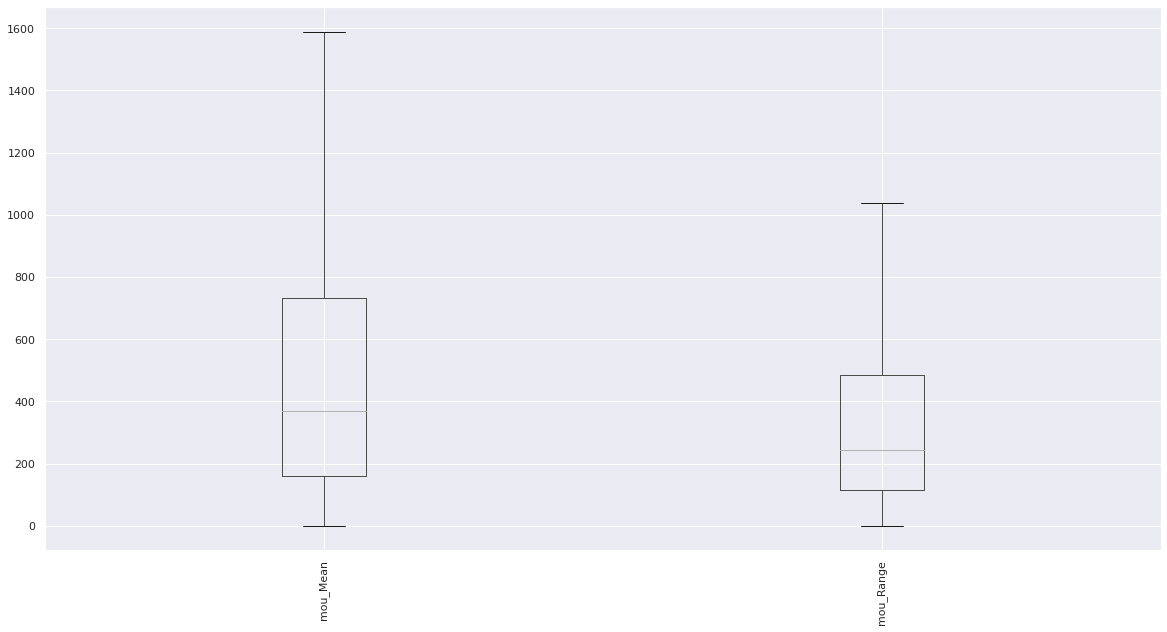

In [71]:
cols_1=['mou_Mean','mou_Range']

tl[cols_1].boxplot(figsize=(20,10))
plt.xticks(rotation = 90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22]), <a list of 22 Text major ticklabel objects>)

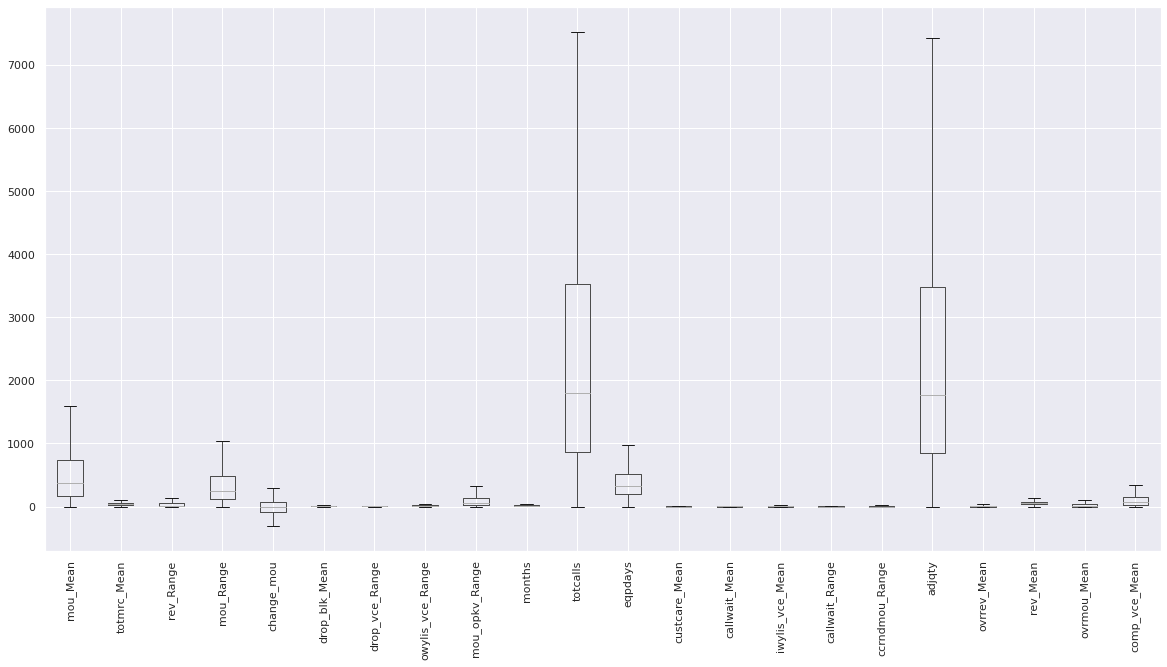

In [72]:
cols_1=['mou_Mean','totmrc_Mean','rev_Range','mou_Range','change_mou','drop_blk_Mean','drop_vce_Range','owylis_vce_Range','mou_opkv_Range','months','totcalls','eqpdays','custcare_Mean','callwait_Mean','iwylis_vce_Mean','callwait_Range','ccrndmou_Range','adjqty','ovrrev_Mean','rev_Mean','ovrmou_Mean','comp_vce_Mean']

tl[cols_1].boxplot(figsize=(20,10))
plt.xticks(rotation = 90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22]), <a list of 22 Text major ticklabel objects>)

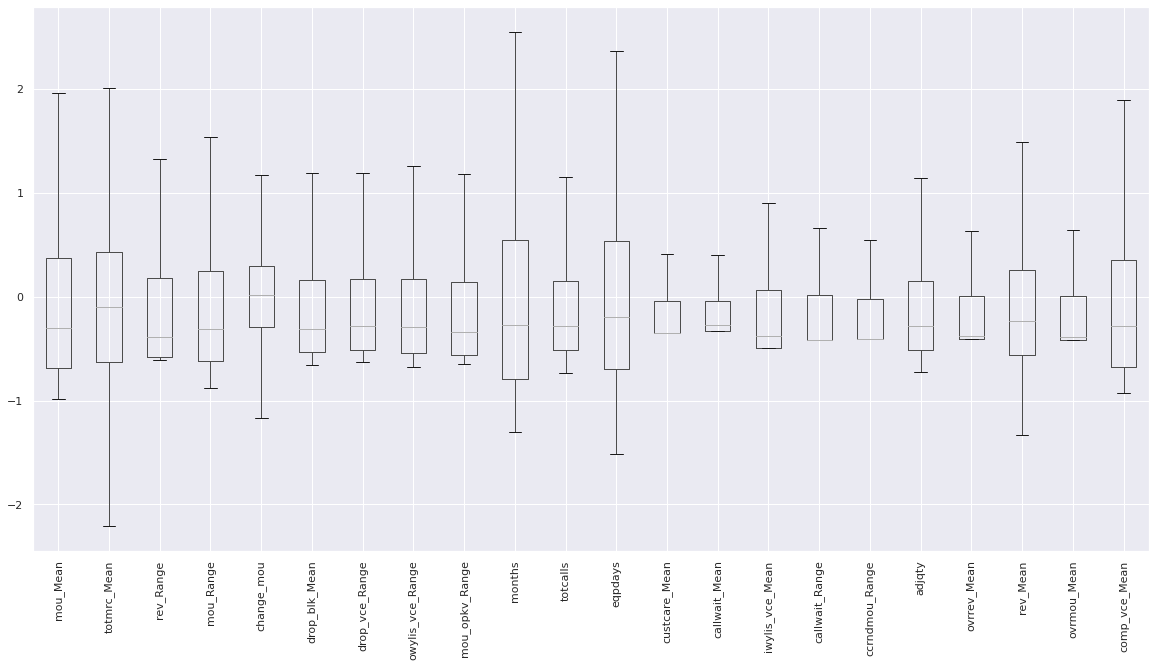

In [73]:
scale[cols_1].boxplot(figsize=(20,10))
plt.xticks(rotation = 90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Text major ticklabel objects>)

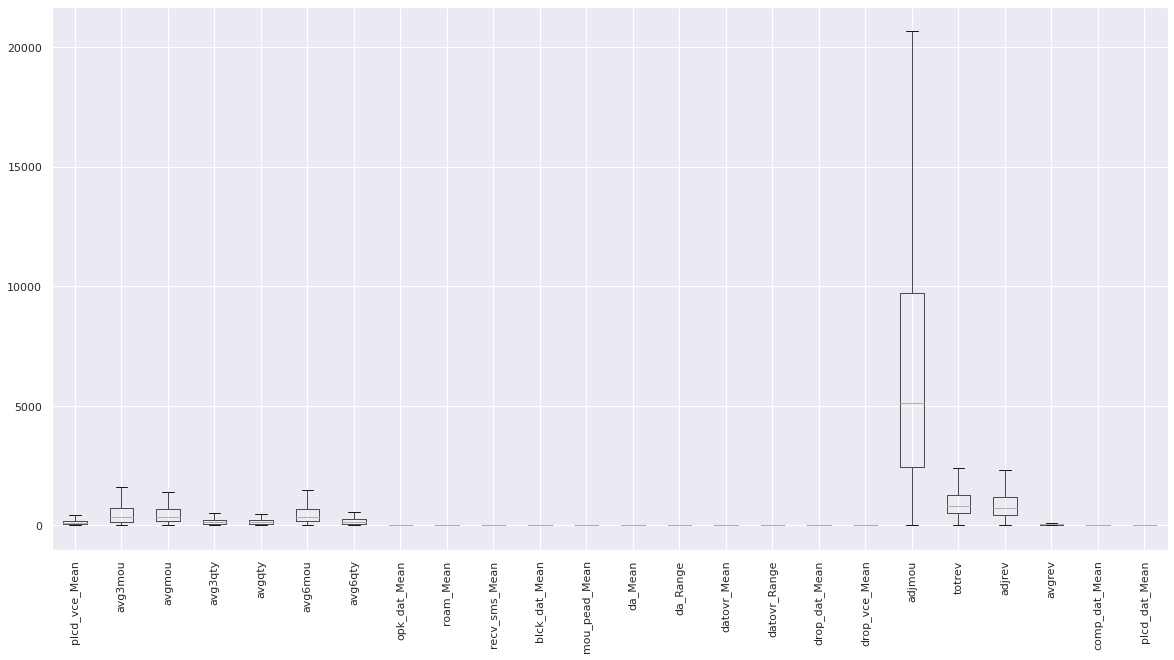

In [74]:
cols_2=['plcd_vce_Mean','avg3mou','avgmou','avg3qty',
        'avgqty','avg6mou','avg6qty','opk_dat_Mean','roam_Mean','recv_sms_Mean','blck_dat_Mean','mou_pead_Mean',
        'da_Mean','da_Range','datovr_Mean','datovr_Range','drop_dat_Mean','drop_vce_Mean','adjmou','totrev','adjrev',
        'avgrev','comp_dat_Mean','plcd_dat_Mean']

tl[cols_2].boxplot(figsize=(20,10))
plt.xticks(rotation = 90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Text major ticklabel objects>)

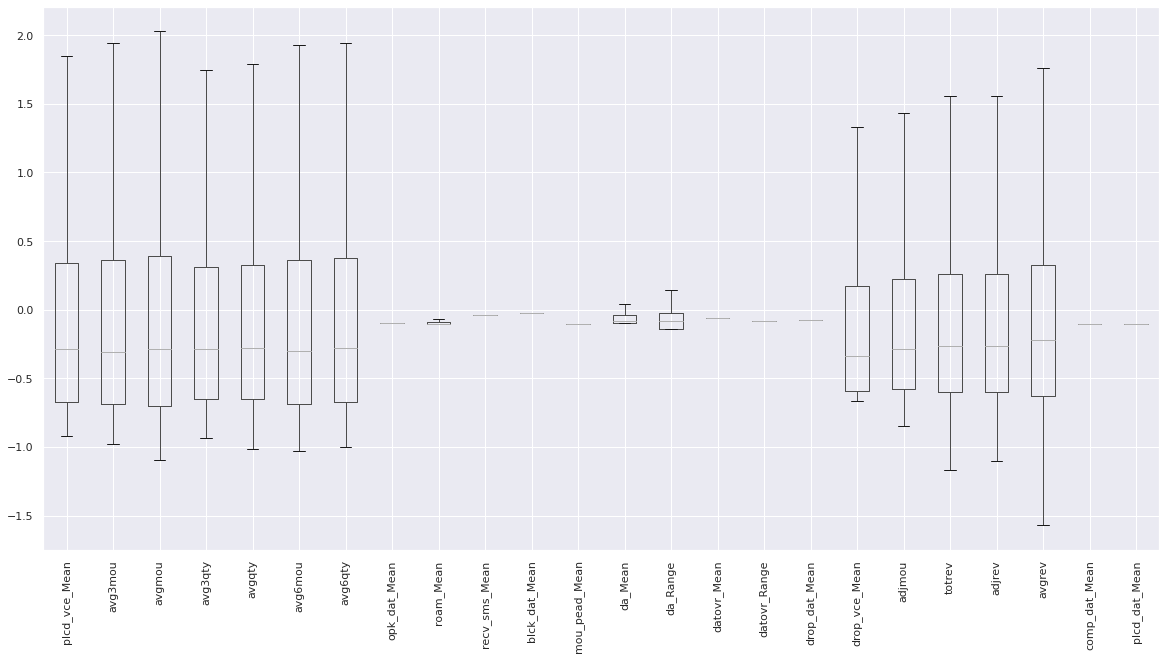

In [75]:
scale[cols_2].boxplot(figsize=(20,10))
plt.xticks(rotation = 90)

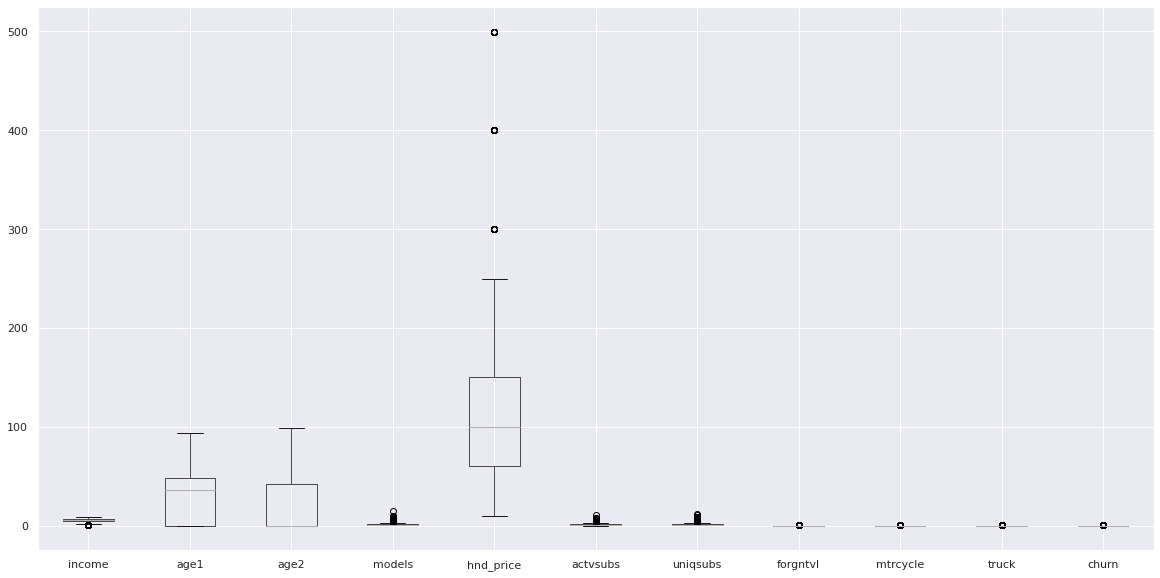

In [76]:
cols_3=['income','crclscod','asl_flag','prizm_social_one','area','refurb_new','hnd_webcap','marital','ethnic','age1','age2','models','hnd_price','actvsubs','uniqsubs','forgntvl','dwlltype','dwllsize','mtrcycle','truck','churn','car_buy','csa']
tl[cols_3].boxplot(figsize=(20,10))

### One Hot Encoding

In [77]:
tl_ohe = pd.get_dummies(tl, columns=['crclscod','asl_flag','prizm_social_one','area','refurb_new','dwlltype','hnd_webcap','ethnic','marital','dwllsize','car_buy','csa'],drop_first=True)
tl_ohe.head()

mou_Mean  totmrc_Mean  ...  csa_VAHRAD540  csa_VAHROA540
0    190.25      63.9400  ...              0              0
1    443.00      39.9900  ...              0              0
2    400.50      44.9900  ...              0              0
3     53.50      34.6675  ...              0              0
4     37.00      21.0425  ...              0              0

[5 rows x 860 columns]

There are few categorical variables that have more 20 different values. Considering the categorical variables are nominal and not ordinal; opting for One hot encoding increases the number of variables  exponentially i.e.,to 860 variables. Hence performing label encoding on categorical variables.

### Label Encoding

In [78]:
#Converting all objects to categorical codes
for feature in tl.columns: 
    if tl[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(tl[feature].unique()))
        print(pd.Categorical(tl[feature].unique()).codes)
        tl[feature] = pd.Categorical(tl[feature]).codes



feature: crclscod
['AA', 'EA', 'C', 'G', 'CA', ..., 'TP', 'A3', 'Z2', 'Z1', 'D2']
Length: 49
Categories (49, object): ['A', 'A2', 'A3', 'AA', ..., 'Z4', 'Z5', 'ZA', 'ZY']
[ 3 21  7 25 10 20 18  4  6 35  0 17 37 47 15  1 16  8 26 45 32 30 48 27
 42 11 29  5 24 19 33 34 22 39 12 13 38 46  9 40 31 28 23 41 36  2 44 43
 14]


feature: asl_flag
['N', 'Y']
Categories (2, object): ['N', 'Y']
[0 1]


feature: prizm_social_one
['T', 'U', 'C', 'S', 'R']
Categories (5, object): ['C', 'R', 'S', 'T', 'U']
[3 4 0 2 1]


feature: area
['ATLANTIC SOUTH AREA', 'LOS ANGELES AREA', 'MIDWEST AREA', 'DC/MARYLAND/VIRGINIA AREA', 'NEW YORK CITY AREA', ..., 'SOUTH FLORIDA AREA', 'CENTRAL/SOUTH TEXAS AREA', 'TENNESSEE AREA', 'GREAT LAKES AREA', 'PHILADELPHIA AREA']
Length: 19
Categories (19, object): ['ATLANTIC SOUTH AREA', 'CALIFORNIA NORTH AREA', 'CENTRAL/SOUTH TEXAS AREA',
                          'CHICAGO AREA', ..., 'PHILADELPHIA AREA', 'SOUTH FLORIDA AREA',
                          'SOUTHWEST AREA', 

In [79]:
tl.head()

mou_Mean  totmrc_Mean  rev_Range  ...  avgrev  comp_dat_Mean  plcd_dat_Mean
0    190.25      63.9400      26.00  ...   37.62            0.0            0.0
1    443.00      39.9900       5.10  ...   44.88            0.0            0.0
2    400.50      44.9900      13.88  ...   58.75            0.0            0.0
3     53.50      34.6675      18.56  ...   68.65            0.0            0.0
4     37.00      21.0425      35.79  ...   29.57            0.0            0.0

[5 rows x 69 columns]

### Feature Selection:Performing SelectKBest method on categorical variables

In [80]:
tl['age1'].unique()

array([36.,  0., 32., 34., 78., 50., 40., 54., 28., 22., 46., 24., 56.,
       26., 42., 30., 60., 58., 44., 38., 48., 70., 52., 64., 72., 66.,
       18., 88., 68., 80., 62., 76., 82., 20., 86., 84., 74., 94., 90.,
       92.])

In [81]:
tl['age2'].unique()

array([ 0., 30., 38., 48., 42., 52., 72., 54., 46., 56., 32., 28., 24.,
       44., 20., 50., 26., 40., 22., 60., 66., 18., 36., 70., 86., 34.,
       58., 64., 78., 82., 68., 62., 76., 74., 90., 80., 94., 84., 92.,
       98., 88., 96., 99.])

In [82]:
bins=[0,15,30,45,60,75,90,105]
labels=[0,1,2,3,4,5,6]
tl['age_1']=pd.cut(tl['age1'],bins=bins,labels=labels,include_lowest=True)
tl['age_2']=pd.cut(tl['age2'],bins=bins,labels=labels,include_lowest=True)
# print(tl[['age1','a1']])
# a2=[0,15,30,45,60,75,90,105]

In [83]:
bin1=[0,50,100,150,200,250,300,350,400,450,500]
label1=[0,1,2,3,4,5,6,7,8,9]
tl['hp']=pd.cut(tl['hnd_price'],bins=bin1,labels=label1,include_lowest=True)

In [84]:
# tl.astype({"age_1": int,"age_2": int,"hp": int}).dtypes
# {"a": int, "b": complex}
# df.astype({'col1': 'int32'}).dtypes
tl['age_1'] = tl['age_1'].astype('int')
tl['age_2'] = tl['age_2'].astype('int')
tl['hp'] = tl['hp'].astype('int')
# tl['age_1']=tl.astype({"age_1":int}).dtypes
# tl['age_2']=tl.astype({"age_2":int}).dtypes
# tl['hp']=tl.astype({"hp":int}).dtypes

In [85]:
tl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26518 entries, 0 to 26517
Data columns (total 72 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mou_Mean          26518 non-null  float64
 1   totmrc_Mean       26518 non-null  float64
 2   rev_Range         26518 non-null  float64
 3   mou_Range         26518 non-null  float64
 4   change_mou        26518 non-null  float64
 5   drop_blk_Mean     26518 non-null  float64
 6   drop_vce_Range    26518 non-null  float64
 7   owylis_vce_Range  26518 non-null  float64
 8   mou_opkv_Range    26518 non-null  float64
 9   months            26518 non-null  float64
 10  totcalls          26518 non-null  float64
 11  income            26518 non-null  float64
 12  eqpdays           26518 non-null  float64
 13  custcare_Mean     26518 non-null  float64
 14  callwait_Mean     26518 non-null  float64
 15  iwylis_vce_Mean   26518 non-null  float64
 16  callwait_Range    26518 non-null  float6

In [86]:
catg=tl[['income','crclscod','asl_flag','prizm_social_one','area','refurb_new','hnd_webcap','marital','ethnic','age_1','age_2','models','hp','actvsubs','uniqsubs','forgntvl','dwlltype','dwllsize','mtrcycle','truck','car_buy','csa']]

In [87]:
tg=tl['churn']

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_selector = SelectKBest(chi2, k=15)
X_kbest = chi2_selector.fit_transform(catg, tg)

In [89]:
# dataframe = pd.DataFrame(X_kbest, columns=chi2_selector)

In [90]:
cols = chi2_selector.get_support(indices=True)
features_df_new = catg.iloc[:,cols]

In [91]:
features_df_new.columns

Index(['income', 'crclscod', 'asl_flag', 'area', 'refurb_new', 'hnd_webcap',
       'marital', 'ethnic', 'age_1', 'age_2', 'models', 'hp', 'actvsubs',
       'uniqsubs', 'car_buy'],
      dtype='object')

In [92]:
tl[tl['churn']==1]['eqpdays'].mean()/tl[tl['churn']==0]['eqpdays'].mean()

1.1563731913216908

### Feature Selection:Building Logit model and checking VIF on continuous variables

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
import statsmodels.formula.api as SM

In [95]:
tl_cont=tl[['mou_Mean','totmrc_Mean','rev_Range','mou_Range','change_mou','drop_blk_Mean','drop_vce_Range','owylis_vce_Range','mou_opkv_Range','months','totcalls','eqpdays','custcare_Mean','callwait_Mean','iwylis_vce_Mean','callwait_Range','ccrndmou_Range','adjqty','ovrrev_Mean','rev_Mean','ovrmou_Mean','comp_vce_Mean','plcd_vce_Mean','avg3mou','avgmou','avg3qty','avgqty','avg6mou','avg6qty','opk_dat_Mean','roam_Mean','recv_sms_Mean','blck_dat_Mean','mou_pead_Mean','da_Mean','da_Range','datovr_Mean','datovr_Range','drop_dat_Mean','drop_vce_Mean','adjmou','totrev','adjrev','avgrev','comp_dat_Mean','plcd_dat_Mean','churn']]

In [96]:
td1=tl[['opk_dat_Mean','recv_sms_Mean','blck_dat_Mean','mou_pead_Mean','datovr_Mean','datovr_Range','drop_dat_Mean','comp_dat_Mean','plcd_dat_Mean']]

In [97]:
td1.describe().T

count  mean  std  min  25%  50%  75%  max
opk_dat_Mean   26518.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
recv_sms_Mean  26518.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
blck_dat_Mean  26518.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
mou_pead_Mean  26518.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
datovr_Mean    26518.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
datovr_Range   26518.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
drop_dat_Mean  26518.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
comp_dat_Mean  26518.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
plcd_dat_Mean  26518.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

#### Dropping variables with only Null values

In [98]:
tl_cont.drop(['opk_dat_Mean','recv_sms_Mean','blck_dat_Mean','mou_pead_Mean','datovr_Mean','datovr_Range','drop_dat_Mean','comp_dat_Mean','plcd_dat_Mean'],axis=1,inplace=True)

In [99]:
tl.drop(['opk_dat_Mean','recv_sms_Mean','blck_dat_Mean','mou_pead_Mean','datovr_Mean','datovr_Range','drop_dat_Mean','comp_dat_Mean','plcd_dat_Mean'],axis=1,inplace=True)

In [100]:
tl.shape

(26518, 63)

#### Building Logit model

In [101]:
y = tl_cont['churn']
X = tl_cont.drop(['churn'],axis=1)

In [102]:
X.shape

(26518, 37)

In [103]:
f_1 = 'churn ~ mou_Mean + totmrc_Mean + rev_Range + mou_Range + change_mou + drop_blk_Mean + drop_vce_Range + owylis_vce_Range + mou_opkv_Range + months + totcalls + eqpdays + custcare_Mean + callwait_Mean + iwylis_vce_Mean + callwait_Range + ccrndmou_Range + adjqty + ovrrev_Mean + rev_Mean + ovrmou_Mean + comp_vce_Mean + plcd_vce_Mean + avg3mou + avgmou + avg3qty + avgqty + avg6mou + avg6qty + roam_Mean + da_Mean + da_Range + drop_vce_Mean + adjmou + totrev + adjrev + avgrev'

In [104]:
model_1 = SM.logit(formula = f_1, data=tl_cont).fit()

Optimization terminated successfully.
         Current function value: 0.536709
         Iterations 5


In [105]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                26518
Model:                          Logit   Df Residuals:                    26480
Method:                           MLE   Df Model:                           37
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                 0.02605
Time:                        14:36:23   Log-Likelihood:                -14232.
converged:                       True   LL-Null:                       -14613.
Covariance Type:            nonrobust   LLR p-value:                4.567e-136
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2588      0.077    -16.245      0.000      -1.411      -1.107
mou_Mean            -0.0013      0.000     -5.014      0.000      -0.002      -0.001
totmrc_Mean         -0.0053      0.001     -3.792      0.000      -0.008      -0.003
rev_Range           -0.0004      0.001     -0.651      0.515      -0.002       0.001
mou_Range            0.0004    8.9e-05      4.986      0.000       0.000       0.001
change_mou          -0.0002      0.000     -1.284      0.199      -0.000    9.22e-05
drop_blk_Mean        0.0085      0.004      2.389      0.017       0.002       0.015
drop_vce_Range       0.0048      0.005      0.914      0.360      -0.005       0.015
owylis_vce_Range     0.0023      0.002      1.485      0.138      -0.001       0.005
mou_opkv_Range      -0.0006      0.000     -2.561      0.010      -0.001      -0.000
months              -0.0207      0.004     -5.792      0.000      -0.028      -0.014
totcalls             0.0008      0.000      3.116      0.002       0.000       0.001
eqpdays              0.0012   7.68e-05     15.480      0.000       0.001       0.001
custcare_Mean       -0.0412      0.017     -2.444      0.015      -0.074      -0.008
callwait_Mean        0.0039      0.023      0.164      0.870      -0.042       0.050
iwylis_vce_Mean     -0.0044      0.003     -1.638      0.102      -0.010       0.001
callwait_Range      -0.0010      0.018     -0.053      0.958      -0.036       0.035
ccrndmou_Range      -0.0026      0.004     -0.669      0.503      -0.010       0.005
adjqty              -0.0008      0.000     -3.089      0.002      -0.001      -0.000
ovrrev_Mean         -0.0158      0.009     -1.788      0.074      -0.033       0.002
rev_Mean             0.0051      0.002      3.339      0.001       0.002       0.008
ovrmou_Mean          0.0086      0.003      2.867      0.004       0.003       0.014
comp_vce_Mean       -0.0031      0.001     -2.951      0.003      -0.005      -0.001
plcd_vce_Mean        0.0012      0.001      1.489      0.136      -0.000       0.003
avg3mou              0.0001      0.000      0.422      0.673      -0.000       0.001
avgmou               0.0006      0.000      2.500      0.012       0.000       0.001
avg3qty              0.0007      0.001      1.340      0.180      -0.000       0.002
avgqty            8.052e-05      0.001      0.120      0.904      -0.001       0.001
avg6mou          -3.924e-05      0.000     -0.259      0.795      -0.000       0.000
avg6qty             -0.0004      0.000     -1.104      0.270      -0.001       0.000
roam_Mean           -0.0169      0.059     -0.287      0.774      -0.132       0.098
da_Mean              0.0136      0.048      0.282      0.778      -0.081       0.108
da_Range            -0.0167      0.024     -0.701      0.483      -0.063       0.030
drop_vce_Mean        0.0132      0.006      2.227      0.026       0.002       0.025
adjmou            4.568e-05   1.44e-05      3.180      0.001    1.75e-05    7.38e-05
totrev     

### Checking VIF

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [107]:
X = tl_cont.drop('churn', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables          VIF
17            adjqty  3547.682190
10          totcalls  3515.234184
34            totrev   791.748900
35            adjrev   712.946497
23           avg3mou   198.011034
0           mou_Mean   156.122558
22     plcd_vce_Mean   106.659690
21     comp_vce_Mean   106.036947
26            avgqty    91.586280
18       ovrrev_Mean    90.367318
20       ovrmou_Mean    89.492656
24            avgmou    86.583209
33            adjmou    77.208070
25           avg3qty    69.611381
36            avgrev    52.836106
19          rev_Mean    46.064324
27           avg6mou    41.887301
28           avg6qty    29.084416
1        totmrc_Mean    23.404782
9             months    12.818064
31          da_Range    11.724249
30           da_Mean    11.338457
32     drop_vce_Mean     9.273901
5      drop_blk_Mean     8.695080
13     callwait_Mean     7.622380
3          mou_Range     7.314785
15    callwait_Range     6.673339
2          rev_Range     6.517748
6     drop_vce_Range     5.579049
8     mou_opkv_Range     4.687879
11           eqpdays     4.669486
12     custcare_Mean     4.222254
7   owylis_vce_Range     4.197813
16    ccrndmou_Range     3.793839
14   iwylis_vce_Mean     3.231604
4         change_mou     2.099529
29         roam_Mean     1.472986

### The variable **adjqty** has the highest variance. Hence dropped in the next iteration

In [108]:
X = X.drop('adjqty', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
33            totrev  743.699972
34            adjrev  666.454505
22           avg3mou  197.926516
0           mou_Mean  156.121814
21     plcd_vce_Mean  106.659661
20     comp_vce_Mean  106.036827
25            avgqty   91.496253
17       ovrrev_Mean   90.341054
19       ovrmou_Mean   89.447570
23            avgmou   86.176756
32            adjmou   76.395466
24           avg3qty   69.428004
10          totcalls   66.091034
35            avgrev   52.835819
18          rev_Mean   46.050053
26           avg6mou   41.785740
27           avg6qty   29.084313
1        totmrc_Mean   23.316648
9             months   12.732311
30          da_Range   11.722098
29           da_Mean   11.331372
31     drop_vce_Mean    9.273456
5      drop_blk_Mean    8.695047
13     callwait_Mean    7.622368
3          mou_Range    7.314394
15    callwait_Range    6.673255
2          rev_Range    6.515931
6     drop_vce_Range    5.578522
8     mou_opkv_Range    4.687781
11           eqpdays    4.653030
12     custcare_Mean    4.221478
7   owylis_vce_Range    4.197813
16    ccrndmou_Range    3.793761
14   iwylis_vce_Mean    3.231239
4         change_mou    2.099525
28         roam_Mean    1.471535

### The variable **totrev** has the highest variance. Hence dropped in the next iteration

In [109]:
X = X.drop('totrev', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
22           avg3mou  197.905135
0           mou_Mean  156.115914
21     plcd_vce_Mean  106.658123
20     comp_vce_Mean  106.031438
25            avgqty   91.477768
17       ovrrev_Mean   90.339468
19       ovrmou_Mean   89.440100
23            avgmou   86.146811
32            adjmou   76.395385
24           avg3qty   69.415706
10          totcalls   66.077144
34            avgrev   50.979007
18          rev_Mean   46.019158
33            adjrev   44.403333
26           avg6mou   41.762191
27           avg6qty   29.066222
1        totmrc_Mean   22.940267
9             months   12.391215
30          da_Range   11.714578
29           da_Mean   11.326126
31     drop_vce_Mean    9.271471
5      drop_blk_Mean    8.694718
13     callwait_Mean    7.620858
3          mou_Range    7.308121
15    callwait_Range    6.673237
2          rev_Range    6.514276
6     drop_vce_Range    5.578522
8     mou_opkv_Range    4.687162
11           eqpdays    4.638720
12     custcare_Mean    4.221471
7   owylis_vce_Range    4.197800
16    ccrndmou_Range    3.793665
14   iwylis_vce_Mean    3.230368
4         change_mou    2.099514
28         roam_Mean    1.471324

### The variable **avg3mou** has the highest variance. Hence dropped in the next iteration

In [110]:
X = X.drop('avg3mou', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
21     plcd_vce_Mean  106.648516
20     comp_vce_Mean  105.963669
17       ovrrev_Mean   90.329495
19       ovrmou_Mean   89.433778
24            avgqty   87.339445
22            avgmou   82.217803
31            adjmou   76.387869
10          totcalls   66.006549
23           avg3qty   57.143039
33            avgrev   50.917357
0           mou_Mean   50.676962
18          rev_Mean   45.939774
32            adjrev   44.399199
25           avg6mou   39.885602
26           avg6qty   28.763187
1        totmrc_Mean   22.904716
9             months   12.386885
29          da_Range   11.713511
28           da_Mean   11.324010
30     drop_vce_Mean    9.271094
5      drop_blk_Mean    8.694458
13     callwait_Mean    7.620611
3          mou_Range    7.291558
15    callwait_Range    6.672463
2          rev_Range    6.495140
6     drop_vce_Range    5.576662
8     mou_opkv_Range    4.641043
11           eqpdays    4.638704
12     custcare_Mean    4.218777
7   owylis_vce_Range    4.194736
16    ccrndmou_Range    3.793662
14   iwylis_vce_Mean    3.225711
27         roam_Mean    1.471043
4         change_mou    1.323526

### The variable **plcd_vce_Mean** has the highest variance. Hence dropped in the next iteration

In [111]:
X = X.drop('plcd_vce_Mean', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
17       ovrrev_Mean  90.296736
19       ovrmou_Mean  89.388663
23            avgqty  87.314986
21            avgmou  82.204625
30            adjmou  76.349522
10          totcalls  66.006549
22           avg3qty  57.125055
32            avgrev  50.915893
0           mou_Mean  50.670502
18          rev_Mean  45.938145
31            adjrev  44.398855
24           avg6mou  39.885582
25           avg6qty  28.756289
1        totmrc_Mean  22.898064
20     comp_vce_Mean  16.671903
9             months  12.381921
28          da_Range  11.713508
27           da_Mean  11.322495
29     drop_vce_Mean   9.259144
5      drop_blk_Mean   7.842825
13     callwait_Mean   7.619681
3          mou_Range   7.290118
15    callwait_Range   6.672090
2          rev_Range   6.494936
6     drop_vce_Range   5.576429
11           eqpdays   4.638539
8     mou_opkv_Range   4.631006
12     custcare_Mean   4.190788
7   owylis_vce_Range   4.188084
16    ccrndmou_Range   3.793662
14   iwylis_vce_Mean   3.224375
26         roam_Mean   1.470876
4         change_mou   1.323381

### The variable **ovrrev_Mean** has the highest variance. Hence dropped in the next iteration

In [112]:
X = X.drop('ovrrev_Mean', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
22            avgqty  87.284848
20            avgmou  82.202098
29            adjmou  76.343632
10          totcalls  66.006322
21           avg3qty  57.105949
31            avgrev  50.754082
0           mou_Mean  50.669155
17          rev_Mean  45.767467
30            adjrev  44.200875
23           avg6mou  39.880096
24           avg6qty  28.741895
1        totmrc_Mean  22.747292
19     comp_vce_Mean  16.671851
9             months  12.340550
27          da_Range  11.713489
26           da_Mean  11.320681
28     drop_vce_Mean   9.248353
5      drop_blk_Mean   7.838594
13     callwait_Mean   7.618308
3          mou_Range   7.285347
15    callwait_Range   6.668449
2          rev_Range   6.377182
18       ovrmou_Mean   5.954404
6     drop_vce_Range   5.575279
11           eqpdays   4.638435
8     mou_opkv_Range   4.626223
7   owylis_vce_Range   4.187399
12     custcare_Mean   4.177763
16    ccrndmou_Range   3.792898
14   iwylis_vce_Mean   3.223811
25         roam_Mean   1.470322
4         change_mou   1.322674

### The variable **avgqty** has the highest variance. Hence dropped in the next iteration

In [113]:
X = X.drop('avgqty', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
28            adjmou  67.857427
30            avgrev  49.398064
21           avg3qty  46.845083
0           mou_Mean  45.909918
17          rev_Mean  45.654071
29            adjrev  43.199759
10          totcalls  42.088494
20            avgmou  41.336105
22           avg6mou  38.925869
23           avg6qty  27.633059
1        totmrc_Mean  22.738522
19     comp_vce_Mean  16.671808
9             months  12.310760
26          da_Range  11.712532
25           da_Mean  11.320499
27     drop_vce_Mean   9.248310
5      drop_blk_Mean   7.837244
13     callwait_Mean   7.610432
3          mou_Range   7.280720
15    callwait_Range   6.668012
2          rev_Range   6.362410
18       ovrmou_Mean   5.950489
6     drop_vce_Range   5.575081
11           eqpdays   4.634554
8     mou_opkv_Range   4.625309
7   owylis_vce_Range   4.186096
12     custcare_Mean   4.177568
16    ccrndmou_Range   3.791765
14   iwylis_vce_Mean   3.223809
24         roam_Mean   1.469633
4         change_mou   1.269682

### The variable **adjmou** has the highest variance. Hence dropped in the next iteration

In [114]:
X = X.drop('adjmou', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
17          rev_Mean  45.543642
29            avgrev  45.408505
0           mou_Mean  44.286840
21           avg3qty  44.110763
22           avg6mou  35.901609
20            avgmou  32.763539
28            adjrev  31.829910
23           avg6qty  26.625056
1        totmrc_Mean  22.712983
10          totcalls  22.196576
19     comp_vce_Mean  16.669067
9             months  12.142211
26          da_Range  11.711952
25           da_Mean  11.319748
27     drop_vce_Mean   9.245893
5      drop_blk_Mean   7.834087
13     callwait_Mean   7.610005
3          mou_Range   7.279228
15    callwait_Range   6.664758
2          rev_Range   6.361725
18       ovrmou_Mean   5.948978
6     drop_vce_Range   5.574993
11           eqpdays   4.630823
8     mou_opkv_Range   4.622138
7   owylis_vce_Range   4.185768
12     custcare_Mean   4.176926
16    ccrndmou_Range   3.791387
14   iwylis_vce_Mean   3.223095
24         roam_Mean   1.469521
4         change_mou   1.265560

### The variable **rev_Mean** has the highest variance. Hence dropped in the next iteration

In [115]:
X = X.drop('rev_Mean', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
20           avg3qty  43.888908
0           mou_Mean  42.842143
28            avgrev  41.036009
21           avg6mou  35.817824
27            adjrev  31.688503
19            avgmou  31.405494
22           avg6qty  26.625055
10          totcalls  22.135032
18     comp_vce_Mean  16.666116
1        totmrc_Mean  13.491090
9             months  12.142129
25          da_Range  11.707489
24           da_Mean  11.297102
26     drop_vce_Mean   9.243353
5      drop_blk_Mean   7.833856
13     callwait_Mean   7.609700
3          mou_Range   7.252418
15    callwait_Range   6.664641
2          rev_Range   5.592506
6     drop_vce_Range   5.574747
11           eqpdays   4.630170
8     mou_opkv_Range   4.620838
17       ovrmou_Mean   4.620481
7   owylis_vce_Range   4.185373
12     custcare_Mean   4.169057
16    ccrndmou_Range   3.791194
14   iwylis_vce_Mean   3.221368
23         roam_Mean   1.459157
4         change_mou   1.262874

### The variable **avg3qty** has the highest variance. Hence dropped in the next iteration

In [116]:
X = X.drop('avg3qty', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
27            avgrev  40.436912
20           avg6mou  34.742244
0           mou_Mean  33.282447
19            avgmou  30.589854
26            adjrev  30.219876
10          totcalls  19.675944
21           avg6qty  18.450840
18     comp_vce_Mean  14.919698
1        totmrc_Mean  13.487592
9             months  12.132308
24          da_Range  11.707444
23           da_Mean  11.296385
25     drop_vce_Mean   9.243124
5      drop_blk_Mean   7.833830
13     callwait_Mean   7.603889
3          mou_Range   7.252366
15    callwait_Range   6.661974
2          rev_Range   5.592467
6     drop_vce_Range   5.570626
11           eqpdays   4.628202
17       ovrmou_Mean   4.595727
8     mou_opkv_Range   4.489038
7   owylis_vce_Range   4.183707
12     custcare_Mean   4.156208
16    ccrndmou_Range   3.790501
14   iwylis_vce_Mean   3.192919
22         roam_Mean   1.457494
4         change_mou   1.143697

### The variable **avgrev** has the highest variance. Hence dropped in the next iteration

In [117]:
X = X.drop('avgrev', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
20           avg6mou  34.305464
0           mou_Mean  31.213753
19            avgmou  20.491192
26            adjrev  18.493958
21           avg6qty  17.328652
10          totcalls  16.658806
18     comp_vce_Mean  14.918488
24          da_Range  11.697697
9             months  11.564985
23           da_Mean  11.296362
25     drop_vce_Mean   9.243107
1        totmrc_Mean   8.624382
5      drop_blk_Mean   7.833049
13     callwait_Mean   7.603569
3          mou_Range   7.244469
15    callwait_Range   6.661164
6     drop_vce_Range   5.564166
2          rev_Range   5.391477
11           eqpdays   4.546497
17       ovrmou_Mean   4.521895
8     mou_opkv_Range   4.484546
7   owylis_vce_Range   4.177249
12     custcare_Mean   4.156205
16    ccrndmou_Range   3.788244
14   iwylis_vce_Mean   3.192274
22         roam_Mean   1.445571
4         change_mou   1.143695

### The variable **avg6mou** has the highest variance. Hence dropped in the next iteration

In [118]:
X = X.drop('avg6mou', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
0           mou_Mean  20.890291
25            adjrev  18.191940
19            avgmou  17.465923
10          totcalls  16.649902
20           avg6qty  15.693441
18     comp_vce_Mean  14.717462
23          da_Range  11.697522
9             months  11.551298
22           da_Mean  11.295868
24     drop_vce_Mean   9.240672
1        totmrc_Mean   8.589418
5      drop_blk_Mean   7.829652
13     callwait_Mean   7.602234
3          mou_Range   7.238678
15    callwait_Range   6.657480
6     drop_vce_Range   5.561844
2          rev_Range   5.391476
11           eqpdays   4.546416
17       ovrmou_Mean   4.491365
8     mou_opkv_Range   4.472555
7   owylis_vce_Range   4.177107
12     custcare_Mean   4.150179
16    ccrndmou_Range   3.786508
14   iwylis_vce_Mean   3.189962
21         roam_Mean   1.445571
4         change_mou   1.089919

### The variable **mou_Mean** has the highest variance. Hence dropped in the next iteration

In [119]:
X = X.drop('mou_Mean', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
24            adjrev  18.184337
9           totcalls  16.520005
19           avg6qty  15.558122
17     comp_vce_Mean  13.378595
18            avgmou  12.713112
22          da_Range  11.671025
8             months  11.502078
21           da_Mean  11.271788
23     drop_vce_Mean   9.179386
0        totmrc_Mean   8.509807
4      drop_blk_Mean   7.829288
12     callwait_Mean   7.547393
2          mou_Range   7.035644
14    callwait_Range   6.641174
5     drop_vce_Range   5.507926
1          rev_Range   5.268467
10           eqpdays   4.452225
7     mou_opkv_Range   4.312558
11     custcare_Mean   4.145524
16       ovrmou_Mean   4.125788
6   owylis_vce_Range   4.078747
15    ccrndmou_Range   3.776428
13   iwylis_vce_Mean   3.159948
20         roam_Mean   1.444555
3         change_mou   1.056026

### The variable **adjrev** has the highest variance. Hence dropped in the next iteration

In [120]:
X = X.drop('adjrev', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
19           avg6qty  14.140002
17     comp_vce_Mean  13.366044
18            avgmou  12.599064
22          da_Range  11.650989
21           da_Mean  11.207917
9           totcalls   9.893908
23     drop_vce_Mean   9.177691
8             months   9.090714
4      drop_blk_Mean   7.827780
12     callwait_Mean   7.547361
0        totmrc_Mean   7.204079
2          mou_Range   7.033404
14    callwait_Range   6.640977
5     drop_vce_Range   5.506958
1          rev_Range   5.200242
10           eqpdays   4.420244
7     mou_opkv_Range   4.312468
11     custcare_Mean   4.122883
16       ovrmou_Mean   4.079786
6   owylis_vce_Range   4.078746
15    ccrndmou_Range   3.775595
13   iwylis_vce_Mean   3.135346
20         roam_Mean   1.441979
3         change_mou   1.042921

### The variable **avg6qty** has the highest variance. Hence dropped in the next iteration

In [121]:
X = X.drop('avg6qty', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
17     comp_vce_Mean  12.106487
21          da_Range  11.648166
20           da_Mean  11.206186
18            avgmou  11.093556
22     drop_vce_Mean   9.171786
8             months   8.941087
9           totcalls   8.857225
4      drop_blk_Mean   7.826345
12     callwait_Mean   7.544077
0        totmrc_Mean   7.090425
2          mou_Range   7.010271
14    callwait_Range   6.637038
5     drop_vce_Range   5.497452
1          rev_Range   5.196970
10           eqpdays   4.420154
7     mou_opkv_Range   4.250487
11     custcare_Mean   4.122603
16       ovrmou_Mean   4.077430
6   owylis_vce_Range   4.076013
15    ccrndmou_Range   3.775475
13   iwylis_vce_Mean   3.101192
19         roam_Mean   1.438715
3         change_mou   1.039340

### The variable **comp_vce_Mean** has the highest variance. Hence dropped in the next iteration

In [122]:
X = X.drop('comp_vce_Mean', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
20          da_Range  11.646557
19           da_Mean  11.141413
17            avgmou  10.957752
8             months   8.882247
21     drop_vce_Mean   8.815202
9           totcalls   8.417476
4      drop_blk_Mean   7.498098
12     callwait_Mean   7.177779
2          mou_Range   6.998609
0        totmrc_Mean   6.998137
14    callwait_Range   6.621008
5     drop_vce_Range   5.417854
1          rev_Range   5.169626
10           eqpdays   4.417783
7     mou_opkv_Range   4.225172
11     custcare_Mean   4.030966
16       ovrmou_Mean   3.978348
6   owylis_vce_Range   3.936311
15    ccrndmou_Range   3.775309
13   iwylis_vce_Mean   3.051458
18         roam_Mean   1.438459
3         change_mou   1.039313

### The variable **da_Range** has the highest variance. Hence dropped in the next iteration

In [123]:
X = X.drop('da_Range', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
17            avgmou  10.957548
8             months   8.875139
20     drop_vce_Mean   8.813475
9           totcalls   8.413308
4      drop_blk_Mean   7.497847
12     callwait_Mean   7.174140
0        totmrc_Mean   6.994212
2          mou_Range   6.959728
14    callwait_Range   6.619782
5     drop_vce_Range   5.416374
1          rev_Range   5.165409
10           eqpdays   4.412698
7     mou_opkv_Range   4.222814
11     custcare_Mean   4.029544
16       ovrmou_Mean   3.976536
6   owylis_vce_Range   3.932812
15    ccrndmou_Range   3.775282
13   iwylis_vce_Mean   3.051250
19           da_Mean   1.967518
18         roam_Mean   1.437910
3         change_mou   1.039279

### The variable **avgmou** has the highest variance. Hence dropped in the next iteration

In [124]:
X = X.drop('avgmou', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
19     drop_vce_Mean  8.756579
8             months  7.757623
4      drop_blk_Mean  7.483760
12     callwait_Mean  7.105994
14    callwait_Range  6.605106
2          mou_Range  6.587584
9           totcalls  6.326644
0        totmrc_Mean  5.713903
5     drop_vce_Range  5.392917
1          rev_Range  5.165318
10           eqpdays  4.338984
7     mou_opkv_Range  4.089116
16       ovrmou_Mean  3.973584
11     custcare_Mean  3.949702
6   owylis_vce_Range  3.920839
15    ccrndmou_Range  3.770474
13   iwylis_vce_Mean  3.038882
18           da_Mean  1.965474
17         roam_Mean  1.437776
3         change_mou  1.032511

### The variable **drop_vce_Mean** has the highest variance. Hence dropped in the next iteration

In [125]:
X = X.drop('drop_vce_Mean', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
8             months  7.735255
12     callwait_Mean  7.098110
2          mou_Range  6.587395
14    callwait_Range  6.573326
9           totcalls  6.225289
0        totmrc_Mean  5.707068
4      drop_blk_Mean  5.191713
1          rev_Range  5.151719
10           eqpdays  4.337236
7     mou_opkv_Range  4.086256
5     drop_vce_Range  3.964679
16       ovrmou_Mean  3.948743
11     custcare_Mean  3.943402
6   owylis_vce_Range  3.916527
15    ccrndmou_Range  3.765555
13   iwylis_vce_Mean  3.015210
18           da_Mean  1.964063
17         roam_Mean  1.437559
3         change_mou  1.032480

### The variable **months** has the highest variance. Hence dropped in the next iteration

In [126]:
X = X.drop('months', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
11     callwait_Mean  7.046566
13    callwait_Range  6.573237
2          mou_Range  6.548640
0        totmrc_Mean  5.506671
4      drop_blk_Mean  5.157470
1          rev_Range  5.140040
8           totcalls  4.357708
7     mou_opkv_Range  4.082389
5     drop_vce_Range  3.954237
15       ovrmou_Mean  3.948637
10     custcare_Mean  3.933552
6   owylis_vce_Range  3.916374
14    ccrndmou_Range  3.762142
12   iwylis_vce_Mean  3.009138
9            eqpdays  2.178408
17           da_Mean  1.961437
16         roam_Mean  1.436071
3         change_mou  1.029227

### The variable **callwait_Mean** has the highest variance. Hence dropped in the next iteration

In [127]:
X = X.drop('callwait_Mean', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
2          mou_Range  6.547298
0        totmrc_Mean  5.505633
1          rev_Range  5.135313
4      drop_blk_Mean  5.041445
8           totcalls  4.255043
7     mou_opkv_Range  4.082217
14       ovrmou_Mean  3.925197
10     custcare_Mean  3.917404
5     drop_vce_Range  3.917193
6   owylis_vce_Range  3.888900
13    ccrndmou_Range  3.751993
11   iwylis_vce_Mean  2.924964
12    callwait_Range  2.845538
9            eqpdays  2.144634
16           da_Mean  1.958428
15         roam_Mean  1.435345
3         change_mou  1.028492

### The variable **mou_Range** has the highest variance. Hence dropped in the next iteration

In [128]:
X = X.drop('mou_Range', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
0        totmrc_Mean  5.279891
3      drop_blk_Mean  5.038291
1          rev_Range  4.480529
7           totcalls  4.214972
13       ovrmou_Mean  3.924936
9      custcare_Mean  3.916066
4     drop_vce_Range  3.912491
5   owylis_vce_Range  3.865581
12    ccrndmou_Range  3.751232
6     mou_opkv_Range  3.347483
10   iwylis_vce_Mean  2.924181
11    callwait_Range  2.841017
8            eqpdays  2.142893
15           da_Mean  1.955157
14         roam_Mean  1.435330
2         change_mou  1.024023

### The variable **totmrc_Mean** has the highest variance. Hence dropped in the next iteration

In [129]:
X = X.drop('totmrc_Mean', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
2      drop_blk_Mean  4.956933
0          rev_Range  4.464297
8      custcare_Mean  3.915997
3     drop_vce_Range  3.903728
6           totcalls  3.901405
12       ovrmou_Mean  3.894943
4   owylis_vce_Range  3.861807
11    ccrndmou_Range  3.741304
5     mou_opkv_Range  3.289538
9    iwylis_vce_Mean  2.907422
10    callwait_Range  2.839176
14           da_Mean  1.887597
7            eqpdays  1.687584
13         roam_Mean  1.392204
1         change_mou  1.018758

### Setting the VIF cut off as 5 and building logit model

In [130]:
f_2 = 'churn ~ custcare_Mean + owylis_vce_Range + totcalls + ccrndmou_Range + mou_opkv_Range + drop_vce_Range + iwylis_vce_Mean + callwait_Range + ovrmou_Mean + da_Mean + eqpdays + roam_Mean + change_mou'

In [131]:
model_2 = SM.logit(formula = f_2, data=tl_cont).fit()

Optimization terminated successfully.
         Current function value: 0.542806
         Iterations 5


In [132]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                26518
Model:                          Logit   Df Residuals:                    26504
Method:                           MLE   Df Model:                           13
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                 0.01499
Time:                        14:37:05   Log-Likelihood:                -14394.
converged:                       True   LL-Null:                       -14613.
Covariance Type:            nonrobust   LLR p-value:                 2.000e-85
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.5624      0.040    -38.954      0.000      -1.641      -1.484
custcare_Mean       -0.0511      0.016     -3.202      0.001      -0.082      -0.020
owylis_vce_Range     0.0034      0.001      2.269      0.023       0.000       0.006
totcalls          1.877e-05   8.56e-06      2.193      0.028       2e-06    3.55e-05
ccrndmou_Range      -0.0016      0.004     -0.424      0.671      -0.009       0.006
mou_opkv_Range      -0.0006      0.000     -3.008      0.003      -0.001      -0.000
drop_vce_Range       0.0182      0.004      4.766      0.000       0.011       0.026
iwylis_vce_Mean     -0.0110      0.003     -4.341      0.000      -0.016      -0.006
callwait_Range      -0.0111      0.011     -0.965      0.334      -0.034       0.011
ovrmou_Mean          0.0036      0.000      7.938      0.000       0.003       0.004
da_Mean             -0.0457      0.019     -2.346      0.019      -0.084      -0.008
eqpdays              0.0009   6.35e-05     14.554      0.000       0.001       0.001
roam_Mean           -0.0369      0.057     -0.643      0.520      -0.149       0.075
change_mou          -0.0005   9.73e-05     -5.618      0.000      -0.001      -0.000
====================================================================================
"""

### The variable **ccrndmou_Range** has p-value 0.671 which is >0.05. Hence dropping the same in the next iteration

In [133]:
f_3 = 'churn ~ custcare_Mean + owylis_vce_Range + totcalls + mou_opkv_Range + drop_vce_Range + iwylis_vce_Mean + callwait_Range + ovrmou_Mean + da_Mean + eqpdays + roam_Mean + change_mou'

In [134]:
model_3 = SM.logit(formula = f_3, data=tl_cont).fit()

Optimization terminated successfully.
         Current function value: 0.542810
         Iterations 5


In [135]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                26518
Model:                          Logit   Df Residuals:                    26505
Method:                           MLE   Df Model:                           12
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                 0.01498
Time:                        14:37:06   Log-Likelihood:                -14394.
converged:                       True   LL-Null:                       -14613.
Covariance Type:            nonrobust   LLR p-value:                 3.533e-86
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.5632      0.040    -39.023      0.000      -1.642      -1.485
custcare_Mean       -0.0559      0.011     -4.875      0.000      -0.078      -0.033
owylis_vce_Range     0.0034      0.001      2.254      0.024       0.000       0.006
totcalls          1.874e-05   8.56e-06      2.190      0.029    1.97e-06    3.55e-05
mou_opkv_Range      -0.0006      0.000     -3.031      0.002      -0.001      -0.000
drop_vce_Range       0.0181      0.004      4.751      0.000       0.011       0.026
iwylis_vce_Mean     -0.0110      0.003     -4.333      0.000      -0.016      -0.006
callwait_Range      -0.0111      0.011     -0.965      0.335      -0.034       0.011
ovrmou_Mean          0.0036      0.000      7.927      0.000       0.003       0.004
da_Mean             -0.0464      0.019     -2.386      0.017      -0.084      -0.008
eqpdays              0.0009   6.35e-05     14.599      0.000       0.001       0.001
roam_Mean           -0.0369      0.057     -0.644      0.519      -0.149       0.075
change_mou          -0.0005   9.73e-05     -5.618      0.000      -0.001      -0.000
====================================================================================
"""

### The variable **roam_Mean** has p-value 0.519 which is >0.05. Hence dropping the same in the next iteration

In [136]:
f_4 = 'churn ~ custcare_Mean + owylis_vce_Range + totcalls + mou_opkv_Range + drop_vce_Range + callwait_Range + iwylis_vce_Mean + ovrmou_Mean + da_Mean + eqpdays + change_mou'

In [137]:
model_4 = SM.logit(formula = f_4, data=tl_cont).fit()

Optimization terminated successfully.
         Current function value: 0.542818
         Iterations 5


In [138]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                26518
Model:                          Logit   Df Residuals:                    26506
Method:                           MLE   Df Model:                           11
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                 0.01497
Time:                        14:37:06   Log-Likelihood:                -14394.
converged:                       True   LL-Null:                       -14613.
Covariance Type:            nonrobust   LLR p-value:                 6.694e-87
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.5683      0.039    -39.921      0.000      -1.645      -1.491
custcare_Mean       -0.0555      0.011     -4.850      0.000      -0.078      -0.033
owylis_vce_Range     0.0033      0.001      2.241      0.025       0.000       0.006
totcalls          1.866e-05   8.56e-06      2.181      0.029    1.89e-06    3.54e-05
mou_opkv_Range      -0.0006      0.000     -3.031      0.002      -0.001      -0.000
drop_vce_Range       0.0180      0.004      4.727      0.000       0.011       0.025
callwait_Range      -0.0111      0.011     -0.970      0.332      -0.034       0.011
iwylis_vce_Mean     -0.0109      0.003     -4.312      0.000      -0.016      -0.006
ovrmou_Mean          0.0035      0.000      7.902      0.000       0.003       0.004
da_Mean             -0.0476      0.019     -2.461      0.014      -0.085      -0.010
eqpdays              0.0009   6.34e-05     14.656      0.000       0.001       0.001
change_mou          -0.0005   9.73e-05     -5.617      0.000      -0.001      -0.000
====================================================================================
"""

### The variable **callwait_Range** has p-value 0.332 which is >0.05. Hence dropping the same in the next iteration

In [139]:
f_5 = 'churn ~ custcare_Mean + owylis_vce_Range + mou_opkv_Range + drop_vce_Range + iwylis_vce_Mean + ovrmou_Mean + da_Mean + eqpdays + change_mou'

In [140]:
model_5 = SM.logit(formula = f_5, data=tl_cont).fit()

Optimization terminated successfully.
         Current function value: 0.542912
         Iterations 5


In [141]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                26518
Model:                          Logit   Df Residuals:                    26508
Method:                           MLE   Df Model:                            9
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                 0.01480
Time:                        14:37:06   Log-Likelihood:                -14397.
converged:                       True   LL-Null:                       -14613.
Covariance Type:            nonrobust   LLR p-value:                 1.590e-87
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.5552      0.039    -40.080      0.000      -1.631      -1.479
custcare_Mean       -0.0544      0.011     -4.772      0.000      -0.077      -0.032
owylis_vce_Range     0.0034      0.001      2.292      0.022       0.000       0.006
mou_opkv_Range      -0.0006      0.000     -3.229      0.001      -0.001      -0.000
drop_vce_Range       0.0186      0.004      4.942      0.000       0.011       0.026
iwylis_vce_Mean     -0.0099      0.002     -4.144      0.000      -0.015      -0.005
ovrmou_Mean          0.0036      0.000      8.109      0.000       0.003       0.004
da_Mean             -0.0404      0.019     -2.150      0.032      -0.077      -0.004
eqpdays              0.0009    6.3e-05     14.978      0.000       0.001       0.001
change_mou          -0.0006   9.71e-05     -5.734      0.000      -0.001      -0.000
====================================================================================
"""

In [142]:
tl_f=tl[['custcare_Mean','owylis_vce_Range','mou_opkv_Range','drop_vce_Range','iwylis_vce_Mean','da_Mean','ovrmou_Mean','eqpdays','change_mou','income', 'crclscod', 'asl_flag', 'area', 'refurb_new', 'hnd_webcap','marital','ethnic','age_1','age_2','models','hp','actvsubs','uniqsubs','car_buy','churn']]
tf=tl_f.copy()
tc1=tl[['custcare_Mean','owylis_vce_Range','mou_opkv_Range','drop_vce_Range','iwylis_vce_Mean','da_Mean','ovrmou_Mean','eqpdays','change_mou']]
tc2=tc1.copy()

In [143]:
tl_cr=tl[['custcare_Mean','owylis_vce_Range','mou_opkv_Range','drop_vce_Range','iwylis_vce_Mean','da_Mean','ovrmou_Mean','eqpdays','change_mou']]

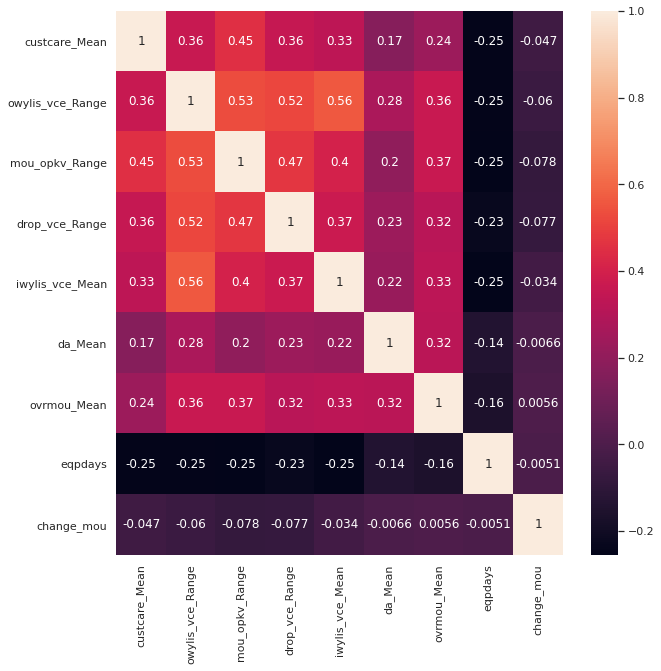

In [144]:
#Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(tl_cr.corr(), annot=True)

In [145]:
from scipy.stats import zscore
tl_f[['custcare_Mean','owylis_vce_Range','mou_opkv_Range','drop_vce_Range','iwylis_vce_Mean','da_Mean','ovrmou_Mean','eqpdays','change_mou']]=tl_f[['custcare_Mean','owylis_vce_Range','mou_opkv_Range','drop_vce_Range','iwylis_vce_Mean','da_Mean','ovrmou_Mean','eqpdays','change_mou']].apply(zscore)
tl_f.head()
tf1=tf.copy()
tf2=tf.copy()

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Text major ticklabel objects>)

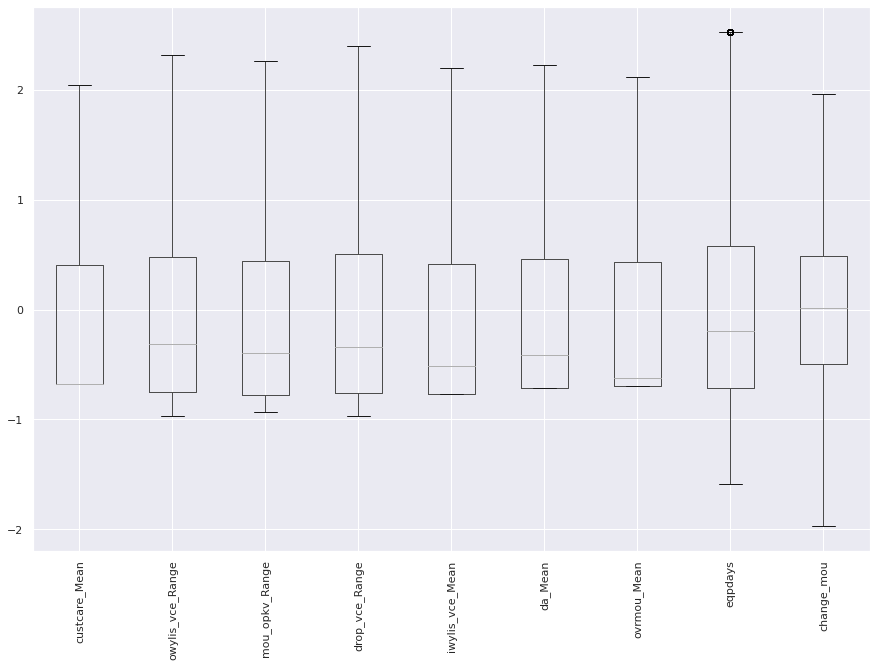

In [146]:
#Box plot after scaling
tl_f[['custcare_Mean','owylis_vce_Range','mou_opkv_Range','drop_vce_Range','iwylis_vce_Mean','da_Mean','ovrmou_Mean','eqpdays','change_mou']].boxplot(figsize=(15,10))
plt.xticks(rotation = 90)

In [147]:
tl_f1=tl_f[['custcare_Mean','owylis_vce_Range','mou_opkv_Range','drop_vce_Range','iwylis_vce_Mean','da_Mean','ovrmou_Mean','eqpdays','change_mou']].copy()

##  Clustering

In [148]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [149]:
#Appending cluster label along with the dataset
df=tl_f1.copy()
df1=tl_f1.copy()

In [150]:
#K Means
k_means = KMeans(n_clusters = 3)

In [151]:
#Performing K Means clustering on scaled data
k_means.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [152]:
#Cluster Label of each data
k_means.labels_

array([2, 2, 1, ..., 1, 2, 0], dtype=int32)

In [153]:
#WSS when n=3
k_means.inertia_

161980.83080072314

In [154]:
wss=[]

In [155]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df)
    wss.append(KM.inertia_)

In [156]:
wss

[238662.0,
 176037.83740369196,
 161981.10190771738,
 149275.16216145555,
 139147.5013007833,
 130699.07991405547,
 123343.62359830613,
 118152.73480390197,
 114083.27074042126,
 110604.39042387957]

In [157]:
wss = list(np.around(np.array(wss),2))
wss

[238662.0,
 176037.84,
 161981.1,
 149275.16,
 139147.5,
 130699.08,
 123343.62,
 118152.73,
 114083.27,
 110604.39]

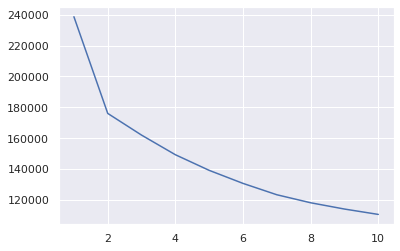

In [158]:
#Elbow curve
plt.plot(range(1,11), wss)

In [159]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df)
labels = k_means.labels_

In [160]:
#Cluster label when n=3
tc1["Clus_kmeans"] = labels
tc1.head(5)

custcare_Mean  owylis_vce_Range  ...  change_mou  Clus_kmeans
0       0.000000              20.0  ...      -11.25            1
1       1.333333              33.0  ...      -78.00            1
2       1.000000               7.0  ...      -67.50            0
3       4.166667               0.0  ...       12.50            0
4       0.333333               4.0  ...      -33.00            0

[5 rows x 10 columns]

In [161]:
#Silhouette score when n=3
# silhouette_score(df,labels)
# # sl_score=round(silhouette_score,2)
# sl_score
# # print('%2f'silhouette_score)
print("{:.3f}".format(silhouette_score(df,labels)))

0.198


In [162]:
#Silhouette width when n=3
sil_width = silhouette_samples(df,labels)

In [163]:
#Appending Sil width with the dataset
tc1["sil_width"] = sil_width
tc1.head(5).T

0           1           2           3           4
custcare_Mean       0.000000    1.333333    1.000000    4.166667    0.333333
owylis_vce_Range   20.000000   33.000000    7.000000    0.000000    4.000000
mou_opkv_Range     28.440000   72.460000   93.600000    4.700000   36.600000
drop_vce_Range      8.000000    5.000000    1.000000    2.000000    1.000000
iwylis_vce_Mean    10.333333   16.333333    0.000000    0.000000    0.000000
da_Mean             0.000000    0.247500    0.495000    0.000000    0.000000
ovrmou_Mean         5.500000   25.000000   13.500000   23.250000    0.000000
eqpdays           403.000000  404.000000  213.000000  757.000000  972.000000
change_mou        -11.250000  -78.000000  -67.500000   12.500000  -33.000000
Clus_kmeans         1.000000    1.000000    0.000000    0.000000    0.000000
sil_width          -0.200192    0.025692    0.331269    0.234694    0.428503

In [164]:
tc1["Clus_kmeans"] = labels
tc1.head()

custcare_Mean  owylis_vce_Range  ...  Clus_kmeans  sil_width
0       0.000000              20.0  ...            1  -0.200192
1       1.333333              33.0  ...            1   0.025692
2       1.000000               7.0  ...            0   0.331269
3       4.166667               0.0  ...            0   0.234694
4       0.333333               4.0  ...            0   0.428503

[5 rows x 11 columns]

In [165]:
#Cluster profile when n=3
clust_profile=tc1
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=tc1.Clus_kmeans.value_counts().sort_index()
# clust_profile.T
clust_profile = np.round(clust_profile, decimals=2)
clust_profile.T

Clus_kmeans              0        1        2
custcare_Mean         0.23     1.39     2.56
owylis_vce_Range      4.82    15.13    33.18
mou_opkv_Range       34.17   111.99   233.20
drop_vce_Range        1.90     5.48    10.22
iwylis_vce_Mean       1.54     7.54    15.36
da_Mean               0.26     0.80     1.14
ovrmou_Mean           8.34    30.52    63.83
eqpdays             474.32   292.99   244.50
change_mou            1.09     1.65   -43.61
sil_width             0.41    -0.04     0.08
freq              12796.00  8954.00  4768.00

In [166]:
#K Means when n=2 since there is inflection at n=2
k_means = KMeans(n_clusters = 2)
k_means.fit(df)
labels = k_means.labels_

In [167]:
#Cluster Label of each data
k_means.labels_

array([1, 0, 1, ..., 1, 0, 0], dtype=int32)

In [168]:
#Appending cluster label with the dataset
tc2["Clus_kmeans"] = labels
tc2.head(5)

custcare_Mean  owylis_vce_Range  ...  change_mou  Clus_kmeans
0       0.000000              20.0  ...      -11.25            1
1       1.333333              33.0  ...      -78.00            0
2       1.000000               7.0  ...      -67.50            1
3       4.166667               0.0  ...       12.50            1
4       0.333333               4.0  ...      -33.00            1

[5 rows x 10 columns]

In [169]:
#Silhouette score when n=3
silhouette_score(df,labels)

0.30849136930020826

In [170]:
#Silhouette width when n=3
sil_width = silhouette_samples(df,labels)

In [171]:
#Appending Sil width with the dataset
tc2["sil_width"] = sil_width
tc2.head(5).T

0           1           2           3           4
custcare_Mean       0.000000    1.333333    1.000000    4.166667    0.333333
owylis_vce_Range   20.000000   33.000000    7.000000    0.000000    4.000000
mou_opkv_Range     28.440000   72.460000   93.600000    4.700000   36.600000
drop_vce_Range      8.000000    5.000000    1.000000    2.000000    1.000000
iwylis_vce_Mean    10.333333   16.333333    0.000000    0.000000    0.000000
da_Mean             0.000000    0.247500    0.495000    0.000000    0.000000
ovrmou_Mean         5.500000   25.000000   13.500000   23.250000    0.000000
eqpdays           403.000000  404.000000  213.000000  757.000000  972.000000
change_mou        -11.250000  -78.000000  -67.500000   12.500000  -33.000000
Clus_kmeans         1.000000    0.000000    1.000000    1.000000    1.000000
sil_width           0.359356   -0.105587    0.485376    0.347228    0.480514

In [172]:
tc2["Clus_kmeans"] = labels
tc2.head()

custcare_Mean  owylis_vce_Range  ...  Clus_kmeans  sil_width
0       0.000000              20.0  ...            1   0.359356
1       1.333333              33.0  ...            0  -0.105587
2       1.000000               7.0  ...            1   0.485376
3       4.166667               0.0  ...            1   0.347228
4       0.333333               4.0  ...            1   0.480514

[5 rows x 11 columns]

In [173]:
#Cluster profile when n=3
clust_profile=tc2
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=tc2.Clus_kmeans.value_counts().sort_index()


In [174]:
clust_profile.T

Clus_kmeans                 0             1
custcare_Mean        2.180091      0.456528
owylis_vce_Range    26.340073      6.746418
mou_opkv_Range     189.138510     48.494616
drop_vce_Range       8.499278      2.605069
iwylis_vce_Mean     12.723142      2.620673
da_Mean              1.019358      0.384327
ovrmou_Mean         51.792287     12.457327
eqpdays            261.144984    428.608266
change_mou         -21.666444      0.902614
sil_width            0.056973      0.437733
freq              9001.000000  17517.000000

Though the silhouette width of second cluster is negative, we opt for 3 clusters instead of 2 since the latter does not give proper segregation among the data.

Final set of variables: 'Change_mou', 'custcare_Mean', 'owylis_vce_Range', 'mou_opkv_Range', 'drop_vce_Range', 
    'iwylis_vce_Mean', 'da_Mean', 'ovrmou_Mean', 'eqpdays','income', 'crclscod', 'asl_flag', 'area', 'refurb_new', 'hnd_webcap',
       'marital', 'ethnic', 'age1', 'age2', 'models', 'hnd_price', 'actvsubs','uniqsubs','car_buy' 

# Project Notes 2

In [175]:
tm1=tl[['change_mou','custcare_Mean','owylis_vce_Range','mou_opkv_Range','drop_vce_Range','iwylis_vce_Mean','da_Mean','ovrmou_Mean','eqpdays','income','crclscod','asl_flag','area','refurb_new','hnd_webcap','marital','ethnic','age_1','age_2','models','hp','actvsubs','uniqsubs','car_buy','churn']]

## Model Building

## Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

In [177]:
from imblearn.over_sampling import SMOTE
# from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [178]:
tl_f['age_1'] = tl_f['age_1'].astype('int')
tl_f['age_2'] = tl_f['age_2'].astype('int')
tl_f['hp'] = tl_f['hp'].astype('int')

In [179]:
# Copy all the predictor variables into X dataframe
A = tl_f.drop('churn', axis=1)

# Copy target into the y dataframe. 
B = tl_f['churn']

In [180]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.30 , random_state=20)


In [181]:
# Fit the Logistic Regression model
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(A_train, B_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
Btrain_predict = model.predict(A_train)
Btest_predict = model.predict(A_test)

In [183]:
Btest_predict_prob=model.predict_proba(A_test)
pd.DataFrame(Btest_predict_prob).head()

0         1
0  0.827237  0.172763
1  0.699508  0.300492
2  0.720701  0.279299
3  0.759766  0.240234
4  0.467330  0.532670

In [184]:
# Accuracy - Training Data
model.score(A_train, B_train)

0.760963258269583

AUC: 0.614


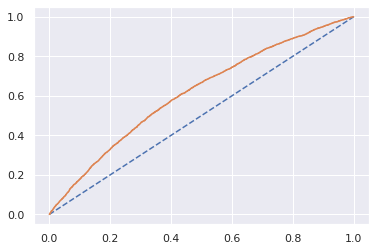

In [185]:
# predict probabilities
probs = model.predict_proba(A_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(B_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(B_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.614


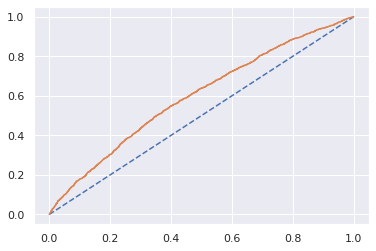

In [186]:
# predict probabilities
probs = model.predict_proba(A_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(B_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(B_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [187]:
confusion_matrix(B_train, Btrain_predict)

array([[14115,    20],
       [ 4417,    10]])

In [188]:
print(classification_report(B_train, Btrain_predict))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     14135
           1       0.33      0.00      0.00      4427

    accuracy                           0.76     18562
   macro avg       0.55      0.50      0.43     18562
weighted avg       0.66      0.76      0.66     18562



In [189]:
cnf_matrix=confusion_matrix(B_test, Btest_predict)
cnf_matrix

array([[6012,    7],
       [1932,    5]])

In [190]:
#Test Data Accuracy
test_acc=model.score(A_test,B_test)
test_acc

0.7562845651080945

In [191]:
print(classification_report(B_test, Btest_predict))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6019
           1       0.42      0.00      0.01      1937

    accuracy                           0.76      7956
   macro avg       0.59      0.50      0.43      7956
weighted avg       0.67      0.76      0.65      7956



## Lift and Gain chart without smote

In [192]:
#Grid Search for finding out the optimal values for the hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ['newton-cg','lbfgs'],
    'max_iter': [10000,12000],
    'penalty': ['none'],
    'verbose': [True],
    'random_state': [0,5,10]
 }

lgr= LogisticRegression(random_state=0)

grid_search = GridSearchCV(estimator = lgr, param_grid = param_grid, cv = 3, scoring='recall',n_jobs = -1)

In [193]:
grid_search.fit(A_train, B_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_iter': [10000, 12000], 'penalty': ['none'],
                         'random_state': [0, 5, 10],
                         'solver': ['newton-cg', 'lbfgs'], 'verbose': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [194]:
grid_search.best_params_

{'max_iter': 10000,
 'penalty': 'none',
 'random_state': 0,
 'solver': 'newton-cg',
 'verbose': True}

In [195]:
best_grid = grid_search.best_estimator_

## Cumulative gain chart

In [196]:
pip install scikit-plot

In [197]:
import scikitplot as skplt

In [198]:
predicted_probabilities = model.predict_proba(A_test)

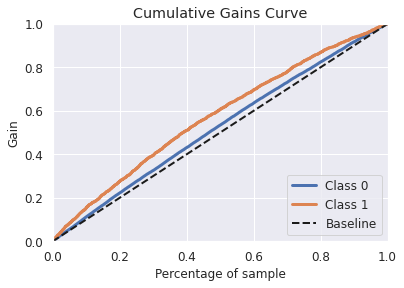

In [199]:
skplt.metrics.plot_cumulative_gain(B_test, predicted_probabilities)

## Lift chart

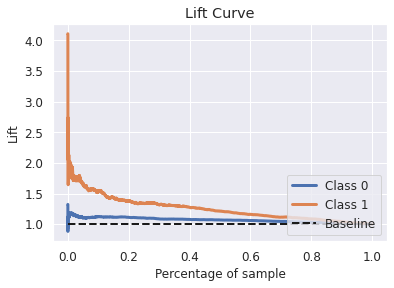

In [200]:
skplt.metrics.plot_lift_curve(B_test, predicted_probabilities)

## SMOTE

In [201]:
# Copy all the predictor variables into X dataframe
X = tl_f.drop('churn', axis=1)

# Copy target into the y dataframe. 
y = tl_f['churn']

In [202]:
sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_sample(X, y.ravel())

In [203]:
X.head()

custcare_Mean  owylis_vce_Range  mou_opkv_Range  ...  actvsubs  uniqsubs  car_buy
0      -0.681023          0.477315       -0.655093  ...         2         2        1
1       0.190779          1.417066       -0.229724  ...         1         1        0
2      -0.027172         -0.462436       -0.025446  ...         1         1        0
3       2.043357         -0.968456       -0.884495  ...         1         1        0
4      -0.463073         -0.679302       -0.576242  ...         1         1        1

[5 rows x 24 columns]

In [204]:
X_res.shape

(40308, 24)

In [205]:
y_res.shape

(40308,)

In [206]:
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, counts of label '1': 20154
After OverSampling, counts of label '0': 20154


In [207]:
X_res

array([[-0.68102303,  0.47731483, -0.65509319, ...,  2.        ,
         2.        ,  1.        ],
       [ 0.1907785 ,  1.41706588, -0.22972399, ...,  1.        ,
         1.        ,  0.        ],
       [-0.02717188, -0.46243622, -0.02544628, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.68102303, -0.54862343, -0.49989343, ...,  1.19226649,
         1.19226649,  1.        ],
       [ 0.67797417,  1.57985634,  2.26651776, ...,  1.        ,
         1.        ,  1.        ],
       [-0.60290782, -0.27979396, -0.88469233, ...,  1.        ,
         1.        ,  0.64159177]])

In [208]:
X=pd.DataFrame(X_res,columns=[['custcare_Mean', 'owylis_vce_Range', 'mou_opkv_Range', 'drop_vce_Range','iwylis_vce_Mean', 'da_Mean', 'ovrmou_Mean', 'eqpdays', 'change_mou','income', 'crclscod', 'asl_flag', 'area', 'refurb_new', 'hnd_webcap','marital', 'ethnic', 'age1', 'age2', 'models', 'hnd_price', 'actvsubs','uniqsubs', 'car_buy']])

In [209]:
y=pd.DataFrame(y_res,columns=['churn'])

In [210]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=20)

## Logistic Regression

In [211]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000, verbose=True,n_jobs=2,random_state=10)
model.fit(X_train, y_train)
model

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='l2', random_state=10,
                   solver='newton-cg', tol=0.0001, verbose=True,
                   warm_start=False)

In [212]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [213]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.447941  0.552059
1  0.420831  0.579169
2  0.414681  0.585319
3  0.540644  0.459356
4  0.539307  0.460693

#### Train data

In [214]:
# Accuracy - Training Data
train_acc=model.score(X_train, y_train)
train_acc

0.5923090554669502

In [215]:
confusion_matrix(y_train, ytrain_predict)

array([[8066, 5992],
       [5511, 8646]])

In [216]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58     14058
           1       0.59      0.61      0.60     14157

    accuracy                           0.59     28215
   macro avg       0.59      0.59      0.59     28215
weighted avg       0.59      0.59      0.59     28215



AUC: 0.622


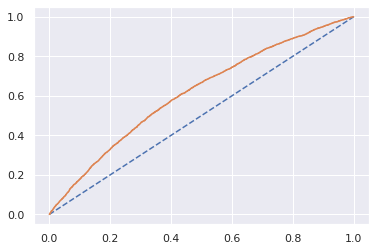

In [217]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
lgb_train_fpr, lgb_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [218]:
logb_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(logb_metrics).transpose()
logb_train_precision=round(df.loc["1"][0],2)
logb_train_recall=round(df.loc["1"][1],2)
logb_train_f1=round(df.loc["1"][2],2)
logb_train_acc=round(df.loc["accuracy"][2],2)
logb_train_auc = roc_auc_score(y_train, probs)

In [219]:
Basic_Tr=pd.DataFrame({'Recall':logb_train_recall,'Precision': logb_train_precision, 'F1-score': logb_train_f1, 'Accuracy': round(logb_train_acc,2), 'AUC': round(logb_train_auc,3)}, index=['Logistic_Regression'])
Basic_Tr

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.61       0.59       0.6      0.59  0.622

#### Test data

In [220]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[3427, 2669],
       [2304, 3693]])

In [221]:
#Test Data Accuracy
test_acc=model.score(X_test,y_test)
test_acc

0.5887703630199289

In [222]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      6096
           1       0.58      0.62      0.60      5997

    accuracy                           0.59     12093
   macro avg       0.59      0.59      0.59     12093
weighted avg       0.59      0.59      0.59     12093



AUC: 0.617


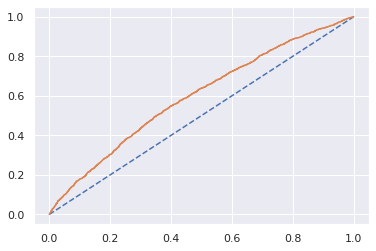

In [223]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
lgb_test_fpr, lgb_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [224]:
logb_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(logb_metrics).transpose()
logb_test_precision=round(df.loc["1"][0],2)
logb_test_recall=round(df.loc["1"][1],2)
logb_test_f1=round(df.loc["1"][2],2)
logb_test_acc=round(df.loc["accuracy"][2],2)
logb_test_auc = roc_auc_score(y_test, probs)


In [225]:
Basic_T=pd.DataFrame({'Recall':logb_test_recall,'Precision': logb_test_precision, 'F1-score': logb_test_f1, 'Accuracy': round(logb_test_acc,2), 'AUC': round(logb_test_auc,3)}, index=['Logistic_Regression'])
Basic_T

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.62       0.58       0.6      0.59  0.617

In [226]:
# for idx, col_name in enumerate(X_train.columns):
# print (pd.DataFrame(model.coef_[0], columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))
imp_feature = pd.DataFrame(model.coef_[0], columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)
imp_feature=np.round(imp_feature,2)
print(imp_feature)

                   Imp
eqpdays           0.20
refurb_new        0.17
uniqsubs          0.16
ovrmou_Mean       0.12
drop_vce_Range    0.08
hnd_webcap        0.05
owylis_vce_Range  0.04
marital           0.03
income            0.02
area              0.01
crclscod          0.00
ethnic           -0.01
age2             -0.04
car_buy          -0.04
hnd_price        -0.08
da_Mean          -0.08
mou_opkv_Range   -0.09
change_mou       -0.09
custcare_Mean    -0.09
models           -0.10
age1             -0.11
iwylis_vce_Mean  -0.11
actvsubs         -0.16
asl_flag         -0.28


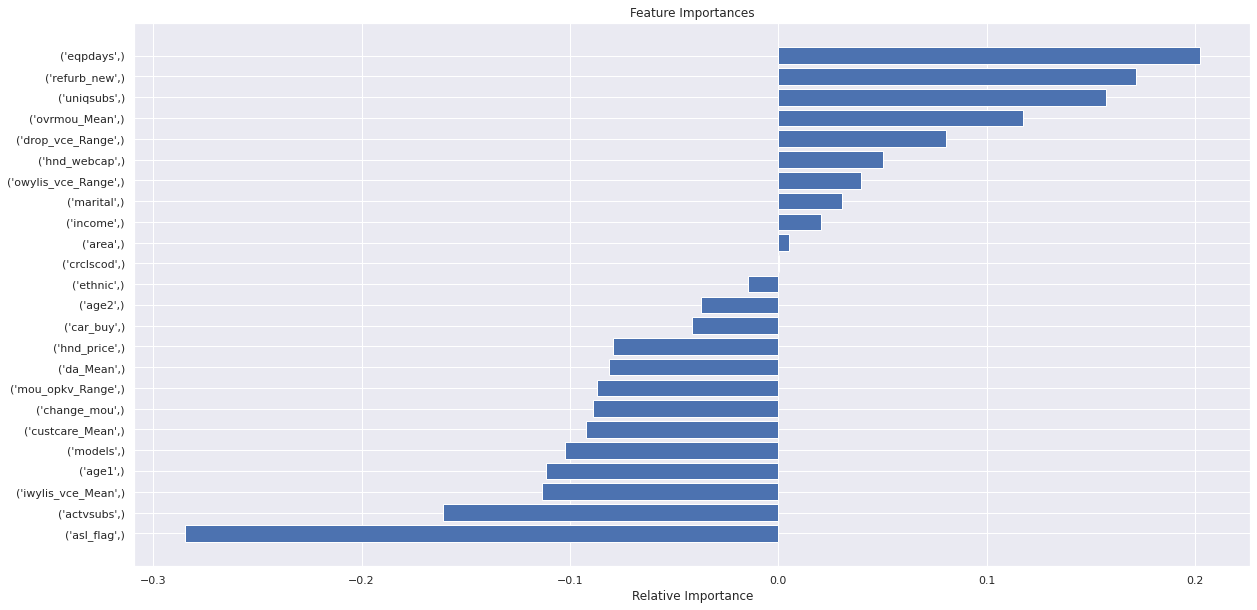

In [227]:
features=X_train.columns 
importances =model.coef_[0]
indices = np.argsort(importances)
plt.subplots(figsize = (20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Tuning Logistic Regression

In [228]:
#Grid Search for finding out the optimal values for the hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ['newton-cg','lbfgs'],
    'max_iter': [7000,8000,10000],
    'penalty': ['none'],
    'verbose': [True],
    'random_state': [0,5,10]
 }
# solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=10
lgr= LogisticRegression(random_state=0)

grid_search = GridSearchCV(estimator = lgr, param_grid = param_grid, cv = 3, scoring='recall',n_jobs = -1)

In [229]:
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_iter': [7000, 8000, 10000], 'penalty': ['none'],
                         'random_state': [0, 5, 10],
                         'solver': ['newton-cg', 'lbfgs'], 'verbose': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [230]:
grid_search.best_params_

{'max_iter': 7000,
 'penalty': 'none',
 'random_state': 0,
 'solver': 'newton-cg',
 'verbose': True}

In [231]:
best_grid = grid_search.best_estimator_

In [232]:
best_grid

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=7000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=True,
                   warm_start=False)

In [233]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [234]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.447947  0.552053
1  0.420884  0.579116
2  0.414725  0.585275
3  0.540681  0.459319
4  0.539420  0.460580

#### Train Data

In [235]:
confusion_matrix(y_train,ytrain_predict)

array([[8067, 5991],
       [5510, 8647]])

In [236]:
#Accuracy for train dataset RF
lgm_train_acc=best_grid.score(X_train,y_train) 
lgm_train_acc

0.5923799397483608

In [237]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58     14058
           1       0.59      0.61      0.60     14157

    accuracy                           0.59     28215
   macro avg       0.59      0.59      0.59     28215
weighted avg       0.59      0.59      0.59     28215



AUC: 0.622


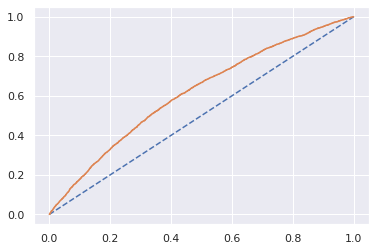

In [238]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lgm_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lgm_train_auc)
# calculate roc curve
lgm_train_fpr, lgm_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [239]:
# for idx, col_name in enumerate(X_train.columns):
# print (pd.DataFrame(best_grid.coef_[0], columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))
imp_feature = pd.DataFrame(best_grid.coef_[0], columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)
imp_feature=np.round(imp_feature,2)
print(imp_feature)


                   Imp
eqpdays           0.20
refurb_new        0.17
uniqsubs          0.16
ovrmou_Mean       0.12
drop_vce_Range    0.08
hnd_webcap        0.05
owylis_vce_Range  0.04
marital           0.03
income            0.02
area              0.01
crclscod          0.00
ethnic           -0.01
age2             -0.04
car_buy          -0.04
hnd_price        -0.08
da_Mean          -0.08
mou_opkv_Range   -0.09
change_mou       -0.09
custcare_Mean    -0.09
models           -0.10
age1             -0.11
iwylis_vce_Mean  -0.11
actvsubs         -0.16
asl_flag         -0.29


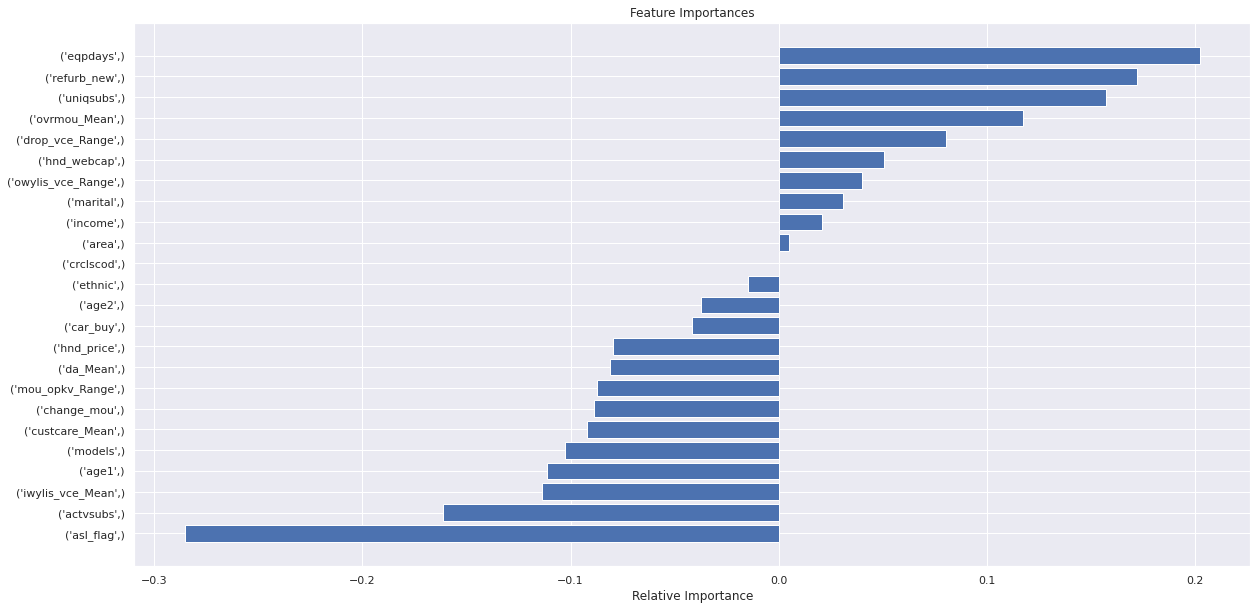

In [240]:
features=X_train.columns 
importances =best_grid.coef_[0]
indices = np.argsort(importances)
plt.subplots(figsize = (20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [241]:
logm_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(logm_metrics).transpose()
logm_train_precision=round(df.loc["1"][0],2)
logm_train_recall=round(df.loc["1"][1],2)
logm_train_f1=round(df.loc["1"][2],2)
logm_train_acc=round(df.loc["accuracy"][2],2)
logm_train_auc = roc_auc_score(y_train, probs)


In [242]:
Tuned_Tr=pd.DataFrame({'Recall':logm_train_recall,'Precision': logm_train_precision, 'F1-score': logm_train_f1, 'Accuracy': round(logm_train_acc,2), 'AUC': round(logm_train_auc,3)}, index=['Logistic_Regression'])

#### Test Data

In [243]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[3428, 2668],
       [2304, 3693]])

In [244]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      6096
           1       0.58      0.62      0.60      5997

    accuracy                           0.59     12093
   macro avg       0.59      0.59      0.59     12093
weighted avg       0.59      0.59      0.59     12093



AUC: 0.617


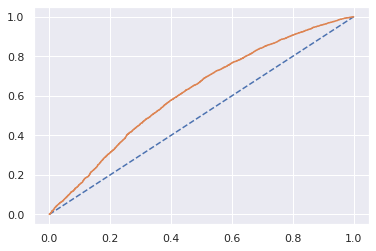

In [245]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [246]:
logm_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(logm_metrics).transpose()
logm_test_precision=round(df.loc["1"][0],2)
logm_test_recall=round(df.loc["1"][1],2)
logm_test_f1=round(df.loc["1"][2],2)
logm_test_acc=round(df.loc["accuracy"][2],2)
logm_test_auc = roc_auc_score(y_test, probs)


In [247]:
Tuned_T=pd.DataFrame({'Recall':logm_test_recall,'Precision': logm_test_precision, 'F1-score': logm_test_f1, 'Accuracy': round(logm_test_acc,2), 'AUC': round(logm_test_auc,3)}, index=['Logistic Regression'])

## Bagging Classifier

In [248]:
from sklearn.ensemble import BaggingClassifier
Bagging_model=BaggingClassifier(base_estimator=model,random_state=1,oob_score=True)
Bagging_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=10000,
                                                    multi_class='auto',
                                                    n_jobs=2, penalty='l2',
                                                    random_state=10,
                                                    solver='newton-cg',
                                                    tol=0.0001, verbose=True,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=Non

In [249]:
best_grid

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=7000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=True,
                   warm_start=False)

In [250]:
print("The OOB Score of Bagging classifier", round(Bagging_model.oob_score_*100,3),"%")

The OOB Score of Bagging classifier 59.071 %


In [251]:
y_train_predict = Bagging_model.predict(X_train)
y_test_predict = Bagging_model.predict(X_test)

#### Train data

In [252]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score = Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.5918483076377813
[[8045 6013]
 [5503 8654]]
              precision    recall  f1-score   support

           0       0.59      0.57      0.58     14058
           1       0.59      0.61      0.60     14157

    accuracy                           0.59     28215
   macro avg       0.59      0.59      0.59     28215
weighted avg       0.59      0.59      0.59     28215



AUC: 0.622


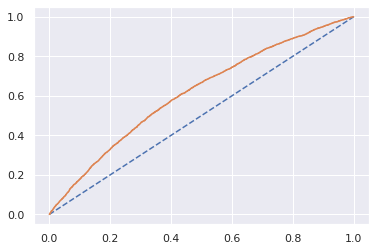

In [253]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
bgglm_train_fpr, bgglm_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [254]:
bgg_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(bgg_metrics).transpose()
bgg_train_precision=round(df.loc["1"][0],2)
bgg_train_recall=round(df.loc["1"][1],2)
bgg_train_f1=round(df.loc["1"][2],2)
bgg_train_acc=round(df.loc["accuracy"][2],2)
bgg_train_auc = roc_auc_score(y_train, probs)


In [255]:
Tuned_Tr_1=pd.DataFrame({'Recall':bgg_train_recall,'Precision': bgg_train_precision, 'F1-score': bgg_train_f1, 'Accuracy': round(bgg_train_acc,2), 'AUC': round(bgg_train_auc,3)}, index=['Bagging Classifier'])

In [256]:
Tuned_Tr=pd.concat([Tuned_Tr,Tuned_Tr_1])
Tuned_Tr

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.61       0.59       0.6      0.59  0.622
Bagging Classifier     0.61       0.59       0.6      0.59  0.622

#### Test data

AUC: 0.617


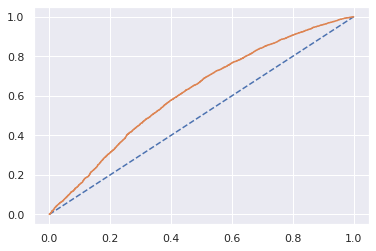

In [257]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
bgglm_test_fpr, bgglm_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [258]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.5886049780864964
[[3429 2667]
 [2308 3689]]
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      6096
           1       0.58      0.62      0.60      5997

    accuracy                           0.59     12093
   macro avg       0.59      0.59      0.59     12093
weighted avg       0.59      0.59      0.59     12093



In [259]:
bgg_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(bgg_metrics).transpose()
bgg_test_precision=round(df.loc["1"][0],2)
bgg_test_recall=round(df.loc["1"][1],2)
bgg_test_f1=round(df.loc["1"][2],2)
bgg_test_acc=round(df.loc["accuracy"][2],2)
bgg_test_auc = roc_auc_score(y_test, probs)



In [260]:
Tuned_T_1=pd.DataFrame({'Recall':bgg_test_recall,'Precision': bgg_test_precision, 'F1-score': bgg_test_f1, 'Accuracy': round(bgg_test_acc,2), 'AUC': round(bgg_test_auc,3)}, index=['Bagging Classifier'])

In [261]:
Tuned_T=pd.concat([Tuned_T,Tuned_T_1])
Tuned_T

Recall  Precision  F1-score  Accuracy    AUC
Logistic Regression    0.62       0.58       0.6      0.59  0.617
Bagging Classifier     0.62       0.58       0.6      0.59  0.617

## Fixing threshold cut-off - Logistic Regression

In [262]:
pred_proba_df = pd.DataFrame(model.predict_proba(X_test))
threshold_list = [0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda a: 1 if a>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                                           Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1))
    print('Test data accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                           Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1)))
    print(classification_report(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                           Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1)))




******** For i = 0.25 ******
Test data accuracy is 0.5021086579012652
[[ 103 5993]
 [  28 5969]]
              precision    recall  f1-score   support

           0       0.79      0.02      0.03      6096
           1       0.50      1.00      0.66      5997

    accuracy                           0.50     12093
   macro avg       0.64      0.51      0.35     12093
weighted avg       0.64      0.50      0.35     12093


******** For i = 0.3 ******
Test data accuracy is 0.513189448441247
[[ 312 5784]
 [ 103 5894]]
              precision    recall  f1-score   support

           0       0.75      0.05      0.10      6096
           1       0.50      0.98      0.67      5997

    accuracy                           0.51     12093
   macro avg       0.63      0.52      0.38     12093
weighted avg       0.63      0.51      0.38     12093


******** For i = 0.35 ******
Test data accuracy is 0.5311337137186802
[[ 710 5386]
 [ 284 5713]]
              precision    recall  f1-score   support


In [263]:
pred_tr_proba_df = pd.DataFrame(model.predict_proba(X_train))
threshold_list = [0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_train_pred = pred_tr_proba_df.applymap(lambda a: 1 if a>i else 0)
    train_accuracy = metrics.accuracy_score(y_train.to_numpy().reshape(y_train.to_numpy().size,1),
                                           Y_train_pred.iloc[:,1].to_numpy().reshape(Y_train_pred.iloc[:,1].to_numpy().size,1))
    print('Train data accuracy is {}'.format(train_accuracy))

    print(confusion_matrix(y_train.to_numpy().reshape(y_train.to_numpy().size,1),
                           Y_train_pred.iloc[:,1].to_numpy().reshape(Y_train_pred.iloc[:,1].to_numpy().size,1)))
    print(classification_report(y_train.to_numpy().reshape(y_train.to_numpy().size,1),
                           Y_train_pred.iloc[:,1].to_numpy().reshape(Y_train_pred.iloc[:,1].to_numpy().size,1)))




******** For i = 0.25 ******
Train data accuracy is 0.5069998227892965
[[  212 13846]
 [   64 14093]]
              precision    recall  f1-score   support

           0       0.77      0.02      0.03     14058
           1       0.50      1.00      0.67     14157

    accuracy                           0.51     28215
   macro avg       0.64      0.51      0.35     28215
weighted avg       0.64      0.51      0.35     28215


******** For i = 0.3 ******
Train data accuracy is 0.5163565479354953
[[  648 13410]
 [  236 13921]]
              precision    recall  f1-score   support

           0       0.73      0.05      0.09     14058
           1       0.51      0.98      0.67     14157

    accuracy                           0.52     28215
   macro avg       0.62      0.51      0.38     28215
weighted avg       0.62      0.52      0.38     28215


******** For i = 0.35 ******
Train data accuracy is 0.5353889774942406
[[ 1633 12425]
 [  684 13473]]
              precision    recall  f1-

In [264]:
pip install scikit-plot

## Cumulative gain chart on test data

In [265]:
import scikitplot as skplt

In [266]:
predicted_probabilities = best_grid.predict_proba(A_test)

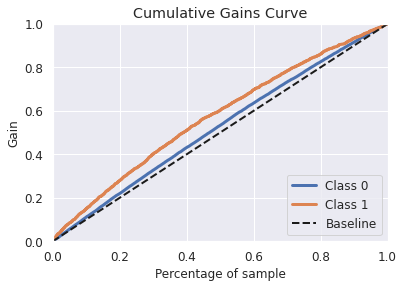

In [267]:
skplt.metrics.plot_cumulative_gain(B_test, predicted_probabilities)

## Lift chart on test data

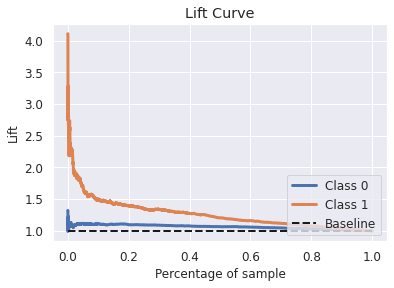

In [268]:
skplt.metrics.plot_lift_curve(B_test, predicted_probabilities)

## Cumulative gain chart on train data

In [269]:
import scikitplot as skplt

In [270]:
predicted_probabilities = best_grid.predict_proba(A_train)

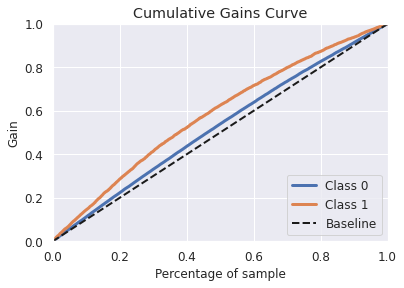

In [271]:
skplt.metrics.plot_cumulative_gain(B_train, predicted_probabilities)

## Lift chart on train data

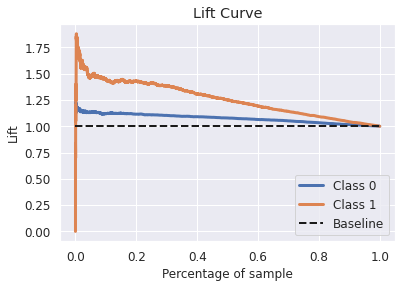

In [272]:
skplt.metrics.plot_lift_curve(B_train, predicted_probabilities)

## Cumulative gain chart on overall sample

In [273]:
import scikitplot as skplt

In [274]:
predicted_probabilities = best_grid.predict_proba(A)

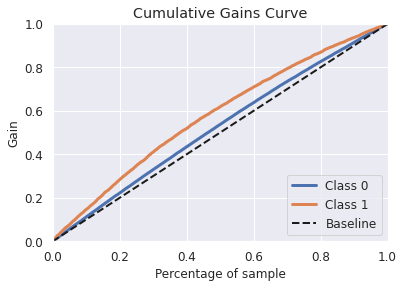

In [275]:
skplt.metrics.plot_cumulative_gain(B, predicted_probabilities)

## Lift chart on overall sample

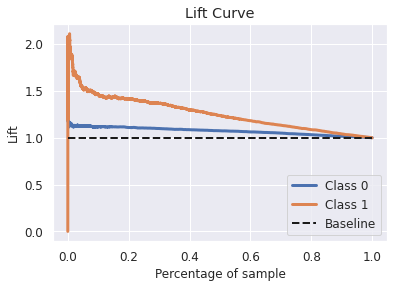

In [276]:
skplt.metrics.plot_lift_curve(B, predicted_probabilities)

In [277]:
# invoke the LogisticRegression function and find the bestfit model on training data

regression_model = LogisticRegression(solver='newton-cg',max_iter=12000,penalty='none',verbose=True,n_jobs=1,random_state=0)
regression_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=12000,
                   multi_class='auto', n_jobs=1, penalty='none', random_state=0,
                   solver='newton-cg', tol=0.0001, verbose=True,
                   warm_start=False)

In [278]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for ('custcare_Mean',) is -0.09229908799518526
The coefficient for ('owylis_vce_Range',) is 0.03974876950882056
The coefficient for ('mou_opkv_Range',) is -0.08719926469453579
The coefficient for ('drop_vce_Range',) is 0.08056647609357154
The coefficient for ('iwylis_vce_Mean',) is -0.11361845594132415
The coefficient for ('da_Mean',) is -0.08116615871517822
The coefficient for ('ovrmou_Mean',) is 0.11751116115858892
The coefficient for ('eqpdays',) is 0.20216859435531515
The coefficient for ('change_mou',) is -0.0887660270674064
The coefficient for ('income',) is 0.02059275387466338
The coefficient for ('crclscod',) is 0.0002728790998310081
The coefficient for ('asl_flag',) is -0.28524632267865446
The coefficient for ('area',) is 0.005012303625362197
The coefficient for ('refurb_new',) is 0.17200795786323858
The coefficient for ('hnd_webcap',) is 0.0503441892736992
The coefficient for ('marital',) is 0.03063284009959867
The coefficient for ('ethnic',) is -0.01479297914

## Decision Trees CART

In [279]:
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [280]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [281]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Churn_Tree_File = open ('churn_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Churn_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Churn_Tree_File.close()

In [282]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

imp_feature = pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)
imp_feature=np.round(imp_feature,2)
print(imp_feature)

                   Imp
eqpdays           0.10
hnd_price         0.09
uniqsubs          0.08
change_mou        0.06
mou_opkv_Range    0.06
ovrmou_Mean       0.05
models            0.05
refurb_new        0.05
area              0.05
age1              0.04
iwylis_vce_Mean   0.04
owylis_vce_Range  0.04
ethnic            0.04
drop_vce_Range    0.04
da_Mean           0.03
income            0.03
crclscod          0.03
car_buy           0.03
marital           0.02
age2              0.02
hnd_webcap        0.02
custcare_Mean     0.02
actvsubs          0.01
asl_flag          0.01


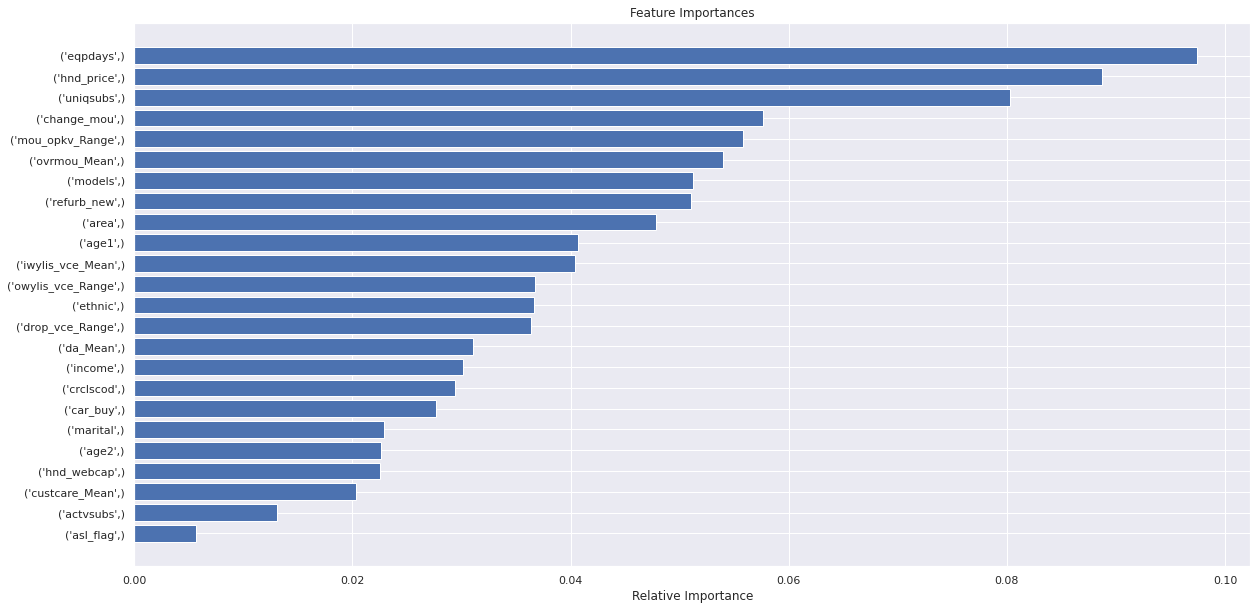

In [283]:
features=X_train.columns 
importances = dt_model.feature_importances_
indices = np.argsort(importances)
plt.subplots(figsize = (20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [284]:
y_predict = dt_model.predict(X_test)

## Regularising the Decision Tree

In [285]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

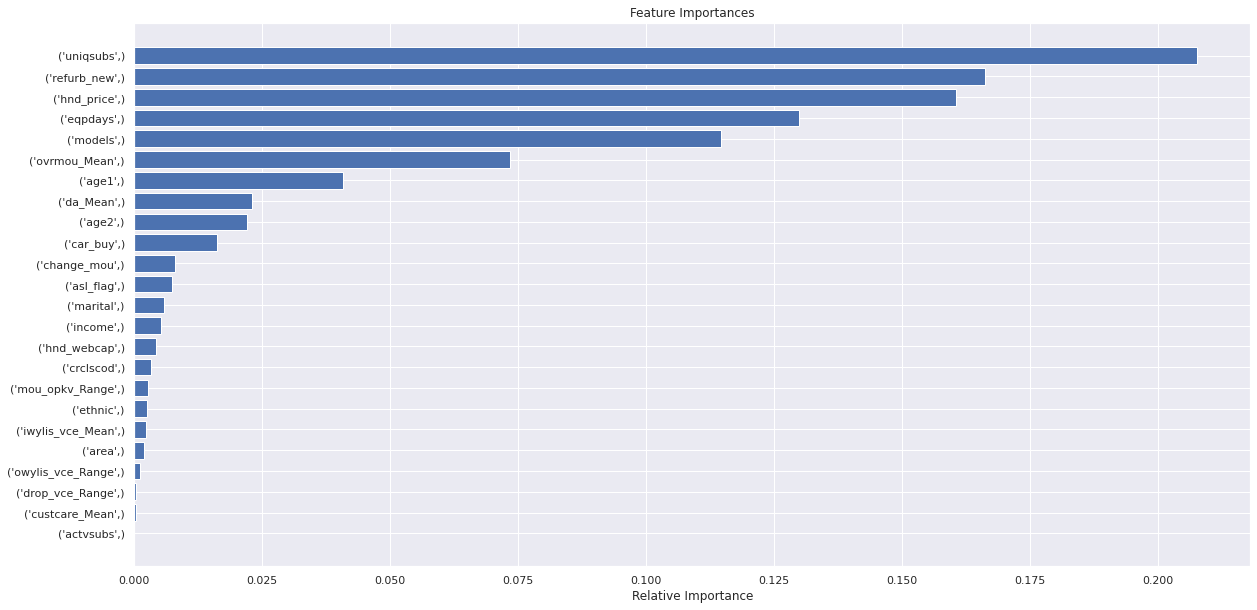

In [286]:
features=X_train.columns 
importances = reg_dt_model.feature_importances_
indices = np.argsort(importances)
plt.subplots(figsize = (20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [287]:
churn_tree_regularized = open('d:\churn_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= churn_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

churn_tree_regularized.close()

# print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))
# print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))
# # for idx, col_name in enumerate(X_train.columns):
# print (pd.DataFrame(best_grid.coef_[0], columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))
imp_feature = pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)
imp_feature=np.round(imp_feature,2)
print(imp_feature)


                   Imp
uniqsubs          0.21
refurb_new        0.17
hnd_price         0.16
eqpdays           0.13
models            0.11
ovrmou_Mean       0.07
age1              0.04
da_Mean           0.02
age2              0.02
car_buy           0.02
change_mou        0.01
asl_flag          0.01
marital           0.01
income            0.01
hnd_webcap        0.00
crclscod          0.00
mou_opkv_Range    0.00
ethnic            0.00
iwylis_vce_Mean   0.00
area              0.00
owylis_vce_Range  0.00
drop_vce_Range    0.00
custcare_Mean     0.00
actvsubs          0.00


#### Train data

In [288]:
## Performance Matrix on train data set
y_train_predict = reg_dt_model.predict(X_train)
model_score = reg_dt_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.724401913875598
[[10829  3229]
 [ 4547  9610]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.74     14058
           1       0.75      0.68      0.71     14157

    accuracy                           0.72     28215
   macro avg       0.73      0.72      0.72     28215
weighted avg       0.73      0.72      0.72     28215



AUC: 0.800


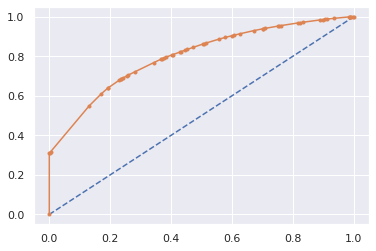

In [289]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
dtb_train_fpr, dtb_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dtb_train_fpr, dtb_train_tpr, marker='.')
# show the plot
plt.show()

In [290]:
dtb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(dtb_metrics).transpose()
dtb_train_precision=round(df.loc["1"][0],2)
dtb_train_recall=round(df.loc["1"][1],2)
dtb_train_f1=round(df.loc["1"][2],2)
dtb_train_acc=round(df.loc["accuracy"][2],2)
dtb_train_auc = roc_auc_score(y_train, probs)



In [291]:
Basic_Tr_1=pd.DataFrame({'Recall':dtb_train_recall,'Precision': dtb_train_precision, 'F1-score': dtb_train_f1, 'Accuracy': round(dtb_train_acc,2), 'AUC': round(dtb_train_auc,3)}, index=['CART'])

In [292]:
Basic_Tr=pd.concat([Basic_Tr, Basic_Tr_1])
Basic_Tr

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.61       0.59      0.60      0.59  0.622
CART                   0.68       0.75      0.71      0.72  0.800

#### Test data

In [293]:
## Performance Matrix on test data set
y_test_predict = reg_dt_model.predict(X_test)
model_score = reg_dt_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7100802116927148
[[4647 1449]
 [2057 3940]]
              precision    recall  f1-score   support

           0       0.69      0.76      0.73      6096
           1       0.73      0.66      0.69      5997

    accuracy                           0.71     12093
   macro avg       0.71      0.71      0.71     12093
weighted avg       0.71      0.71      0.71     12093



AUC: 0.780


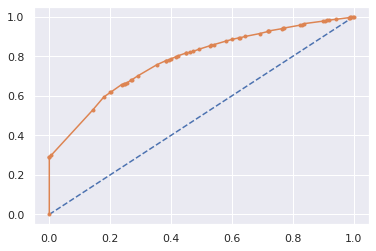

In [294]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
dtb_test_fpr, dtb_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dtb_test_fpr, dtb_test_tpr, marker='.')
# show the plot
plt.show()

In [295]:
dtb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(dtb_metrics).transpose()
dtb_test_precision=round(df.loc["1"][0],2)
dtb_test_recall=round(df.loc["1"][1],2)
dtb_test_f1=round(df.loc["1"][2],2)
dtb_test_acc=round(df.loc["accuracy"][2],2)
dtb_test_auc = roc_auc_score(y_test, probs)



In [296]:
Basic_T_1=pd.DataFrame({'Recall':dtb_test_recall,'Precision': dtb_test_precision, 'F1-score': dtb_test_f1, 'Accuracy': round(dtb_test_acc,2), 'AUC': round(dtb_test_auc,3)}, index=['CART'])

In [297]:
Basic_T=pd.concat([Basic_T, Basic_T_1])
Basic_T


Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.62       0.58      0.60      0.59  0.617
CART                   0.66       0.73      0.69      0.71  0.780

## Model Tuning CART

In [298]:
#Building a Decision Tree Classifier
param_grid = {
    'criterion': ['gini'],
    'max_depth': [7,10,20,30], #50
    'min_samples_leaf': [2,3,5,10], 
    'min_samples_split': [15,20,30]
}

dtcl = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 3, n_jobs=-1, scoring='recall')

In [299]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 15}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [300]:
#Generating Tree
train_char_label = ['no', 'yes']
churn_GS_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= churn_GS_regularized , 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

churn_GS_regularized.close()
dot_data

In [301]:
#Variable Importance
imp_feature = pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)
imp_feature=np.round(imp_feature,2)
print(imp_feature)

                   Imp
hnd_price         0.11
uniqsubs          0.11
eqpdays           0.10
refurb_new        0.07
models            0.06
ovrmou_Mean       0.06
mou_opkv_Range    0.05
age1              0.05
change_mou        0.04
area              0.04
iwylis_vce_Mean   0.04
car_buy           0.03
hnd_webcap        0.03
ethnic            0.03
da_Mean           0.03
drop_vce_Range    0.03
owylis_vce_Range  0.03
income            0.02
age2              0.02
crclscod          0.02
marital           0.02
custcare_Mean     0.01
actvsubs          0.01
asl_flag          0.00


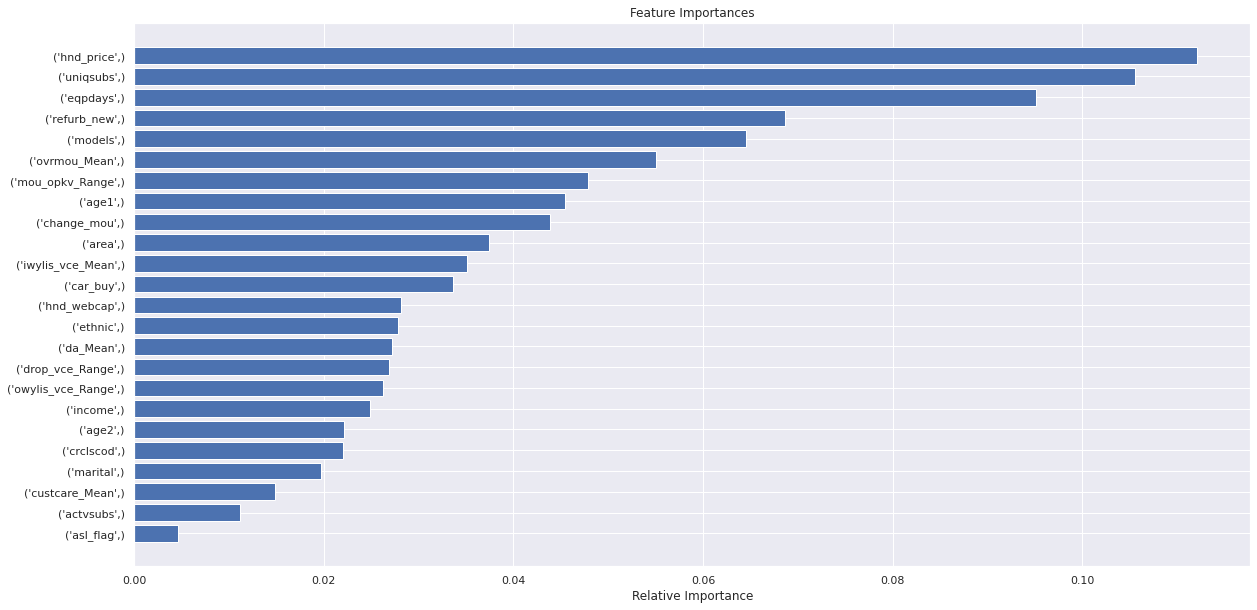

In [302]:
features=X_train.columns 
importances = best_grid.feature_importances_
indices = np.argsort(importances)
plt.subplots(figsize = (20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Train data

In [303]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8967924862661705
[[12925  1133]
 [ 1779 12378]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     14058
           1       0.92      0.87      0.89     14157

    accuracy                           0.90     28215
   macro avg       0.90      0.90      0.90     28215
weighted avg       0.90      0.90      0.90     28215



AUC: 0.972


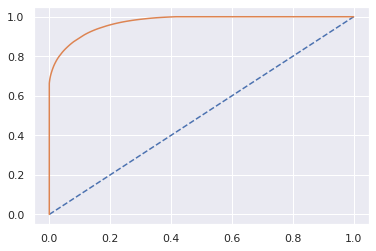

In [304]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
dtm_train_fpr, dtm_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dtm_train_fpr, dtm_train_tpr)

In [305]:
dtm_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(dtm_metrics).transpose()
dtm_train_precision=round(df.loc["1"][0],2)
dtm_train_recall=round(df.loc["1"][1],2)
dtm_train_f1=round(df.loc["1"][2],2)
dtm_train_acc=round(df.loc["accuracy"][2],2)
dtm_train_auc = roc_auc_score(y_train, probs)



In [306]:
Tuned_Tr_2=pd.DataFrame({'Recall':dtm_train_recall,'Precision': dtm_train_precision, 'F1-score': dtm_train_f1, 'Accuracy': round(dtm_train_acc,2), 'AUC': round(dtm_train_auc,3)}, index=['CART'])

In [307]:
Tuned_Tr=pd.concat([Tuned_Tr,Tuned_Tr_2])
Tuned_Tr

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.61       0.59      0.60      0.59  0.622
Bagging Classifier     0.61       0.59      0.60      0.59  0.622
CART                   0.87       0.92      0.89      0.90  0.972

#### Test data

In [308]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7343917969073017
[[4621 1475]
 [1737 4260]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      6096
           1       0.74      0.71      0.73      5997

    accuracy                           0.73     12093
   macro avg       0.73      0.73      0.73     12093
weighted avg       0.73      0.73      0.73     12093



AUC: 0.797


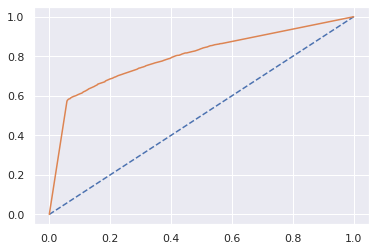

In [309]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
dtm_test_fpr, dtm_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dtm_test_fpr, dtm_test_tpr)

In [310]:
dtm_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(dtm_metrics).transpose()
dtm_test_precision=round(df.loc["1"][0],2)
dtm_test_recall=round(df.loc["1"][1],2)
dtm_test_f1=round(df.loc["1"][2],2)
dtm_test_acc=round(df.loc["accuracy"][2],2)
dtm_test_auc = roc_auc_score(y_test, probs)


In [311]:
Tuned_T_2=pd.DataFrame({'Recall':dtm_test_recall,'Precision': dtm_test_precision, 'F1-score': dtm_test_f1, 'Accuracy': round(dtm_test_acc,2), 'AUC': round(dtm_test_auc,3)}, index=['CART'])

In [312]:
Tuned_T=pd.concat([Tuned_T,Tuned_T_2])
Tuned_T


Recall  Precision  F1-score  Accuracy    AUC
Logistic Regression    0.62       0.58      0.60      0.59  0.617
Bagging Classifier     0.62       0.58      0.60      0.59  0.617
CART                   0.71       0.74      0.73      0.73  0.797

## Random Forest

In [313]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(oob_score=True)

In [314]:
RF_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [315]:
print("The OOB Score of Random Forest  model", round(RF_model.oob_score_*100,3),"%")

The OOB Score of Random Forest  model 83.75 %


In [316]:
ytrain_predict = RF_model.predict(X_train)
ytest_predict = RF_model.predict(X_test)

In [317]:
imp_feature = pd.DataFrame(RF_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)
imp_feature=np.round(imp_feature,2)
print(imp_feature)


                   Imp
eqpdays           0.08
hnd_price         0.07
models            0.06
change_mou        0.06
mou_opkv_Range    0.05
area              0.05
uniqsubs          0.05
owylis_vce_Range  0.05
drop_vce_Range    0.05
da_Mean           0.04
ovrmou_Mean       0.04
age1              0.04
iwylis_vce_Mean   0.04
ethnic            0.04
car_buy           0.03
income            0.03
crclscod          0.03
custcare_Mean     0.03
marital           0.03
actvsubs          0.03
age2              0.03
hnd_webcap        0.02
refurb_new        0.02
asl_flag          0.02


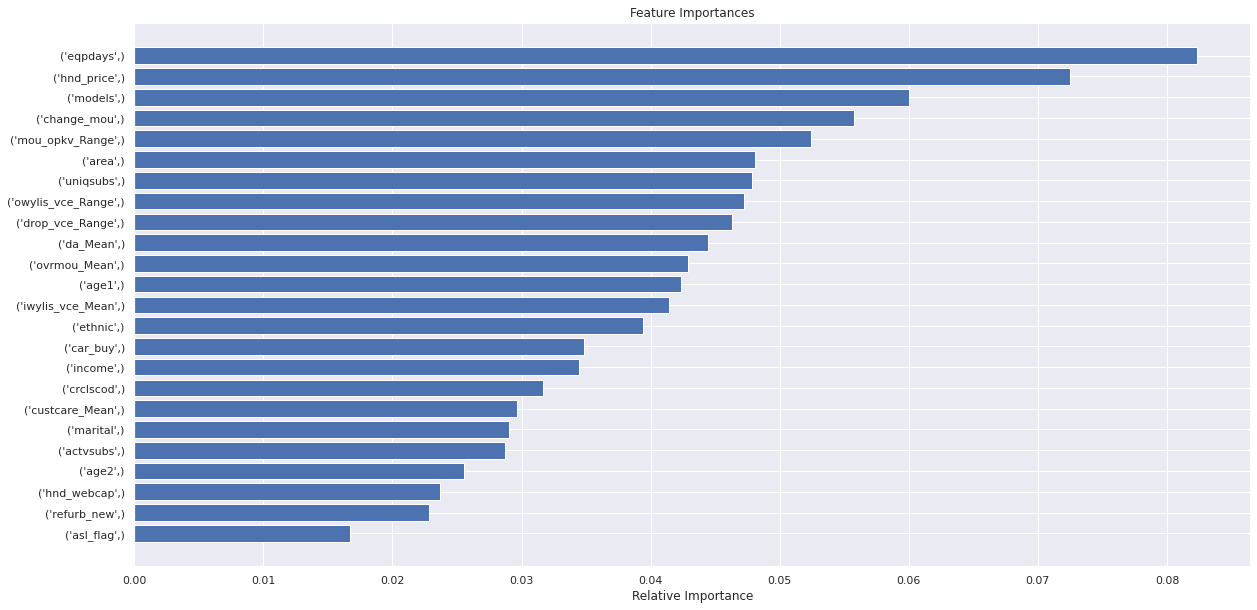

In [318]:
features=X_train.columns 
importances = RF_model.feature_importances_
indices = np.argsort(importances)
plt.subplots(figsize = (20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Train data

In [319]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[14058     0]
 [    0 14157]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14058
           1       1.00      1.00      1.00     14157

    accuracy                           1.00     28215
   macro avg       1.00      1.00      1.00     28215
weighted avg       1.00      1.00      1.00     28215



AUC: 1.000


Text(0.5, 1.0, 'ROC')

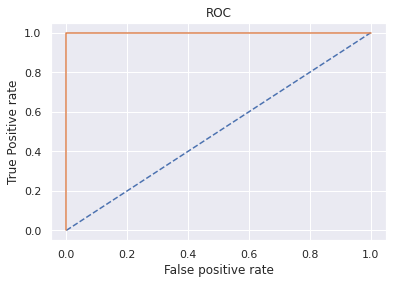

In [320]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RF_model_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % RF_model_train_auc)
# calculate roc curve
rfb_train_fpr, rfb_train_tpr, RF_model_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfb_train_fpr, rfb_train_tpr)
plt.xlabel("False positive rate")
plt.ylabel("True Positive rate")
plt.title('ROC')

In [321]:
rfb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(rfb_metrics).transpose()
rfb_train_precision=round(df.loc["1"][0],2)
rfb_train_recall=round(df.loc["1"][1],2)
rfb_train_f1=round(df.loc["1"][2],2)
rfb_train_acc=round(df.loc["accuracy"][2],2)
rfb_train_auc = roc_auc_score(y_train, probs)


In [322]:
Basic_Tr_2=pd.DataFrame({'Recall':rfb_train_recall,'Precision': rfb_train_precision, 'F1-score': rfb_train_f1, 'Accuracy': round(rfb_train_acc,2), 'AUC': round(rfb_train_auc,3)}, index=['Random Forest'])

In [323]:
Basic_Tr=pd.concat([Basic_Tr, Basic_Tr_2])
Basic_Tr


Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.61       0.59      0.60      0.59  0.622
CART                   0.68       0.75      0.71      0.72  0.800
Random Forest          1.00       1.00      1.00      1.00  1.000

#### Test data

In [324]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8400727693707103
[[5868  228]
 [1706 4291]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      6096
           1       0.95      0.72      0.82      5997

    accuracy                           0.84     12093
   macro avg       0.86      0.84      0.84     12093
weighted avg       0.86      0.84      0.84     12093



AUC: 0.904


Text(0.5, 1.0, 'ROC')

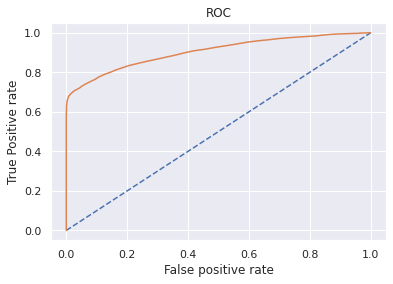

In [325]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RF_model_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % RF_model_test_auc)
# calculate roc curve
rfb_test_fpr, rfb_test_tpr, RF_model_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfb_test_fpr, rfb_test_tpr)
plt.xlabel("False positive rate")
plt.ylabel("True Positive rate")
plt.title('ROC')

In [326]:
rfb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(rfb_metrics).transpose()
rfb_test_precision=round(df.loc["1"][0],2)
rfb_test_recall=round(df.loc["1"][1],2)
rfb_test_f1=round(df.loc["1"][2],2)
rfb_test_acc=round(df.loc["accuracy"][2],2)
rfb_test_auc = roc_auc_score(y_test, probs)


In [327]:
Basic_T_2=pd.DataFrame({'Recall':rfb_test_recall,'Precision': rfb_test_precision, 'F1-score': rfb_test_f1, 'Accuracy': round(rfb_test_acc,2), 'AUC': round(rfb_test_auc,3)}, index=['Random Forest'])

In [328]:
Basic_T=pd.concat([Basic_T, Basic_T_2])
Basic_T


Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.62       0.58      0.60      0.59  0.617
CART                   0.66       0.73      0.69      0.71  0.780
Random Forest          0.72       0.95      0.82      0.84  0.904

## Model Tuning RF

In [329]:
#Grid Search for finding out the optimal values for the hyper parameters
param_grid = {
    'max_depth': [4,6,7,8],
    'max_features': [5,6,7],
    'min_samples_leaf': [2,3,5],
    'min_samples_split': [20,25,30],
    'n_estimators': [100,150],
    'oob_score':[True]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3,n_jobs=-1, scoring='recall')

In [330]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [331]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 20,
 'n_estimators': 100,
 'oob_score': True}

In [332]:
best_grid = grid_search.best_estimator_
bg=best_grid
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [333]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [334]:
print("The OOB Score of tuned Random Forest  model", round(best_grid.oob_score_*100,3),"%")

The OOB Score of tuned Random Forest  model 73.436 %


#### Train data

In [335]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7393939393939394
[[10388  3670]
 [ 3683 10474]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     14058
           1       0.74      0.74      0.74     14157

    accuracy                           0.74     28215
   macro avg       0.74      0.74      0.74     28215
weighted avg       0.74      0.74      0.74     28215



AUC: 0.829


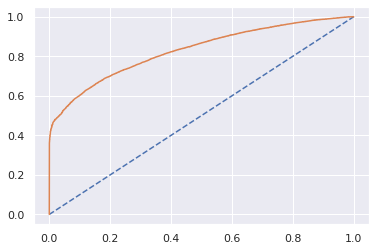

In [336]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
rfm_train_fpr, rfm_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfm_train_fpr, rfm_train_tpr)

In [337]:
rfm_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(rfm_metrics).transpose()
rfm_train_precision=round(df.loc["1"][0],2)
rfm_train_recall=round(df.loc["1"][1],2)
rfm_train_f1=round(df.loc["1"][2],2)
rfm_train_acc=round(df.loc["accuracy"][2],2)
rfm_train_auc = roc_auc_score(y_train, probs)

In [338]:
Tuned_Tr_3=pd.DataFrame({'Recall':rfm_train_recall,'Precision': rfm_train_precision, 'F1-score': rfm_train_f1, 'Accuracy': round(rfm_train_acc,2), 'AUC': round(rfm_train_auc,3)}, index=['Random Forest'])

In [339]:
Tuned_Tr=pd.concat([Tuned_Tr,Tuned_Tr_3])
Tuned_Tr


Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.61       0.59      0.60      0.59  0.622
Bagging Classifier     0.61       0.59      0.60      0.59  0.622
CART                   0.87       0.92      0.89      0.90  0.972
Random Forest          0.74       0.74      0.74      0.74  0.829

In [340]:
# Variable Importance RF
imp_feature = pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)
imp_feature=np.round(imp_feature,2)
print(imp_feature)


                   Imp
models            0.19
hnd_price         0.18
eqpdays           0.16
uniqsubs          0.13
refurb_new        0.07
ovrmou_Mean       0.05
age1              0.04
actvsubs          0.04
car_buy           0.04
hnd_webcap        0.02
asl_flag          0.02
da_Mean           0.02
custcare_Mean     0.01
drop_vce_Range    0.01
age2              0.01
marital           0.00
owylis_vce_Range  0.00
mou_opkv_Range    0.00
iwylis_vce_Mean   0.00
crclscod          0.00
change_mou        0.00
ethnic            0.00
area              0.00
income            0.00


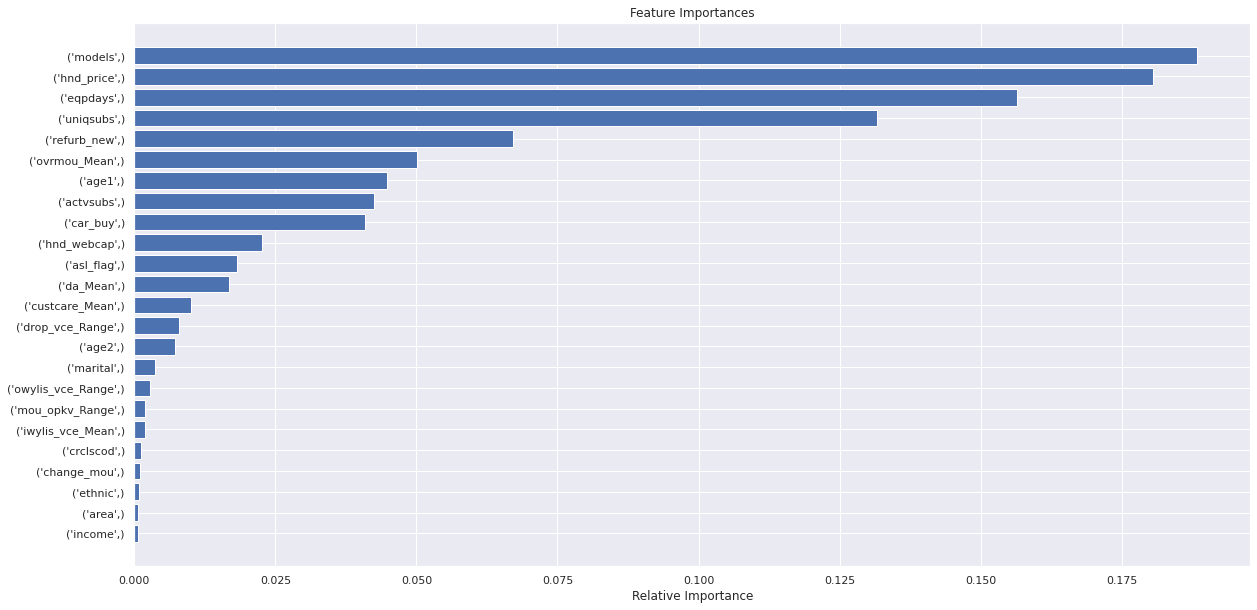

In [341]:
features=X_train.columns 
importances = best_grid.feature_importances_
indices = np.argsort(importances)
plt.subplots(figsize = (20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Test data

In [342]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7332341023732738
[[4477 1619]
 [1607 4390]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      6096
           1       0.73      0.73      0.73      5997

    accuracy                           0.73     12093
   macro avg       0.73      0.73      0.73     12093
weighted avg       0.73      0.73      0.73     12093



AUC: 0.821


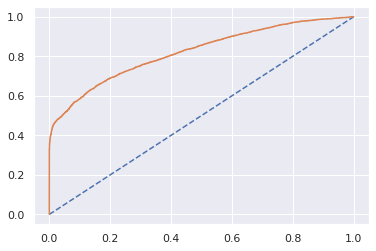

In [343]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
rfm_test_fpr, rfm_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfm_test_fpr, rfm_test_tpr)

In [344]:
rfm_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(rfm_metrics).transpose()
rfm_test_precision=round(df.loc["1"][0],2)
rfm_test_recall=round(df.loc["1"][1],2)
rfm_test_f1=round(df.loc["1"][2],2)
rfm_test_acc=round(df.loc["accuracy"][2],2)
rfm_test_auc = roc_auc_score(y_test, probs)



In [345]:
Tuned_T_3=pd.DataFrame({'Recall':rfm_test_recall,'Precision': rfm_test_precision, 'F1-score': rfm_test_f1, 'Accuracy': round(rfm_test_acc,2), 'AUC': round(rfm_test_auc,3)}, index=['Random Forest'])

In [346]:
Tuned_T=pd.concat([Tuned_T,Tuned_T_3])
Tuned_T

Recall  Precision  F1-score  Accuracy    AUC
Logistic Regression    0.62       0.58      0.60      0.59  0.617
Bagging Classifier     0.62       0.58      0.60      0.59  0.617
CART                   0.71       0.74      0.73      0.73  0.797
Random Forest          0.73       0.73      0.73      0.73  0.821

#### SHAP Analysis

In [347]:
import shap

In [348]:
explainer=shap.TreeExplainer(best_grid)

In [349]:
shap_values=explainer.shap_values(A)

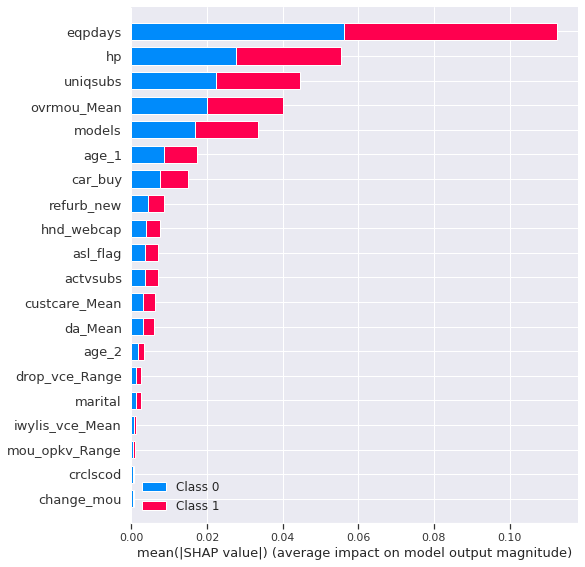

In [350]:
shap.summary_plot(shap_values,A_train )

## Cumulative gain chart

In [351]:
import scikitplot as skplt

In [352]:
predicted_probabilities = best_grid.predict_proba(A_test)

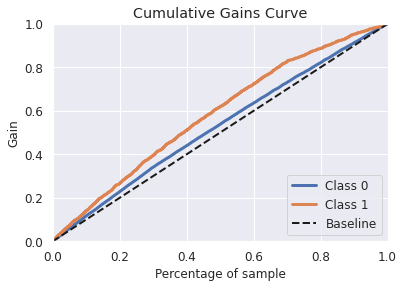

In [353]:
skplt.metrics.plot_cumulative_gain(B_test, predicted_probabilities)

## Lift chart

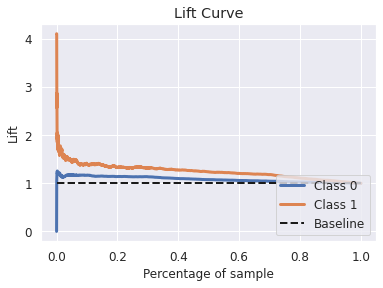

In [354]:
skplt.metrics.plot_lift_curve(B_test, predicted_probabilities)

## Cumulative gain chart

In [355]:
import scikitplot as skplt

In [356]:
predicted_probabilities = best_grid.predict_proba(A)

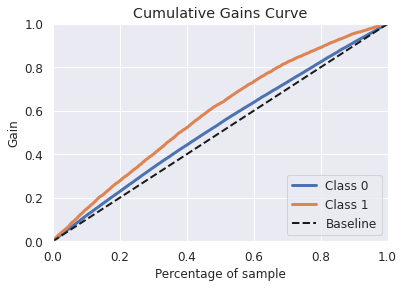

In [357]:
skplt.metrics.plot_cumulative_gain(B, predicted_probabilities)

## Lift chart

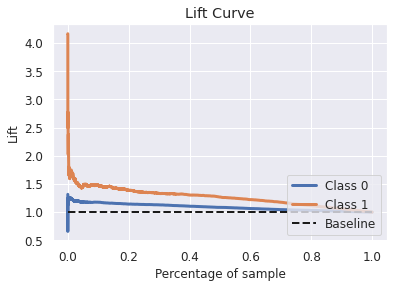

In [358]:
skplt.metrics.plot_lift_curve(B, predicted_probabilities)

## LDA

In [359]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train,y_train)
model1

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [360]:
ytrain_predict = model1.predict(X_train)
ytest_predict = model1.predict(X_test)

#### Train data

In [361]:
# Accuracy - Training Data
clf.score(X_train, y_train)

0.5925925925925926

In [362]:
confusion_matrix(y_train, ytrain_predict)

array([[8056, 6002],
       [5493, 8664]])

In [363]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58     14058
           1       0.59      0.61      0.60     14157

    accuracy                           0.59     28215
   macro avg       0.59      0.59      0.59     28215
weighted avg       0.59      0.59      0.59     28215



AUC: 0.622


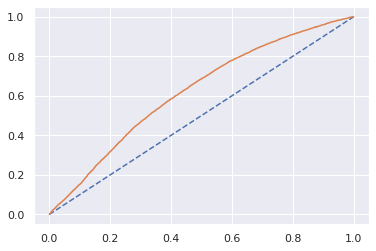

In [364]:
# predict probabilities
probs = model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
ldab_train_fpr, ldab_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ldab_train_fpr, ldab_train_tpr)

In [365]:
ldab_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(ldab_metrics).transpose()
ldab_train_precision=round(df.loc["1"][0],2)
ldab_train_recall=round(df.loc["1"][1],2)
ldab_train_f1=round(df.loc["1"][2],2)
ldab_train_acc=round(df.loc["accuracy"][2],2)
ldab_train_auc = roc_auc_score(y_train, probs)


In [366]:
Basic_Tr_3=pd.DataFrame({'Recall':ldab_train_recall,'Precision': ldab_train_precision, 'F1-score': ldab_train_f1, 'Accuracy': round(ldab_train_acc,2), 'AUC': round(ldab_train_auc,3)}, index=['LDA'])

In [367]:
Basic_Tr=pd.concat([Basic_Tr, Basic_Tr_3])
Basic_Tr


Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.61       0.59      0.60      0.59  0.622
CART                   0.68       0.75      0.71      0.72  0.800
Random Forest          1.00       1.00      1.00      1.00  1.000
LDA                    0.61       0.59      0.60      0.59  0.622

#### Test data

In [368]:
# Accuracy - Test Data
model1.score(X_test, y_test)

0.5887703630199289

In [369]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[3424, 2672],
       [2301, 3696]])

In [370]:
#Test Data Accuracy
test_acc=model1.score(X_test,y_test)
test_acc

0.5887703630199289

In [371]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      6096
           1       0.58      0.62      0.60      5997

    accuracy                           0.59     12093
   macro avg       0.59      0.59      0.59     12093
weighted avg       0.59      0.59      0.59     12093



AUC: 0.617


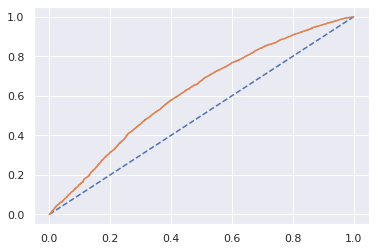

In [372]:
# predict probabilities
probs = model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
ldab_test_fpr, ldab_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ldab_test_fpr, ldab_test_tpr)

In [373]:
ldab_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(ldab_metrics).transpose()
ldab_test_precision=round(df.loc["1"][0],2)
ldab_test_recall=round(df.loc["1"][1],2)
ldab_test_f1=round(df.loc["1"][2],2)
ldab_test_acc=round(df.loc["accuracy"][2],2)
ldab_test_auc = roc_auc_score(y_test, probs)


In [374]:
Basic_T_3=pd.DataFrame({'Recall':ldab_test_recall,'Precision': ldab_test_precision, 'F1-score': ldab_test_f1, 'Accuracy': round(ldab_test_acc,2), 'AUC': round(ldab_test_auc,3)}, index=['LDA'])
Basic_T=pd.concat([Basic_T, Basic_T_3])
Basic_T


Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.62       0.58      0.60      0.59  0.617
CART                   0.66       0.73      0.69      0.71  0.780
Random Forest          0.72       0.95      0.82      0.84  0.904
LDA                    0.62       0.58      0.60      0.59  0.617

## Model Tuning LDA

In [375]:
#Grid Search for finding out the optimal values for the hyper parameters

param_grid = {
    'solver': ['svd','lsqr','eigen'],
    'tol': [0.0001,0.001],
    'shrinkage': [None],
     }

lda= LinearDiscriminantAnalysis()

grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, scoring='recall',cv = 5)

In [376]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'shrinkage': [None],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [377]:
grid_search.best_params_

{'shrinkage': None, 'solver': 'svd', 'tol': 0.0001}

In [378]:
best_grid = grid_search.best_estimator_
best_grid

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [379]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

#### Train data

In [380]:
confusion_matrix(y_train,ytrain_predict)

array([[8056, 6002],
       [5493, 8664]])

In [381]:
#Accuracy for train dataset RF
rf_train_acc=best_grid.score(X_train,y_train) 
rf_train_acc

0.5925925925925926

In [382]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58     14058
           1       0.59      0.61      0.60     14157

    accuracy                           0.59     28215
   macro avg       0.59      0.59      0.59     28215
weighted avg       0.59      0.59      0.59     28215



AUC: 0.622


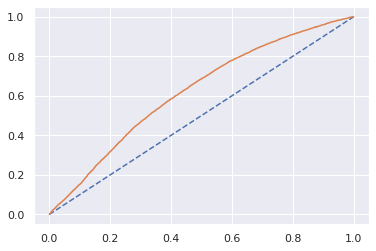

In [383]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
ldam_train_fpr, ldam_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ldam_train_fpr, ldam_train_tpr)

In [384]:
logm_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(logm_metrics).transpose()
logm_train_precision=round(df.loc["1"][0],2)
logm_train_recall=round(df.loc["1"][1],2)
logm_train_f1=round(df.loc["1"][2],2)
logm_train_acc=round(df.loc["accuracy"][2],2)
logm_train_auc = roc_auc_score(y_train, probs)


In [385]:
Tuned_Tr_4=pd.DataFrame({'Recall':logm_train_recall,'Precision': logm_train_precision, 'F1-score': logm_train_f1, 'Accuracy': round(logm_train_acc,2), 'AUC': round(logm_train_auc,3)}, index=['LDA'])

In [386]:
Tuned_Tr=pd.concat([Tuned_Tr,Tuned_Tr_4])
Tuned_Tr

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.61       0.59      0.60      0.59  0.622
Bagging Classifier     0.61       0.59      0.60      0.59  0.622
CART                   0.87       0.92      0.89      0.90  0.972
Random Forest          0.74       0.74      0.74      0.74  0.829
LDA                    0.61       0.59      0.60      0.59  0.622

#### Test data

In [387]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[3424, 2672],
       [2301, 3696]])

In [388]:
#Test Data Accuracy
test_acc=best_grid.score(X_test,y_test)
test_acc

0.5887703630199289

In [389]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      6096
           1       0.58      0.62      0.60      5997

    accuracy                           0.59     12093
   macro avg       0.59      0.59      0.59     12093
weighted avg       0.59      0.59      0.59     12093



AUC: 0.617


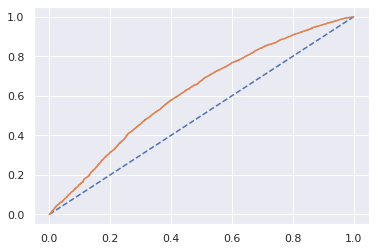

In [390]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
ldam_test_fpr, ldam_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ldam_test_fpr, ldam_test_tpr)

In [391]:
logm_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(logm_metrics).transpose()
logm_test_precision=round(df.loc["1"][0],2)
logm_test_recall=round(df.loc["1"][1],2)
logm_test_f1=round(df.loc["1"][2],2)
logm_test_acc=round(df.loc["accuracy"][2],2)
logm_test_auc = roc_auc_score(y_test, probs)


In [392]:
Tuned_T_4=pd.DataFrame({'Recall':logm_test_recall,'Precision': logm_test_precision, 'F1-score': logm_test_f1, 'Accuracy': round(logm_test_acc,2), 'AUC': round(logm_test_auc,3)}, index=['LDA'])

In [393]:
Tuned_T=pd.concat([Tuned_T,Tuned_T_4])
Tuned_T

Recall  Precision  F1-score  Accuracy    AUC
Logistic Regression    0.62       0.58      0.60      0.59  0.617
Bagging Classifier     0.62       0.58      0.60      0.59  0.617
CART                   0.71       0.74      0.73      0.73  0.797
Random Forest          0.73       0.73      0.73      0.73  0.821
LDA                    0.62       0.58      0.60      0.59  0.617

## Cumulative gain chart

In [394]:
import scikitplot as skplt

In [395]:
predicted_probabilities = best_grid.predict_proba(A_test)

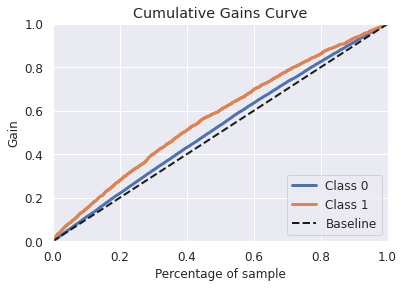

In [396]:
skplt.metrics.plot_cumulative_gain(B_test, predicted_probabilities)

## Lift chart

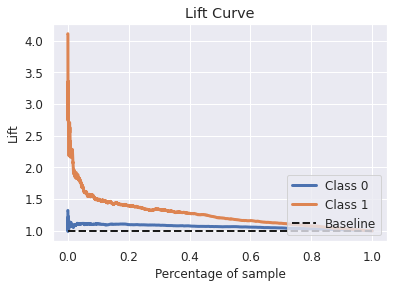

In [397]:
skplt.metrics.plot_lift_curve(B_test, predicted_probabilities)

## KNN

In [398]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=2)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

#### Train data

In [399]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9811093390040758
[[14058     0]
 [  533 13624]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14058
           1       1.00      0.96      0.98     14157

    accuracy                           0.98     28215
   macro avg       0.98      0.98      0.98     28215
weighted avg       0.98      0.98      0.98     28215



AUC: 0.993


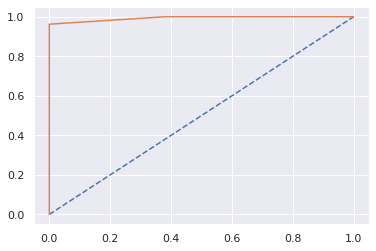

In [400]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
knnb_train_fpr, knnb_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knnb_train_fpr, knnb_train_tpr)

In [401]:
knnb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(knnb_metrics).transpose()
knnb_train_precision=round(df.loc["1"][0],2)
knnb_train_recall=round(df.loc["1"][1],2)
knnb_train_f1=round(df.loc["1"][2],2)
knnb_train_acc=round(df.loc["accuracy"][2],2)
knnb_train_auc = roc_auc_score(y_train, probs)



In [402]:
Basic_Tr_4=pd.DataFrame({'Recall':knnb_train_recall,'Precision': knnb_train_precision, 'F1-score': knnb_train_f1, 'Accuracy': round(knnb_train_acc,2), 'AUC': round(knnb_train_auc,3)}, index=['KNN'])

Basic_Tr=pd.concat([Basic_Tr, Basic_Tr_4])
Basic_Tr


Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.61       0.59      0.60      0.59  0.622
CART                   0.68       0.75      0.71      0.72  0.800
Random Forest          1.00       1.00      1.00      1.00  1.000
LDA                    0.61       0.59      0.60      0.59  0.622
KNN                    0.96       1.00      0.98      0.98  0.993

#### Test data

In [403]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7979823038121228
[[4451 1645]
 [ 798 5199]]
              precision    recall  f1-score   support

           0       0.85      0.73      0.78      6096
           1       0.76      0.87      0.81      5997

    accuracy                           0.80     12093
   macro avg       0.80      0.80      0.80     12093
weighted avg       0.80      0.80      0.80     12093



AUC: 0.816


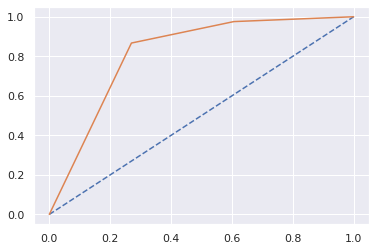

In [404]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
knnb_test_fpr, knnb_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knnb_test_fpr, knnb_test_tpr)

In [405]:
knnb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(knnb_metrics).transpose()
knnb_test_precision=round(df.loc["1"][0],2)
knnb_test_recall=round(df.loc["1"][1],2)
knnb_test_f1=round(df.loc["1"][2],2)
knnb_test_acc=round(df.loc["accuracy"][2],2)
knnb_test_auc = roc_auc_score(y_test, probs)



In [406]:
Basic_T_4=pd.DataFrame({'Recall':knnb_test_recall,'Precision': knnb_test_precision, 'F1-score': knnb_test_f1, 'Accuracy': round(knnb_test_acc,2), 'AUC': round(knnb_test_auc,3)}, index=['KNN'])
Basic_T=pd.concat([Basic_T, Basic_T_4])
Basic_T

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.62       0.58      0.60      0.59  0.617
CART                   0.66       0.73      0.69      0.71  0.780
Random Forest          0.72       0.95      0.82      0.84  0.904
LDA                    0.62       0.58      0.60      0.59  0.617
KNN                    0.87       0.76      0.81      0.80  0.816

## Model Tuning KNN

In [407]:
#Grid Search for finding out the optimal values for the hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [2,3,4],
#     'weights ': ['uniform','distance'],
    'leaf_size': [1,2,5],
    'n_jobs': [1,2],
    'p': [1,2]
}

knn= KNeighborsClassifier()

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, scoring='recall',n_jobs = -1,cv = 3)

In [408]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 5], 'n_jobs': [1, 2],
                         'n_neighbors': [2, 3, 4], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [409]:
grid_search.best_params_

{'leaf_size': 1, 'n_jobs': 1, 'n_neighbors': 3, 'p': 2}

In [410]:
best_grid = grid_search.best_estimator_
best_grid

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                     weights='uniform')

#### Train data

In [411]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8562112351586035
[[10284  3774]
 [  283 13874]]
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     14058
           1       0.79      0.98      0.87     14157

    accuracy                           0.86     28215
   macro avg       0.88      0.86      0.85     28215
weighted avg       0.88      0.86      0.85     28215



AUC: 0.977


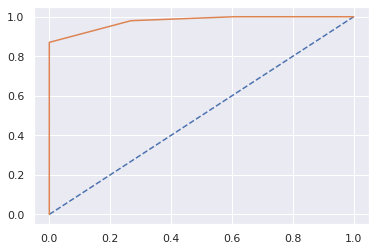

In [412]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
knnm_train_fpr, knnm_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knnm_train_fpr, knnm_train_tpr)

In [413]:
knnm_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(knnm_metrics).transpose()
knnm_train_precision=round(df.loc["1"][0],2)
knnm_train_recall=round(df.loc["1"][1],2)
knnm_train_f1=round(df.loc["1"][2],2)
knnm_train_acc=round(df.loc["accuracy"][2],2)
knnm_train_auc = roc_auc_score(y_train, probs)


In [414]:
Tuned_Tr_5=pd.DataFrame({'Recall':knnm_train_recall,'Precision': knnm_train_precision, 'F1-score': knnm_train_f1, 'Accuracy': round(knnm_train_acc,2), 'AUC': round(knnm_train_auc,3)}, index=['KNN'])

In [415]:
Tuned_Tr=pd.concat([Tuned_Tr,Tuned_Tr_5])
Tuned_Tr

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.61       0.59      0.60      0.59  0.622
Bagging Classifier     0.61       0.59      0.60      0.59  0.622
CART                   0.87       0.92      0.89      0.90  0.972
Random Forest          0.74       0.74      0.74      0.74  0.829
LDA                    0.61       0.59      0.60      0.59  0.622
KNN                    0.98       0.79      0.87      0.86  0.977

#### Test data

In [416]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7212436946994129
[[3170 2926]
 [ 445 5552]]
              precision    recall  f1-score   support

           0       0.88      0.52      0.65      6096
           1       0.65      0.93      0.77      5997

    accuracy                           0.72     12093
   macro avg       0.77      0.72      0.71     12093
weighted avg       0.77      0.72      0.71     12093



AUC: 0.816


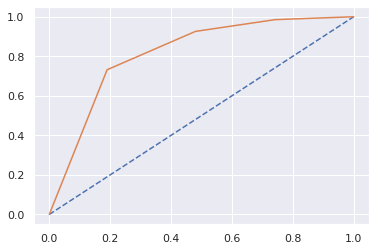

In [417]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
knnm_test_fpr, knnm_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knnm_test_fpr, knnm_test_tpr)

In [418]:
knnm_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(knnm_metrics).transpose()
knnm_test_precision=round(df.loc["1"][0],2)
knnm_test_recall=round(df.loc["1"][1],2)
knnm_test_f1=round(df.loc["1"][2],2)
knnm_test_acc=round(df.loc["accuracy"][2],2)
knnm_test_auc = roc_auc_score(y_test, probs)



In [419]:
Tuned_T_5=pd.DataFrame({'Recall':knnm_test_recall,'Precision': knnm_test_precision, 'F1-score': knnm_test_f1, 'Accuracy': round(knnm_test_acc,2), 'AUC': round(knnm_test_auc,3)}, index=['KNN'])

In [420]:
Tuned_T=pd.concat([Tuned_T,Tuned_T_5])
Tuned_T

Recall  Precision  F1-score  Accuracy    AUC
Logistic Regression    0.62       0.58      0.60      0.59  0.617
Bagging Classifier     0.62       0.58      0.60      0.59  0.617
CART                   0.71       0.74      0.73      0.73  0.797
Random Forest          0.73       0.73      0.73      0.73  0.821
LDA                    0.62       0.58      0.60      0.59  0.617
KNN                    0.93       0.65      0.77      0.72  0.816

## Cumulative gain chart

In [421]:
import scikitplot as skplt

In [422]:
predicted_probabilities = best_grid.predict_proba(A_test)

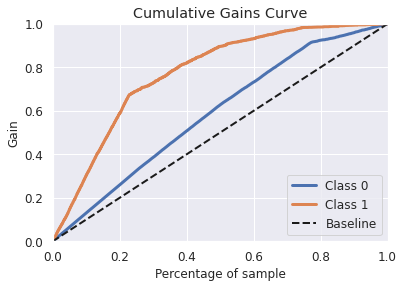

In [423]:
skplt.metrics.plot_cumulative_gain(B_test, predicted_probabilities)

## Lift chart

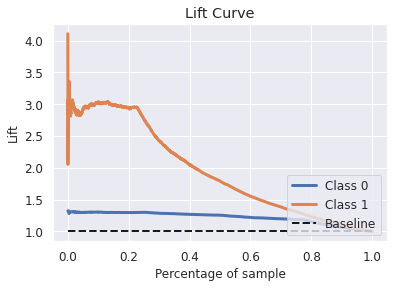

In [424]:
skplt.metrics.plot_lift_curve(B_test, predicted_probabilities)

## Naive Bayes

In [425]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [426]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Train data

In [427]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.5823498139287613
[[6724 7334]
 [4450 9707]]
              precision    recall  f1-score   support

           0       0.60      0.48      0.53     14058
           1       0.57      0.69      0.62     14157

    accuracy                           0.58     28215
   macro avg       0.59      0.58      0.58     28215
weighted avg       0.59      0.58      0.58     28215



AUC: 0.622


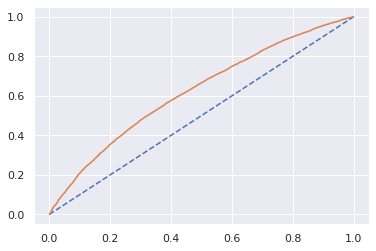

In [428]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
nbb_train_fpr, nbb_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nbb_train_fpr, nbb_train_tpr)

In [429]:
nbb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(nbb_metrics).transpose()
nbb_train_precision=round(df.loc["1"][0],2)
nbb_train_recall=round(df.loc["1"][1],2)
nbb_train_f1=round(df.loc["1"][2],2)
nbb_train_acc=round(df.loc["accuracy"][2],2)
nbb_train_auc = roc_auc_score(y_train, probs)


In [430]:
Basic_Tr_5=pd.DataFrame({'Recall':nbb_train_recall,'Precision': nbb_train_precision, 'F1-score': nbb_train_f1, 'Accuracy': round(nbb_train_acc,2), 'AUC': round(nbb_train_auc,3)}, index=['Naive Bayes'])

Basic_Tr=pd.concat([Basic_Tr, Basic_Tr_5])
Basic_Tr


Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.61       0.59      0.60      0.59  0.622
CART                   0.68       0.75      0.71      0.72  0.800
Random Forest          1.00       1.00      1.00      1.00  1.000
LDA                    0.61       0.59      0.60      0.59  0.622
KNN                    0.96       1.00      0.98      0.98  0.993
Naive Bayes            0.69       0.57      0.62      0.58  0.622

#### Test data

In [431]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.5690895559414537
[[2803 3293]
 [1918 4079]]
              precision    recall  f1-score   support

           0       0.59      0.46      0.52      6096
           1       0.55      0.68      0.61      5997

    accuracy                           0.57     12093
   macro avg       0.57      0.57      0.56     12093
weighted avg       0.57      0.57      0.56     12093



AUC: 0.605


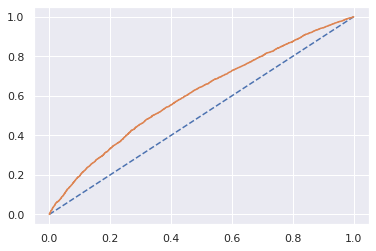

In [432]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
nbb_test_fpr, nbb_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nbb_test_fpr, nbb_test_tpr)

In [433]:
nbb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(nbb_metrics).transpose()
nbb_test_precision=round(df.loc["1"][0],2)
nbb_test_recall=round(df.loc["1"][1],2)
nbb_test_f1=round(df.loc["1"][2],2)
nbb_test_acc=round(df.loc["accuracy"][2],2)
nbb_test_auc = roc_auc_score(y_test, probs)

In [434]:
Basic_T_5=pd.DataFrame({'Recall':nbb_test_recall,'Precision': nbb_test_precision, 'F1-score': nbb_test_f1, 'Accuracy': round(nbb_test_acc,2), 'AUC': round(nbb_test_auc,3)}, index=['Naive Bayes'])
Basic_T=pd.concat([Basic_T, Basic_T_5])
Basic_T

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.62       0.58      0.60      0.59  0.617
CART                   0.66       0.73      0.69      0.71  0.780
Random Forest          0.72       0.95      0.82      0.84  0.904
LDA                    0.62       0.58      0.60      0.59  0.617
KNN                    0.87       0.76      0.81      0.80  0.816
Naive Bayes            0.68       0.55      0.61      0.57  0.605

## Model Tuning Naive Bayes

In [435]:
#Grid Search for finding out the optimal values for the hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'var_smoothing': [1e-1,1e-8,1e-5]
 }
# solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=10
nb= GaussianNB()

grid_search = GridSearchCV(estimator = nb, param_grid = param_grid, scoring='recall',cv = 3)

In [436]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [0.1, 1e-08, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [437]:
grid_search.best_params_

{'var_smoothing': 0.1}

In [438]:
best_grid = grid_search.best_estimator_
best_grid

GaussianNB(priors=None, var_smoothing=0.1)

#### Train data

In [439]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.5252879673932306
[[ 1987 12071]
 [ 1323 12834]]
              precision    recall  f1-score   support

           0       0.60      0.14      0.23     14058
           1       0.52      0.91      0.66     14157

    accuracy                           0.53     28215
   macro avg       0.56      0.52      0.44     28215
weighted avg       0.56      0.53      0.44     28215



AUC: 0.591


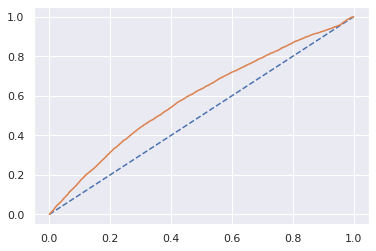

In [440]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
nbm_train_fpr, nbm_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nbm_train_fpr, nbm_train_tpr)

In [441]:
nbm_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(nbm_metrics).transpose()
nbm_train_precision=round(df.loc["1"][0],2)
nbm_train_recall=round(df.loc["1"][1],2)
nbm_train_f1=round(df.loc["1"][2],2)
nbm_train_acc=round(df.loc["accuracy"][2],2)
nbm_train_auc = roc_auc_score(y_train, probs)


In [442]:
Tuned_Tr_6=pd.DataFrame({'Recall':nbm_train_recall,'Precision': nbm_train_precision, 'F1-score': nbm_train_f1, 'Accuracy': round(nbm_train_acc,2), 'AUC': round(nbm_train_auc,3)}, index=['Naive Bayes'])

In [443]:
Tuned_Tr=pd.concat([Tuned_Tr,Tuned_Tr_6])
Tuned_Tr

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression    0.61       0.59      0.60      0.59  0.622
Bagging Classifier     0.61       0.59      0.60      0.59  0.622
CART                   0.87       0.92      0.89      0.90  0.972
Random Forest          0.74       0.74      0.74      0.74  0.829
LDA                    0.61       0.59      0.60      0.59  0.622
KNN                    0.98       0.79      0.87      0.86  0.977
Naive Bayes            0.91       0.52      0.66      0.53  0.591

#### Test data

In [444]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.5188952286446705
[[ 851 5245]
 [ 573 5424]]
              precision    recall  f1-score   support

           0       0.60      0.14      0.23      6096
           1       0.51      0.90      0.65      5997

    accuracy                           0.52     12093
   macro avg       0.55      0.52      0.44     12093
weighted avg       0.55      0.52      0.44     12093



AUC: 0.574


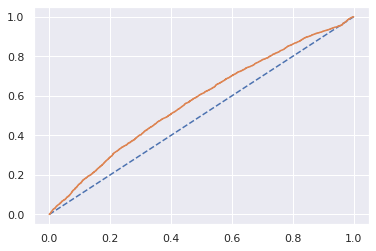

In [445]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
nbm_test_fpr, nbm_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nbm_test_fpr, nbm_test_tpr)

In [446]:
nbm_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(nbm_metrics).transpose()
nbm_test_precision=round(df.loc["1"][0],2)
nbm_test_recall=round(df.loc["1"][1],2)
nbm_test_f1=round(df.loc["1"][2],2)
nbm_test_acc=round(df.loc["accuracy"][2],2)
nbm_test_auc = roc_auc_score(y_test, probs)

In [447]:
Tuned_T_6=pd.DataFrame({'Recall':nbm_test_recall,'Precision': nbm_test_precision, 'F1-score': nbm_test_f1, 'Accuracy': round(nbm_test_acc,2), 'AUC': round(nbm_test_auc,3)}, index=['Naive Bayes'])

In [448]:
Tuned_T=pd.concat([Tuned_T,Tuned_T_6])
Tuned_T

Recall  Precision  F1-score  Accuracy    AUC
Logistic Regression    0.62       0.58      0.60      0.59  0.617
Bagging Classifier     0.62       0.58      0.60      0.59  0.617
CART                   0.71       0.74      0.73      0.73  0.797
Random Forest          0.73       0.73      0.73      0.73  0.821
LDA                    0.62       0.58      0.60      0.59  0.617
KNN                    0.93       0.65      0.77      0.72  0.816
Naive Bayes            0.90       0.51      0.65      0.52  0.574

## Cumulative gain chart

In [449]:
import scikitplot as skplt

In [450]:
predicted_probabilities = best_grid.predict_proba(A_test)

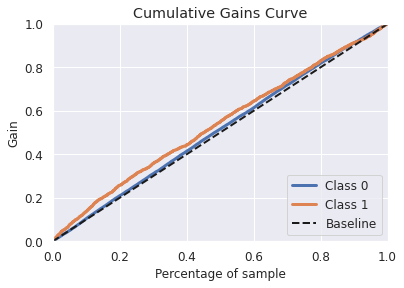

In [451]:
skplt.metrics.plot_cumulative_gain(B_test, predicted_probabilities)

## Lift chart

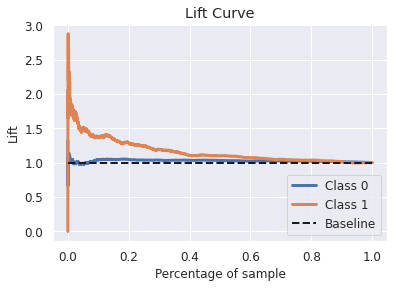

In [452]:
skplt.metrics.plot_lift_curve(B_test, predicted_probabilities)

## SVM

In [453]:
from sklearn import svm

SVM_model= svm.SVC(probability=True)
SVM_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

#### Train data

In [454]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.6249158249158249
[[7681 6377]
 [4206 9951]]
              precision    recall  f1-score   support

           0       0.65      0.55      0.59     14058
           1       0.61      0.70      0.65     14157

    accuracy                           0.62     28215
   macro avg       0.63      0.62      0.62     28215
weighted avg       0.63      0.62      0.62     28215



AUC: 0.666


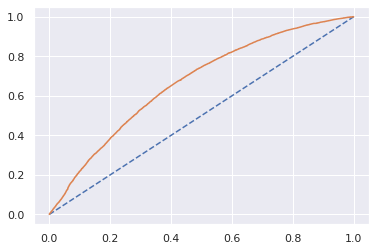

In [455]:
# predict probabilities
probs = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
svmb_train_fpr, svmb_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svmb_train_fpr, svmb_train_tpr)

In [456]:
svmb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(svmb_metrics).transpose()
svmb_train_precision=round(df.loc["1"][0],2)
svmb_train_recall=round(df.loc["1"][1],2)
svmb_train_f1=round(df.loc["1"][2],2)
svmb_train_acc=round(df.loc["accuracy"][2],2)
svmb_train_auc = roc_auc_score(y_train, probs)


In [457]:
Basic_Tr_6=pd.DataFrame({'Recall':svmb_train_recall,'Precision': svmb_train_precision, 'F1-score': svmb_train_f1, 'Accuracy': round(svmb_train_acc,2), 'AUC': round(svmb_train_auc,3)}, index=['Support Vector Machine'])

Basic_Tr=pd.concat([Basic_Tr, Basic_Tr_6])
Basic_Tr


Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression       0.61       0.59      0.60      0.59  0.622
CART                      0.68       0.75      0.71      0.72  0.800
Random Forest             1.00       1.00      1.00      1.00  1.000
LDA                       0.61       0.59      0.60      0.59  0.622
KNN                       0.96       1.00      0.98      0.98  0.993
Naive Bayes               0.69       0.57      0.62      0.58  0.622
Support Vector Machine    0.70       0.61      0.65      0.62  0.666

#### Test data

In [458]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6121723311006367
[[3205 2891]
 [1799 4198]]
              precision    recall  f1-score   support

           0       0.64      0.53      0.58      6096
           1       0.59      0.70      0.64      5997

    accuracy                           0.61     12093
   macro avg       0.62      0.61      0.61     12093
weighted avg       0.62      0.61      0.61     12093



AUC: 0.649


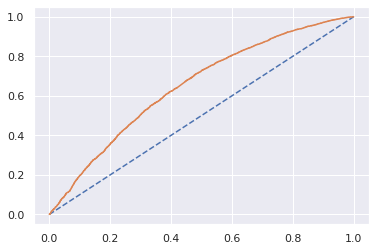

In [459]:
# predict probabilities
probs = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
svmb_test_fpr, svmb_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svmb_test_fpr, svmb_test_tpr)

In [460]:
svmb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(svmb_metrics).transpose()
svmb_test_precision=round(df.loc["1"][0],2)
svmb_test_recall=round(df.loc["1"][1],2)
svmb_test_f1=round(df.loc["1"][2],2)
svmb_test_acc=round(df.loc["accuracy"][2],2)
svmb_test_auc = roc_auc_score(y_test, probs)

In [461]:
Basic_T_6=pd.DataFrame({'Recall':svmb_test_recall,'Precision': svmb_test_precision, 'F1-score': svmb_test_f1, 'Accuracy': round(svmb_test_acc,2), 'AUC': round(svmb_test_auc,3)}, index=['Support Vector Machine'])
Basic_T=pd.concat([Basic_T, Basic_T_6])
Basic_T



Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression       0.62       0.58      0.60      0.59  0.617
CART                      0.66       0.73      0.69      0.71  0.780
Random Forest             0.72       0.95      0.82      0.84  0.904
LDA                       0.62       0.58      0.60      0.59  0.617
KNN                       0.87       0.76      0.81      0.80  0.816
Naive Bayes               0.68       0.55      0.61      0.57  0.605
Support Vector Machine    0.70       0.59      0.64      0.61  0.649

## Model Tuning for SVM

In [462]:
#Grid Search for finding out the optimal values for the hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
      'gamma': [0.1, 0.01, 0.001]
     }

sv= svm.SVC(probability= True)

grid_search = GridSearchCV(estimator = sv, param_grid = param_grid, cv = 3,scoring='recall', n_jobs = -1)

In [463]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.1, 0.01, 0.001]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='recall', verbose=0)

In [464]:
grid_search.best_params_

{'gamma': 0.1}

In [465]:
best_grid = grid_search.best_estimator_
best_grid

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

#### Train data

In [466]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.9552720184299132
[[13136   922]
 [  340 13817]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     14058
           1       0.94      0.98      0.96     14157

    accuracy                           0.96     28215
   macro avg       0.96      0.96      0.96     28215
weighted avg       0.96      0.96      0.96     28215



AUC: 0.990


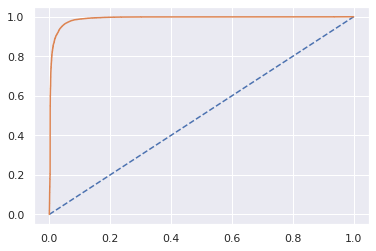

In [467]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
svmm_train_fpr, svmm_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svmm_train_fpr, svmm_train_tpr)

In [468]:
svmm_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(svmm_metrics).transpose()
svmm_train_precision=round(df.loc["1"][0],2)
svmm_train_recall=round(df.loc["1"][1],2)
svmm_train_f1=round(df.loc["1"][2],2)
svmm_train_acc=round(df.loc["accuracy"][2],2)
svmm_train_auc = roc_auc_score(y_train, probs)

In [469]:
Tuned_Tr_7=pd.DataFrame({'Recall':svmm_train_recall,'Precision': svmm_train_precision, 'F1-score': svmm_train_f1, 'Accuracy': round(svmm_train_acc,2), 'AUC': round(svmm_train_auc,3)}, index=['Support Vector Machine'])

In [470]:
Tuned_Tr=pd.concat([Tuned_Tr,Tuned_Tr_7])
Tuned_Tr

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression       0.61       0.59      0.60      0.59  0.622
Bagging Classifier        0.61       0.59      0.60      0.59  0.622
CART                      0.87       0.92      0.89      0.90  0.972
Random Forest             0.74       0.74      0.74      0.74  0.829
LDA                       0.61       0.59      0.60      0.59  0.622
KNN                       0.98       0.79      0.87      0.86  0.977
Naive Bayes               0.91       0.52      0.66      0.53  0.591
Support Vector Machine    0.98       0.94      0.96      0.96  0.990

#### Test data

In [471]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8285785164971471
[[4830 1266]
 [ 807 5190]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      6096
           1       0.80      0.87      0.83      5997

    accuracy                           0.83     12093
   macro avg       0.83      0.83      0.83     12093
weighted avg       0.83      0.83      0.83     12093



AUC: 0.899


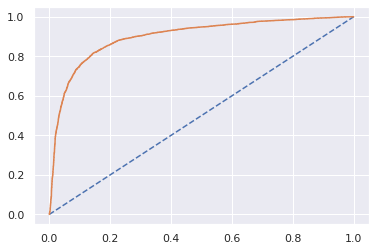

In [472]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
svmm_test_fpr, svmm_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svmm_test_fpr, svmm_test_tpr)

In [473]:
svmm_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(svmm_metrics).transpose()
svmm_test_precision=round(df.loc["1"][0],2)
svmm_test_recall=round(df.loc["1"][1],2)
svmm_test_f1=round(df.loc["1"][2],2)
svmm_test_acc=round(df.loc["accuracy"][2],2)
svmm_test_auc = roc_auc_score(y_test, probs)

In [474]:
Tuned_T_7=pd.DataFrame({'Recall':svmm_test_recall,'Precision': svmm_test_precision, 'F1-score': svmm_test_f1, 'Accuracy': round(svmm_test_acc,2), 'AUC': round(svmm_test_auc,3)}, index=['Support Vector Machine'])

In [475]:
Tuned_T=pd.concat([Tuned_T,Tuned_T_7])
Tuned_T

Recall  Precision  F1-score  Accuracy    AUC
Logistic Regression       0.62       0.58      0.60      0.59  0.617
Bagging Classifier        0.62       0.58      0.60      0.59  0.617
CART                      0.71       0.74      0.73      0.73  0.797
Random Forest             0.73       0.73      0.73      0.73  0.821
LDA                       0.62       0.58      0.60      0.59  0.617
KNN                       0.93       0.65      0.77      0.72  0.816
Naive Bayes               0.90       0.51      0.65      0.52  0.574
Support Vector Machine    0.87       0.80      0.83      0.83  0.899

## Cumulative gain chart

In [476]:
import scikitplot as skplt

In [477]:
predicted_probabilities = best_grid.predict_proba(A_test)

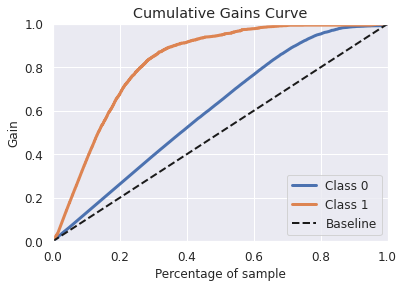

In [478]:
skplt.metrics.plot_cumulative_gain(B_test, predicted_probabilities)

## Lift chart

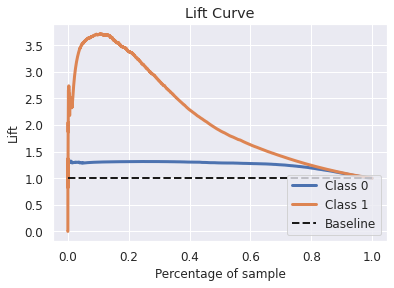

In [479]:
skplt.metrics.plot_lift_curve(B_test, predicted_probabilities)

## Boosting

## Adaboost

In [480]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier()
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [481]:
imp_feature = pd.DataFrame(ADB_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)
imp_feature=np.round(imp_feature,2)
print(imp_feature)

                   Imp
hnd_price         0.20
uniqsubs          0.12
da_Mean           0.12
models            0.12
refurb_new        0.10
car_buy           0.08
hnd_webcap        0.08
age1              0.06
actvsubs          0.04
ethnic            0.02
custcare_Mean     0.02
eqpdays           0.02
ovrmou_Mean       0.02
asl_flag          0.00
owylis_vce_Range  0.00
crclscod          0.00
income            0.00
marital           0.00
change_mou        0.00
age2              0.00
iwylis_vce_Mean   0.00
drop_vce_Range    0.00
mou_opkv_Range    0.00
area              0.00


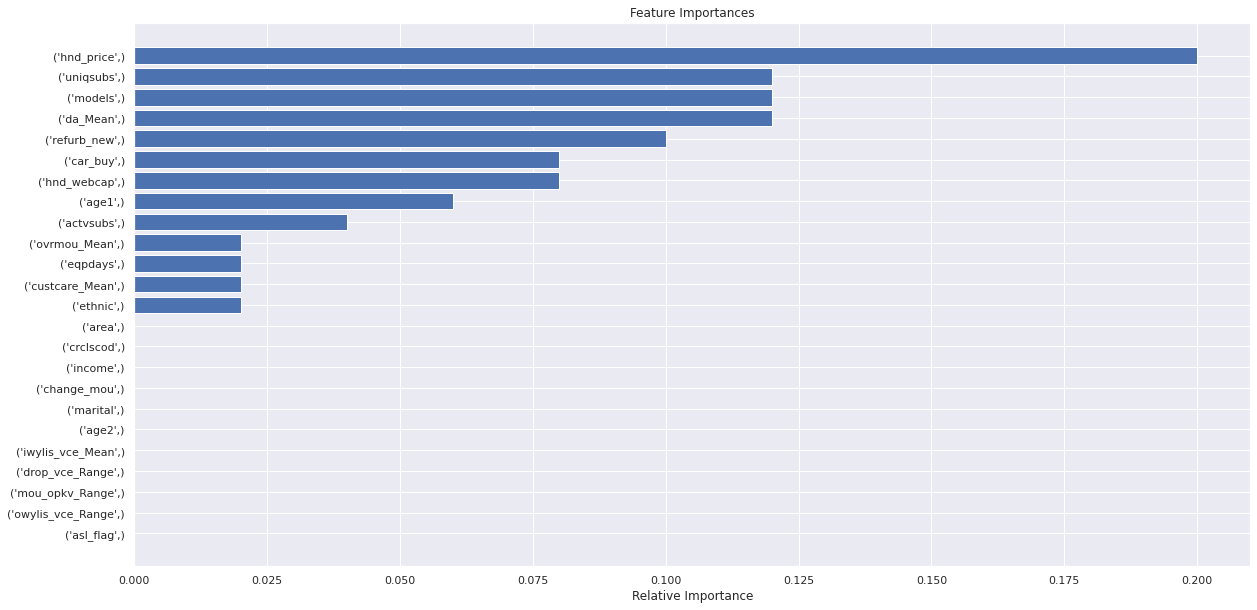

In [482]:
features=X_train.columns 
importances =ADB_model.feature_importances_
indices = np.argsort(importances)
plt.subplots(figsize = (20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Train data

In [483]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7898281056175793
[[12297  1761]
 [ 4169  9988]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.81     14058
           1       0.85      0.71      0.77     14157

    accuracy                           0.79     28215
   macro avg       0.80      0.79      0.79     28215
weighted avg       0.80      0.79      0.79     28215



AUC: 0.855


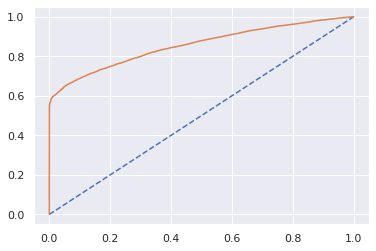

In [484]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
adab_train_fpr, adab_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adab_train_fpr, adab_train_tpr)

In [485]:
adab_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(adab_metrics).transpose()
adab_train_precision=round(df.loc["1"][0],2)
adab_train_recall=round(df.loc["1"][1],2)
adab_train_f1=round(df.loc["1"][2],2)
adab_train_acc=round(df.loc["accuracy"][2],2)
adab_train_auc = roc_auc_score(y_train, probs)

In [486]:
Basic_Tr_7=pd.DataFrame({'Recall':adab_train_recall,'Precision': adab_train_precision, 'F1-score': adab_train_f1, 'Accuracy': round(adab_train_acc,2), 'AUC': round(adab_train_auc,3)}, index=['Ada Boost'])

In [487]:
Basic_Tr=pd.concat([Basic_Tr,Basic_Tr_7])
Basic_Tr

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression       0.61       0.59      0.60      0.59  0.622
CART                      0.68       0.75      0.71      0.72  0.800
Random Forest             1.00       1.00      1.00      1.00  1.000
LDA                       0.61       0.59      0.60      0.59  0.622
KNN                       0.96       1.00      0.98      0.98  0.993
Naive Bayes               0.69       0.57      0.62      0.58  0.622
Support Vector Machine    0.70       0.61      0.65      0.62  0.666
Ada Boost                 0.71       0.85      0.77      0.79  0.855

#### Test data

In [488]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7834284296700571
[[5319  777]
 [1842 4155]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      6096
           1       0.84      0.69      0.76      5997

    accuracy                           0.78     12093
   macro avg       0.79      0.78      0.78     12093
weighted avg       0.79      0.78      0.78     12093



AUC: 0.848


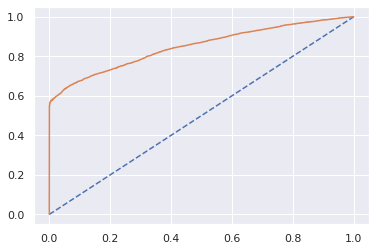

In [489]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
adab_test_fpr, adab_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adab_test_fpr, adab_test_tpr)

In [490]:
adab_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(adab_metrics).transpose()
adab_test_precision=round(df.loc["1"][0],2)
adab_test_recall=round(df.loc["1"][1],2)
adab_test_f1=round(df.loc["1"][2],2)
adab_test_acc=round(df.loc["accuracy"][2],2)
adab_test_auc = roc_auc_score(y_test, probs)

In [491]:
Basic_T_7=pd.DataFrame({'Recall':adab_test_recall,'Precision': adab_test_precision, 'F1-score': adab_test_f1, 'Accuracy': round(adab_test_acc,2), 'AUC': round(adab_test_auc,3)}, index=['Ada Boost'])

In [492]:
Basic_T=pd.concat([Basic_T,Basic_T_7])
Basic_T

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression       0.62       0.58      0.60      0.59  0.617
CART                      0.66       0.73      0.69      0.71  0.780
Random Forest             0.72       0.95      0.82      0.84  0.904
LDA                       0.62       0.58      0.60      0.59  0.617
KNN                       0.87       0.76      0.81      0.80  0.816
Naive Bayes               0.68       0.55      0.61      0.57  0.605
Support Vector Machine    0.70       0.59      0.64      0.61  0.649
Ada Boost                 0.69       0.84      0.76      0.78  0.848

## Model Tuning Adaboost

In [493]:
#Grid Search for finding out the optimal values for the hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,150,500],
    'learning_rate': [0.01,0.1,1.0],
    'algorithm': ['SAMME.R','SAMME'],
    'random_state': [0,5,10]
 }

ada= AdaBoostClassifier()

grid_search = GridSearchCV(estimator = ada, param_grid = param_grid, scoring='recall',cv = 3, n_jobs = -1)

In [494]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [100, 150, 500],
                         'random_state': [0, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [495]:
grid_search.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 0.01,
 'n_estimators': 150,
 'random_state': 0}

In [496]:
best_grid = grid_search.best_estimator_
best_grid

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.01,
                   n_estimators=150, random_state=0)

In [497]:
imp_feature = pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)
imp_feature=np.round(imp_feature,2)
print(imp_feature)

                   Imp
eqpdays           0.34
hnd_price         0.27
uniqsubs          0.16
models            0.11
ovrmou_Mean       0.08
age1              0.03
car_buy           0.01
refurb_new        0.00
actvsubs          0.00
age2              0.00
ethnic            0.00
marital           0.00
hnd_webcap        0.00
custcare_Mean     0.00
owylis_vce_Range  0.00
asl_flag          0.00
crclscod          0.00
income            0.00
change_mou        0.00
da_Mean           0.00
iwylis_vce_Mean   0.00
drop_vce_Range    0.00
mou_opkv_Range    0.00
area              0.00


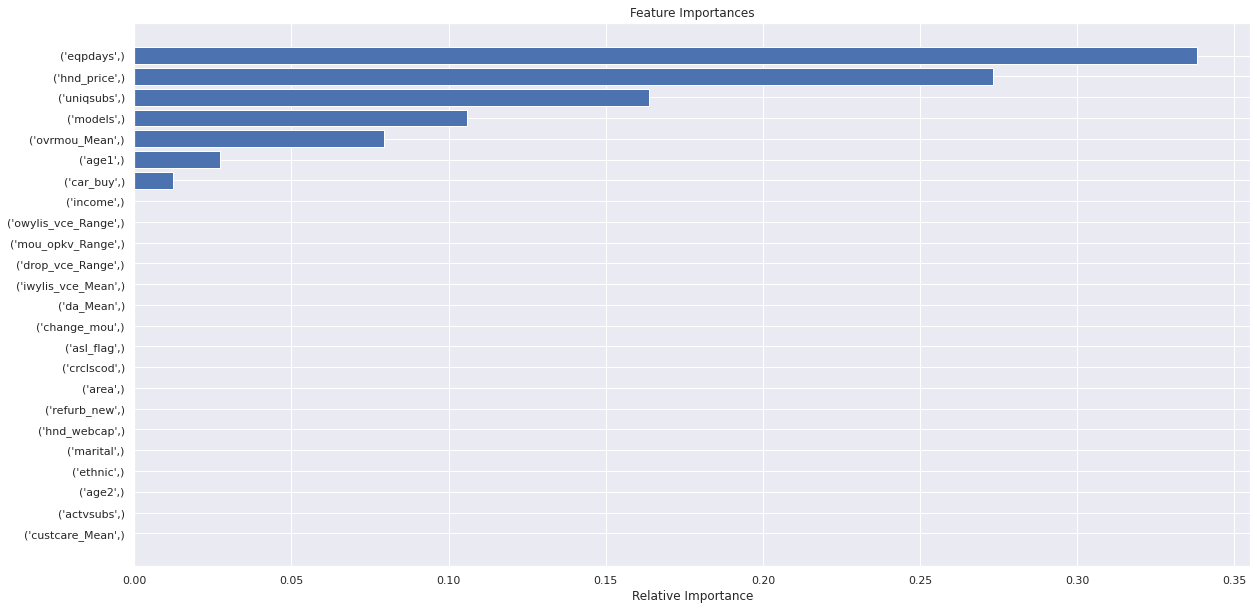

In [498]:
features=X_train.columns 
importances =best_grid.feature_importances_
indices = np.argsort(importances)
plt.subplots(figsize = (20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Train data

In [499]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.6190324295587454
[[ 6457  7601]
 [ 3148 11009]]
              precision    recall  f1-score   support

           0       0.67      0.46      0.55     14058
           1       0.59      0.78      0.67     14157

    accuracy                           0.62     28215
   macro avg       0.63      0.62      0.61     28215
weighted avg       0.63      0.62      0.61     28215



AUC: 0.679


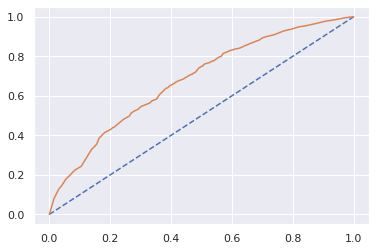

In [500]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
adam_train_fpr, adam_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adam_train_fpr, adam_train_tpr)

In [501]:
adam_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(adam_metrics).transpose()
adam_train_precision=round(df.loc["1"][0],2)
adam_train_recall=round(df.loc["1"][1],2)
adam_train_f1=round(df.loc["1"][2],2)
adam_train_acc=round(df.loc["accuracy"][2],2)
adam_train_auc = roc_auc_score(y_train, probs)


In [502]:
Tuned_Tr_8=pd.DataFrame({'Recall':adam_train_recall,'Precision': adam_train_precision, 'F1-score': adam_train_f1, 'Accuracy': round(adam_train_acc,2), 'AUC': round(adam_train_auc,3)}, index=['AdaBoost'])

In [503]:
Tuned_Tr=pd.concat([Tuned_Tr,Tuned_Tr_8])
Tuned_Tr


Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression       0.61       0.59      0.60      0.59  0.622
Bagging Classifier        0.61       0.59      0.60      0.59  0.622
CART                      0.87       0.92      0.89      0.90  0.972
Random Forest             0.74       0.74      0.74      0.74  0.829
LDA                       0.61       0.59      0.60      0.59  0.622
KNN                       0.98       0.79      0.87      0.86  0.977
Naive Bayes               0.91       0.52      0.66      0.53  0.591
Support Vector Machine    0.98       0.94      0.96      0.96  0.990
AdaBoost                  0.78       0.59      0.67      0.62  0.679

#### Test data

In [504]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6121723311006367
[[2731 3365]
 [1325 4672]]
              precision    recall  f1-score   support

           0       0.67      0.45      0.54      6096
           1       0.58      0.78      0.67      5997

    accuracy                           0.61     12093
   macro avg       0.63      0.61      0.60     12093
weighted avg       0.63      0.61      0.60     12093



AUC: 0.674


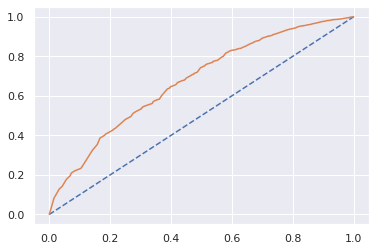

In [505]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
adam_test_fpr, adam_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adam_test_fpr, adam_test_tpr)

In [506]:
adam_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(adam_metrics).transpose()
adam_test_precision=round(df.loc["1"][0],2)
adam_test_recall=round(df.loc["1"][1],2)
adam_test_f1=round(df.loc["1"][2],2)
adam_test_acc=round(df.loc["accuracy"][2],2)
adam_test_auc = roc_auc_score(y_test, probs)

In [507]:
Tuned_T_8=pd.DataFrame({'Recall':adam_test_recall,'Precision': adam_test_precision, 'F1-score': adam_test_f1, 'Accuracy': round(adam_test_acc,2), 'AUC': round(adam_test_auc,3)}, index=['Ada Boost'])

In [508]:
Tuned_T=pd.concat([Tuned_T,Tuned_T_8])
Tuned_T


Recall  Precision  F1-score  Accuracy    AUC
Logistic Regression       0.62       0.58      0.60      0.59  0.617
Bagging Classifier        0.62       0.58      0.60      0.59  0.617
CART                      0.71       0.74      0.73      0.73  0.797
Random Forest             0.73       0.73      0.73      0.73  0.821
LDA                       0.62       0.58      0.60      0.59  0.617
KNN                       0.93       0.65      0.77      0.72  0.816
Naive Bayes               0.90       0.51      0.65      0.52  0.574
Support Vector Machine    0.87       0.80      0.83      0.83  0.899
Ada Boost                 0.78       0.58      0.67      0.61  0.674

## Cumulative gain chart

In [509]:
import scikitplot as skplt

In [510]:
predicted_probabilities = best_grid.predict_proba(A_test)

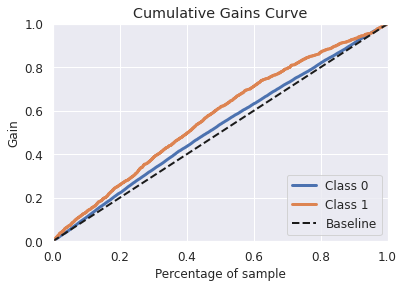

In [511]:
skplt.metrics.plot_cumulative_gain(B_test, predicted_probabilities)

## Lift chart

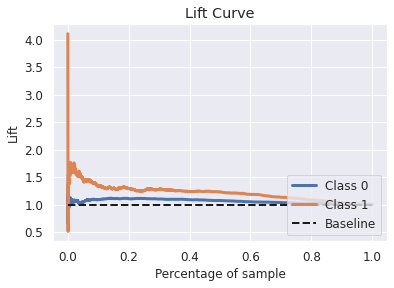

In [512]:
skplt.metrics.plot_lift_curve(B_test, predicted_probabilities)

## XG Boosting

In [513]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier()
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [514]:
imp_feature = pd.DataFrame(XGB_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)
imp_feature=np.round(imp_feature,2)
print(imp_feature)

                   Imp
models            0.14
car_buy           0.12
uniqsubs          0.11
hnd_price         0.08
age1              0.07
refurb_new        0.07
asl_flag          0.06
hnd_webcap        0.05
da_Mean           0.04
eqpdays           0.04
ethnic            0.03
age2              0.03
custcare_Mean     0.03
ovrmou_Mean       0.02
actvsubs          0.02
income            0.02
drop_vce_Range    0.02
marital           0.01
iwylis_vce_Mean   0.01
crclscod          0.01
change_mou        0.00
area              0.00
mou_opkv_Range    0.00
owylis_vce_Range  0.00


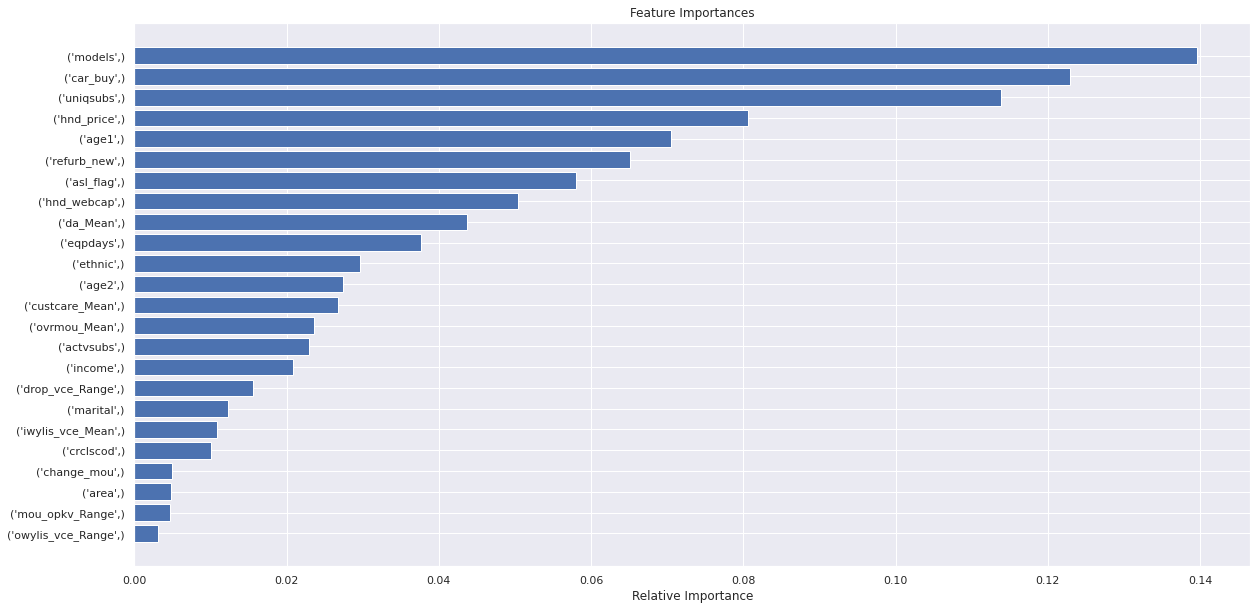

In [515]:
features=X_train.columns 
importances =XGB_model.feature_importances_
indices = np.argsort(importances)
plt.subplots(figsize = (20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Train data

In [516]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8333864965443912
[[13851   207]
 [ 4494  9663]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.85     14058
           1       0.98      0.68      0.80     14157

    accuracy                           0.83     28215
   macro avg       0.87      0.83      0.83     28215
weighted avg       0.87      0.83      0.83     28215



AUC: 0.889


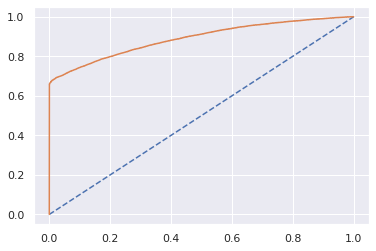

In [517]:
# predict probabilities
probs = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
xgbb_train_fpr, xgbb_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgbb_train_fpr, xgbb_train_tpr)

In [518]:
xgbb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(xgbb_metrics).transpose()
xgbb_train_precision=round(df.loc["1"][0],2)
xgbb_train_recall=round(df.loc["1"][1],2)
xgbb_train_f1=round(df.loc["1"][2],2)
xgbb_train_acc=round(df.loc["accuracy"][2],2)
xgbb_train_auc = roc_auc_score(y_train, probs)


In [519]:
Basic_Tr_8=pd.DataFrame({'Recall':xgbb_train_recall,'Precision': xgbb_train_precision, 'F1-score': xgbb_train_f1, 'Accuracy': round(xgbb_train_acc,2), 'AUC': round(xgbb_train_auc,3)}, index=['XG Boost'])


In [520]:
Basic_Tr=pd.concat([Basic_Tr,Basic_Tr_8])
Basic_Tr

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression       0.61       0.59      0.60      0.59  0.622
CART                      0.68       0.75      0.71      0.72  0.800
Random Forest             1.00       1.00      1.00      1.00  1.000
LDA                       0.61       0.59      0.60      0.59  0.622
KNN                       0.96       1.00      0.98      0.98  0.993
Naive Bayes               0.69       0.57      0.62      0.58  0.622
Support Vector Machine    0.70       0.61      0.65      0.62  0.666
Ada Boost                 0.71       0.85      0.77      0.79  0.855
XG Boost                  0.68       0.98      0.80      0.83  0.889

#### Test data

In [521]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8253535102952121
[[5983  113]
 [1999 3998]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      6096
           1       0.97      0.67      0.79      5997

    accuracy                           0.83     12093
   macro avg       0.86      0.82      0.82     12093
weighted avg       0.86      0.83      0.82     12093



AUC: 0.877


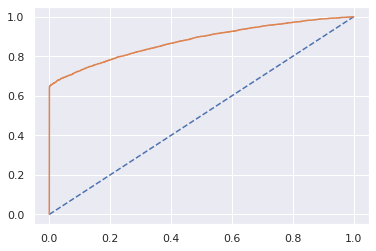

In [522]:
# predict probabilities
probs = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
xgbb_test_fpr, xgbb_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgbb_test_fpr, xgbb_test_tpr)

In [523]:
xgbb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(xgbb_metrics).transpose()
xgbb_test_precision=round(df.loc["1"][0],2)
xgbb_test_recall=round(df.loc["1"][1],2)
xgbb_test_f1=round(df.loc["1"][2],2)
xgbb_test_acc=round(df.loc["accuracy"][2],2)
xgbb_test_auc = roc_auc_score(y_test, probs)


In [524]:
Basic_T_8=pd.DataFrame({'Recall':xgbb_test_recall,'Precision': xgbb_test_precision, 'F1-score': xgbb_test_f1, 'Accuracy': round(xgbb_test_acc,2), 'AUC': round(xgbb_test_auc,3)}, index=['XG Boost'])


In [525]:
Basic_T=pd.concat([Basic_T,Basic_T_8])
Basic_T

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression       0.62       0.58      0.60      0.59  0.617
CART                      0.66       0.73      0.69      0.71  0.780
Random Forest             0.72       0.95      0.82      0.84  0.904
LDA                       0.62       0.58      0.60      0.59  0.617
KNN                       0.87       0.76      0.81      0.80  0.816
Naive Bayes               0.68       0.55      0.61      0.57  0.605
Support Vector Machine    0.70       0.59      0.64      0.61  0.649
Ada Boost                 0.69       0.84      0.76      0.78  0.848
XG Boost                  0.67       0.97      0.79      0.83  0.877

## Model Tuning XGBoost

In [526]:
#Grid Search for finding out the optimal values for the hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [300,400,500],
    'max_depth': [3,4,5],
'learning_rate': [0.01,0.1,1.0]
     }

xgb1= xgb.XGBClassifier()

grid_search = GridSearchCV(estimator = xgb1, param_grid = param_grid, cv = 3, scoring='recall',n_jobs = -1)

In [527]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [300, 400, 500]},
           

In [528]:
grid_search.best_params_

{'learning_rate': 1.0, 'max_depth': 4, 'n_estimators': 300}

In [529]:
best_grid = grid_search.best_estimator_
best_grid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [530]:
imp_feature = pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)
imp_feature=np.round(imp_feature,2)
print(imp_feature)

                   Imp
car_buy           0.15
refurb_new        0.14
uniqsubs          0.12
age1              0.09
models            0.08
hnd_price         0.07
hnd_webcap        0.06
da_Mean           0.05
asl_flag          0.03
age2              0.02
eqpdays           0.02
ovrmou_Mean       0.02
income            0.02
drop_vce_Range    0.01
actvsubs          0.01
iwylis_vce_Mean   0.01
ethnic            0.01
custcare_Mean     0.01
area              0.01
change_mou        0.01
marital           0.01
mou_opkv_Range    0.01
crclscod          0.01
owylis_vce_Range  0.01


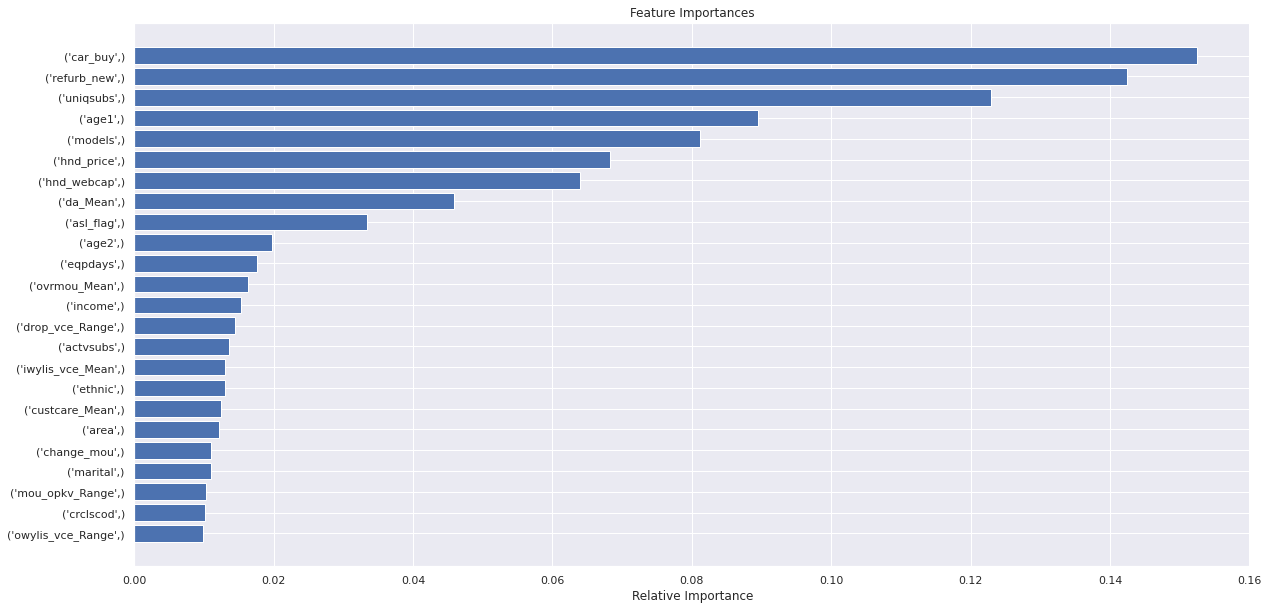

In [531]:
features=X_train.columns 
importances =best_grid.feature_importances_
indices = np.argsort(importances)
plt.subplots(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Train data

In [532]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9674286726918306
[[13898   160]
 [  759 13398]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14058
           1       0.99      0.95      0.97     14157

    accuracy                           0.97     28215
   macro avg       0.97      0.97      0.97     28215
weighted avg       0.97      0.97      0.97     28215



AUC: 0.996


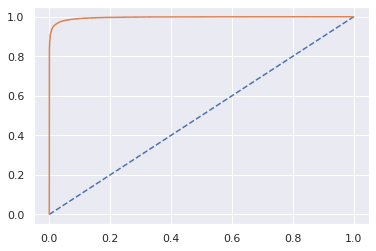

In [533]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
xgbm_train_fpr, xgbm_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgbm_train_fpr, xgbm_train_tpr)

In [534]:
xgbm_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(xgbm_metrics).transpose()
xgbm_train_precision=round(df.loc["1"][0],2)
xgbm_train_recall=round(df.loc["1"][1],2)
xgbm_train_f1=round(df.loc["1"][2],2)
xgbm_train_acc=round(df.loc["accuracy"][2],2)
xgbm_train_auc = roc_auc_score(y_train, probs)

In [535]:
Tuned_Tr_9=pd.DataFrame({'Recall':xgbm_train_recall,'Precision': xgbm_train_precision, 'F1-score': xgbm_train_f1, 'Accuracy': round(xgbm_train_acc,2), 'AUC': round(xgbm_train_auc,3)}, index=['XG Boost'])

In [536]:
Tuned_Tr=pd.concat([Tuned_Tr,Tuned_Tr_9])
Tuned_Tr

Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression       0.61       0.59      0.60      0.59  0.622
Bagging Classifier        0.61       0.59      0.60      0.59  0.622
CART                      0.87       0.92      0.89      0.90  0.972
Random Forest             0.74       0.74      0.74      0.74  0.829
LDA                       0.61       0.59      0.60      0.59  0.622
KNN                       0.98       0.79      0.87      0.86  0.977
Naive Bayes               0.91       0.52      0.66      0.53  0.591
Support Vector Machine    0.98       0.94      0.96      0.96  0.990
AdaBoost                  0.78       0.59      0.67      0.62  0.679
XG Boost                  0.95       0.99      0.97      0.97  0.996

#### Test data

In [537]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7925246010088481
[[5098  998]
 [1511 4486]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      6096
           1       0.82      0.75      0.78      5997

    accuracy                           0.79     12093
   macro avg       0.79      0.79      0.79     12093
weighted avg       0.79      0.79      0.79     12093



AUC: 0.861


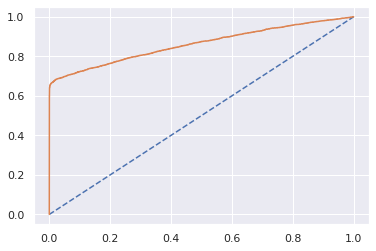

In [538]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
xgbm_test_fpr, xgbm_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgbm_test_fpr, xgbm_test_tpr)

In [539]:
xgbm_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(xgbm_metrics).transpose()
xgbm_test_precision=round(df.loc["1"][0],2)
xgbm_test_recall=round(df.loc["1"][1],2)
xgbm_test_f1=round(df.loc["1"][2],2)
xgbm_test_acc=round(df.loc["accuracy"][2],2)
xgbm_test_auc = roc_auc_score(y_test, probs)

In [540]:
Tuned_T_9=pd.DataFrame({'Recall':xgbm_test_recall,'Precision': xgbm_test_precision, 'F1-score': xgbm_test_f1, 'Accuracy': round(xgbm_test_acc,2), 'AUC': round(xgbm_test_auc,3)}, index=['XG Boost'])

In [541]:
Tuned_T=pd.concat([Tuned_T,Tuned_T_9])
Tuned_T


Recall  Precision  F1-score  Accuracy    AUC
Logistic Regression       0.62       0.58      0.60      0.59  0.617
Bagging Classifier        0.62       0.58      0.60      0.59  0.617
CART                      0.71       0.74      0.73      0.73  0.797
Random Forest             0.73       0.73      0.73      0.73  0.821
LDA                       0.62       0.58      0.60      0.59  0.617
KNN                       0.93       0.65      0.77      0.72  0.816
Naive Bayes               0.90       0.51      0.65      0.52  0.574
Support Vector Machine    0.87       0.80      0.83      0.83  0.899
Ada Boost                 0.78       0.58      0.67      0.61  0.674
XG Boost                  0.75       0.82      0.78      0.79  0.861

## Cumulative gain chart

In [542]:
import scikitplot as skplt

In [543]:
predicted_probabilities = best_grid.predict_proba(X_test)

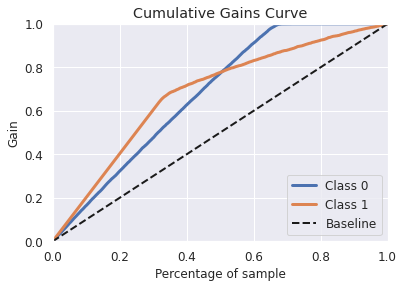

In [544]:
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

## Lift chart

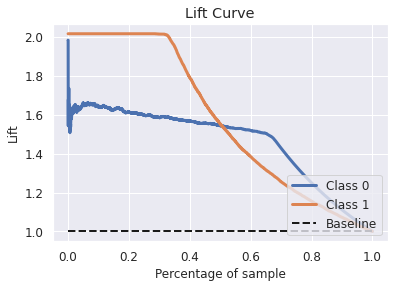

In [545]:
skplt.metrics.plot_lift_curve(y_test, predicted_probabilities)

## AUC Curve of all basic models

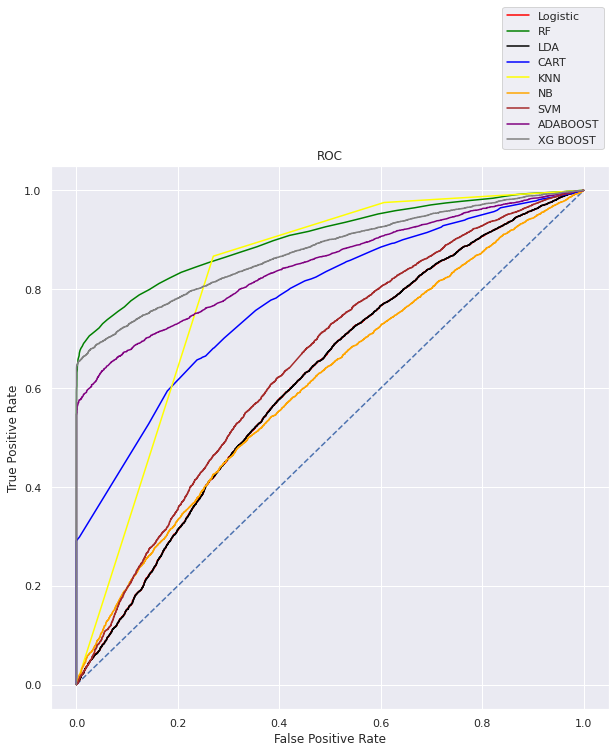

In [546]:
plt.subplots(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lgb_test_fpr, lgb_test_tpr,color='red',label="Logistic")
plt.plot(rfb_test_fpr,rfb_test_tpr,color='green',label="RF")
plt.plot(ldab_test_fpr,ldab_test_tpr,color='black',label="LDA")
plt.plot(dtb_test_fpr,dtb_test_tpr,color='blue',label="CART")
plt.plot(knnb_test_fpr,knnb_test_tpr,color='yellow',label="KNN")
plt.plot(nbb_test_fpr,nbb_test_tpr,color='orange',label="NB")
plt.plot(svmb_test_fpr,svmb_test_tpr,color='brown',label="SVM")
plt.plot(adab_test_fpr,adab_test_tpr,color='purple',label="ADABOOST")
plt.plot(xgbb_test_fpr,xgbb_test_tpr,color='grey',label="XG BOOST")
# plt.plot(svmb_test_fpr,nn_test_tpr,color='black',label="NN")
# plt.plot(svmb_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

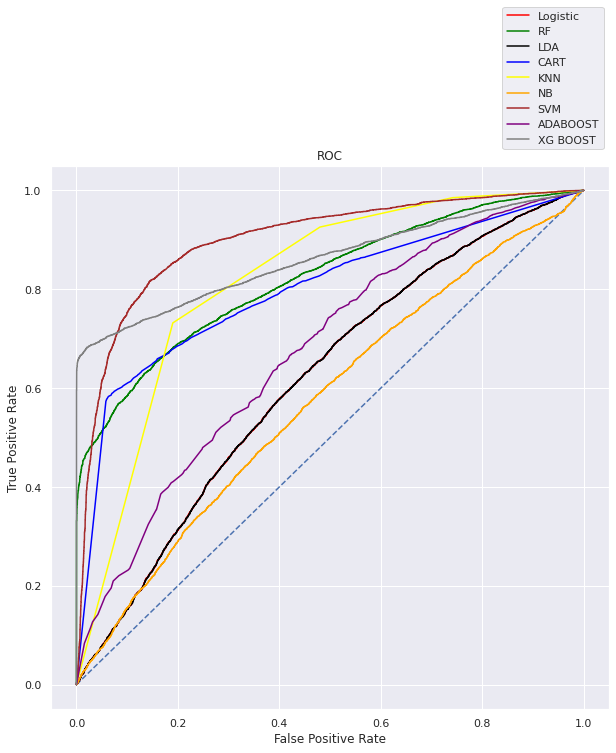

In [547]:
plt.subplots(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr,color='red',label="Logistic")
plt.plot(rfm_test_fpr,rfm_test_tpr,color='green',label="RF")
plt.plot(ldam_test_fpr,ldam_test_tpr,color='black',label="LDA")
plt.plot(dtm_test_fpr,dtm_test_tpr,color='blue',label="CART")
plt.plot(knnm_test_fpr,knnm_test_tpr,color='yellow',label="KNN")
plt.plot(nbm_test_fpr,nbm_test_tpr,color='orange',label="NB")
plt.plot(svmm_test_fpr,svmm_test_tpr,color='brown',label="SVM")
plt.plot(adam_test_fpr,adam_test_tpr,color='purple',label="ADABOOST")
plt.plot(xgbm_test_fpr,xgbm_test_tpr,color='grey',label="XG BOOST")
# plt.plot(svmb_test_fpr,nn_test_tpr,color='black',label="NN")
# plt.plot(svmb_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [548]:
print('The performance of train data in basic models \n',Basic_Tr)

The performance of train data in basic models 
                         Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression       0.61       0.59      0.60      0.59  0.622
CART                      0.68       0.75      0.71      0.72  0.800
Random Forest             1.00       1.00      1.00      1.00  1.000
LDA                       0.61       0.59      0.60      0.59  0.622
KNN                       0.96       1.00      0.98      0.98  0.993
Naive Bayes               0.69       0.57      0.62      0.58  0.622
Support Vector Machine    0.70       0.61      0.65      0.62  0.666
Ada Boost                 0.71       0.85      0.77      0.79  0.855
XG Boost                  0.68       0.98      0.80      0.83  0.889


In [549]:
print('The performance of test data in basic models \n', Basic_T)

The performance of test data in basic models 
                         Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression       0.62       0.58      0.60      0.59  0.617
CART                      0.66       0.73      0.69      0.71  0.780
Random Forest             0.72       0.95      0.82      0.84  0.904
LDA                       0.62       0.58      0.60      0.59  0.617
KNN                       0.87       0.76      0.81      0.80  0.816
Naive Bayes               0.68       0.55      0.61      0.57  0.605
Support Vector Machine    0.70       0.59      0.64      0.61  0.649
Ada Boost                 0.69       0.84      0.76      0.78  0.848
XG Boost                  0.67       0.97      0.79      0.83  0.877


In [550]:
print('The performance of train data in tuned models \n',Tuned_Tr)

The performance of train data in tuned models 
                         Recall  Precision  F1-score  Accuracy    AUC
Logistic_Regression       0.61       0.59      0.60      0.59  0.622
Bagging Classifier        0.61       0.59      0.60      0.59  0.622
CART                      0.87       0.92      0.89      0.90  0.972
Random Forest             0.74       0.74      0.74      0.74  0.829
LDA                       0.61       0.59      0.60      0.59  0.622
KNN                       0.98       0.79      0.87      0.86  0.977
Naive Bayes               0.91       0.52      0.66      0.53  0.591
Support Vector Machine    0.98       0.94      0.96      0.96  0.990
AdaBoost                  0.78       0.59      0.67      0.62  0.679
XG Boost                  0.95       0.99      0.97      0.97  0.996


In [551]:
print('The performance of test data in tuned models \n',Tuned_T)

The performance of test data in tuned models 
                         Recall  Precision  F1-score  Accuracy    AUC
Logistic Regression       0.62       0.58      0.60      0.59  0.617
Bagging Classifier        0.62       0.58      0.60      0.59  0.617
CART                      0.71       0.74      0.73      0.73  0.797
Random Forest             0.73       0.73      0.73      0.73  0.821
LDA                       0.62       0.58      0.60      0.59  0.617
KNN                       0.93       0.65      0.77      0.72  0.816
Naive Bayes               0.90       0.51      0.65      0.52  0.574
Support Vector Machine    0.87       0.80      0.83      0.83  0.899
Ada Boost                 0.78       0.58      0.67      0.61  0.674
XG Boost                  0.75       0.82      0.78      0.79  0.861
